In [41]:
# Import Neccessary Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Fetch 10 years of Google stock data
googl_data = yf.download('GOOGL', start='2013-01-01', end='2023-01-01')

# Check if data was fetched successfully and display head
print(googl_data.head())

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  18.003504  18.193193  17.931683  18.099348  18.078600  101550348
2013-01-03  18.141392  18.316566  18.036036  18.109859  18.089098   92635272
2013-01-04  18.251753  18.555305  18.210211  18.467718  18.446547  110429460
2013-01-07  18.404655  18.503002  18.282784  18.387136  18.366058   66161772
2013-01-08  18.406906  18.425926  18.128880  18.350851  18.329815   66976956


# Exploratory Data Analysis

In [ ]:
# Display basic information about the dataset

In [43]:
print("1. Basic Information about the Dataset:")
print(googl_data.info())

1. Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB
None


In [ ]:
# Display summary statistics of the dataset

In [18]:
print("2. Summary Statistics of the Dataset:")
print(googl_data.describe())

# Additional statistics for specific columns
print("\nMedian values:")
print(googl_data.median())

print("\nSkewness:")
print(googl_data.skew())

print("\nKurtosis:")
print(googl_data.kurtosis())

2. Summary Statistics of the Dataset:
              Open         High          Low        Close    Adj Close        Volume
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000  2.518000e+03
mean     59.516451    60.113777    58.898768    59.518231    59.450001  4.283455e+07
std      34.644031    35.048906    34.218578    34.632726    34.593024  2.700095e+07
min      17.634134    17.651152    17.405405    17.589338    17.569174  9.312000e+06
25%      30.337650    30.451993    30.108921    30.325451    30.290687  2.680850e+07
50%      52.000750    52.578249    51.328749    51.987249    51.927652  3.439400e+07
75%      73.731127    74.419876    72.961000    73.955248    73.870470  4.895400e+07
max     151.250000   151.546494   148.899002   149.838501   149.666733  4.621933e+08

Median values:
Open         5.200075e+01
High         5.257825e+01
Low          5.132875e+01
Close        5.198725e+01
Adj Close    5.192765e+01
Volume       3.439400e+07
dtype: float64

Skewness:

In [ ]:
# Plot the closing price over time

3. Closing Price Over Time:


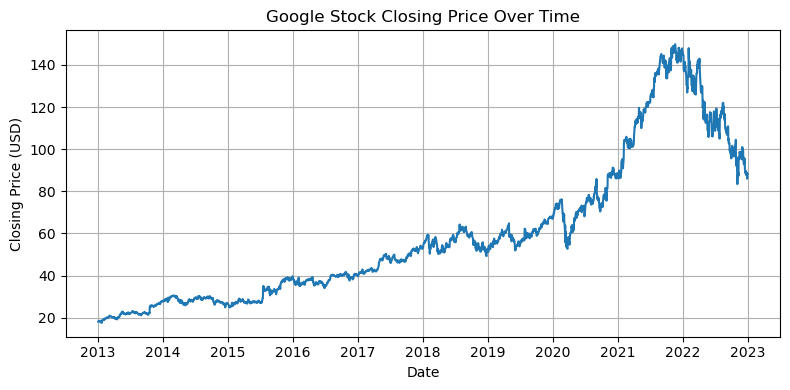

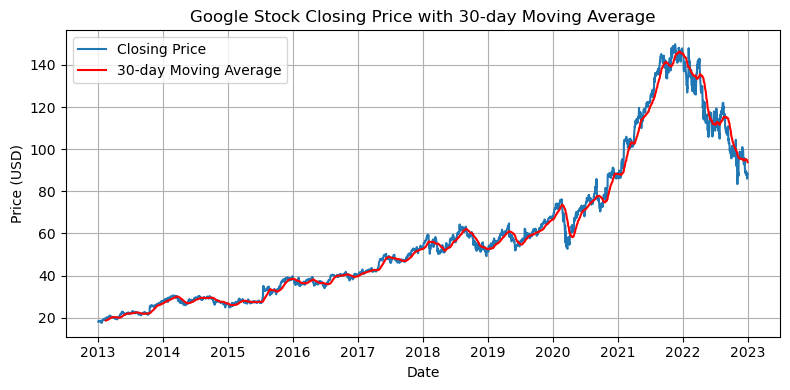

In [21]:
print("3. Closing Price Over Time:")

plt.figure(figsize=(8, 4))
plt.plot(googl_data.index, googl_data['Close'])
plt.title('Google Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and plot the 30-day moving average
googl_data['MA30'] = googl_data['Close'].rolling(window=30).mean()

plt.figure(figsize=(8, 4))
plt.plot(googl_data.index, googl_data['Close'], label='Closing Price')
plt.plot(googl_data.index, googl_data['MA30'], label='30-day Moving Average', color='red')
plt.title('Google Stock Closing Price with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate and visualize daily returns

4. Daily Returns Analysis:


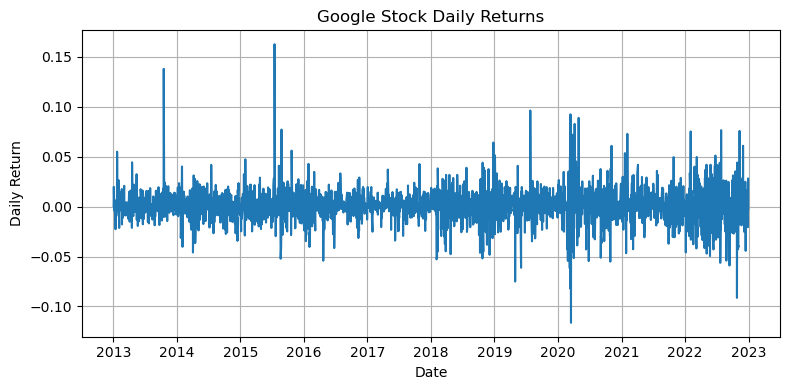

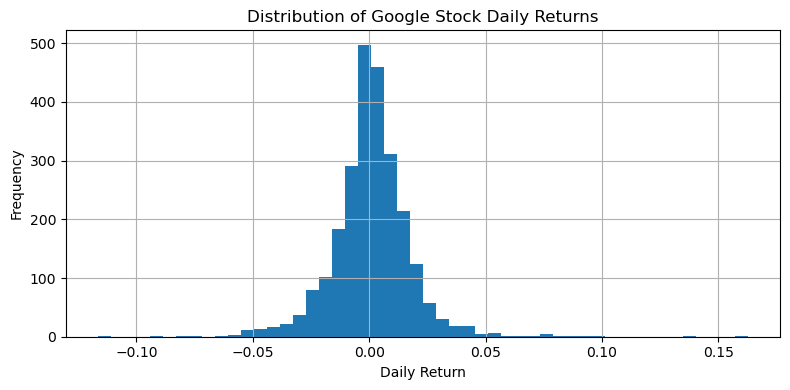


Summary Statistics of Daily Returns:
count    2517.000000
mean        0.000774
std         0.017055
min        -0.116341
25%        -0.006928
50%         0.000784
75%         0.008994
max         0.162584
Name: Daily Return, dtype: float64

Skewness of Daily Returns: 0.4982065592079818
Kurtosis of Daily Returns: 8.727739824148692


In [45]:
print("4. Daily Returns Analysis:")

# Calculate daily returns
googl_data['Daily Return'] = googl_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(8, 4))
plt.plot(googl_data.index, googl_data['Daily Return'])
plt.title('Google Stock Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot histogram of daily returns
plt.figure(figsize=(8, 4))
googl_data['Daily Return'].hist(bins=50)
plt.title('Distribution of Google Stock Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics of daily returns
print("\nSummary Statistics of Daily Returns:")
print(googl_data['Daily Return'].describe())

print("\nSkewness of Daily Returns:", googl_data['Daily Return'].skew())
print("Kurtosis of Daily Returns:", googl_data['Daily Return'].kurtosis())

4. Daily Returns Analysis:


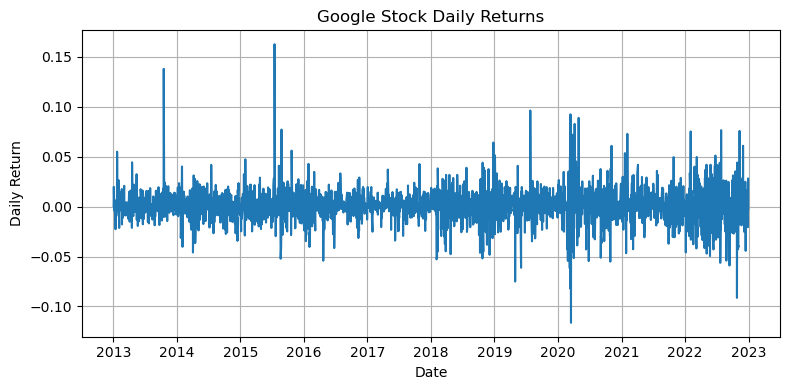

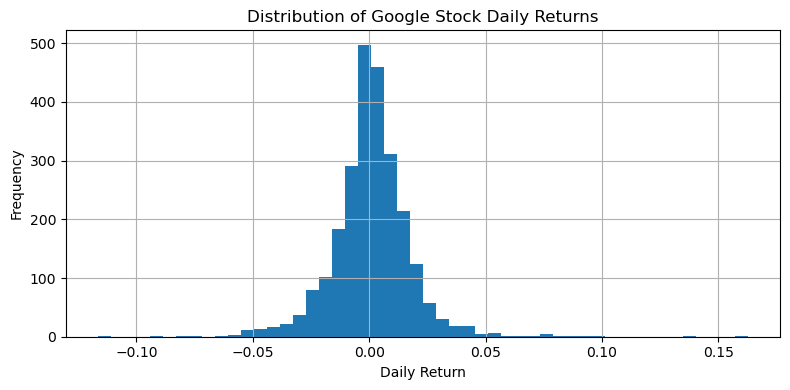


Summary Statistics of Daily Returns:
count    2517.000000
mean        0.000774
std         0.017055
min        -0.116341
25%        -0.006928
50%         0.000784
75%         0.008994
max         0.162584
Name: Daily Return, dtype: float64

Skewness of Daily Returns: 0.4982065592079818
Kurtosis of Daily Returns: 8.727739824148692


In [22]:
print("4. Daily Returns Analysis:")

# Calculate daily returns
googl_data['Daily Return'] = googl_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(8, 4))
plt.plot(googl_data.index, googl_data['Daily Return'])
plt.title('Google Stock Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot histogram of daily returns
plt.figure(figsize=(8, 4))
googl_data['Daily Return'].hist(bins=50)
plt.title('Distribution of Google Stock Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics of daily returns
print("\nSummary Statistics of Daily Returns:")
print(googl_data['Daily Return'].describe())

print("\nSkewness of Daily Returns:", googl_data['Daily Return'].skew())
print("Kurtosis of Daily Returns:", googl_data['Daily Return'].kurtosis())

In [ ]:
# Analyze and visualize trading volume

5. Trading Volume Analysis:


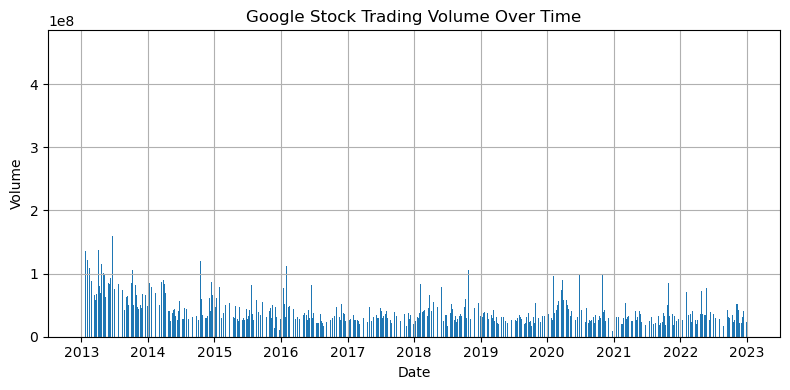

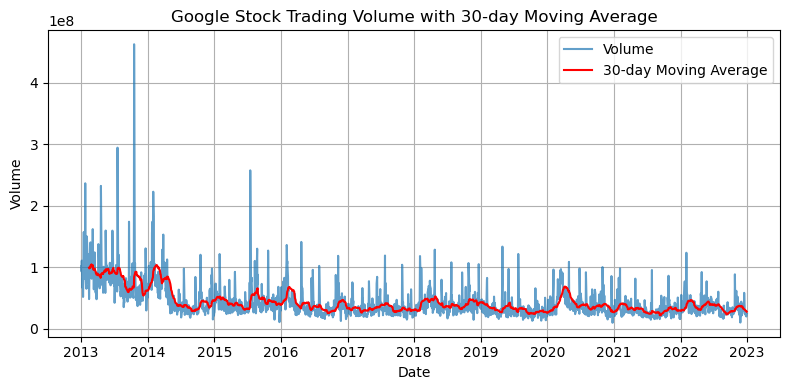


Summary Statistics of Trading Volume:
count    2.518000e+03
mean     4.283455e+07
std      2.700095e+07
min      9.312000e+06
25%      2.680850e+07
50%      3.439400e+07
75%      4.895400e+07
max      4.621933e+08
Name: Volume, dtype: float64

Correlation between Volume and Closing Price: -0.3315


In [23]:
print("5. Trading Volume Analysis:")

# Plot trading volume over time
plt.figure(figsize=(8, 4))
plt.bar(googl_data.index, googl_data['Volume'])
plt.title('Google Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and plot 30-day moving average of volume
googl_data['Volume_MA30'] = googl_data['Volume'].rolling(window=30).mean()

plt.figure(figsize=(8, 4))
plt.plot(googl_data.index, googl_data['Volume'], label='Volume', alpha=0.7)
plt.plot(googl_data.index, googl_data['Volume_MA30'], label='30-day Moving Average', color='red')
plt.title('Google Stock Trading Volume with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics of volume
print("\nSummary Statistics of Trading Volume:")
print(googl_data['Volume'].describe())

# Calculate correlation between volume and closing price
correlation = googl_data['Volume'].corr(googl_data['Close'])
print(f"\nCorrelation between Volume and Closing Price: {correlation:.4f}")

In [ ]:
# Analyze price ranges and volatility

6. Price Ranges and Volatility Analysis:


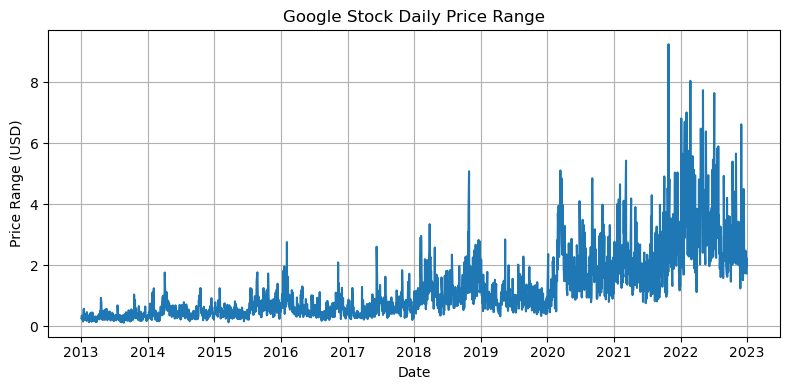

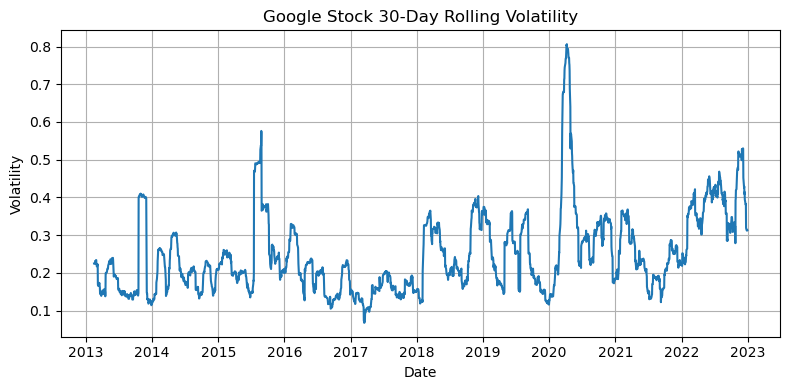


Summary Statistics of Daily Price Range:
count    2518.000000
mean        1.215009
std         1.128034
min         0.112612
25%         0.447623
50%         0.787249
75%         1.622750
max         9.244995
Name: Daily Range, dtype: float64

Summary Statistics of 30-Day Volatility:
count    2488.000000
mean        0.248011
std         0.109102
min         0.067423
25%         0.166514
50%         0.219574
75%         0.313848
max         0.806115
Name: Volatility, dtype: float64

Correlation between Volatility and Volume: 0.0546


In [24]:
print("6. Price Ranges and Volatility Analysis:")

# Calculate daily price range
googl_data['Daily Range'] = googl_data['High'] - googl_data['Low']

# Plot daily price range
plt.figure(figsize=(8, 4))
plt.plot(googl_data.index, googl_data['Daily Range'])
plt.title('Google Stock Daily Price Range')
plt.xlabel('Date')
plt.ylabel('Price Range (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and plot 30-day volatility
googl_data['Log Return'] = np.log(googl_data['Close'] / googl_data['Close'].shift(1))
googl_data['Volatility'] = googl_data['Log Return'].rolling(window=30).std() * np.sqrt(252)  # Annualized

plt.figure(figsize=(8, 4))
plt.plot(googl_data.index, googl_data['Volatility'])
plt.title('Google Stock 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics of daily range and volatility
print("\nSummary Statistics of Daily Price Range:")
print(googl_data['Daily Range'].describe())

print("\nSummary Statistics of 30-Day Volatility:")
print(googl_data['Volatility'].describe())

# Calculate correlation between volatility and volume
vol_volume_corr = googl_data['Volatility'].corr(googl_data['Volume'])
print(f"\nCorrelation between Volatility and Volume: {vol_volume_corr:.4f}")

In [ ]:
# Analyze stock performance and returns

7. Stock Performance and Returns Analysis:


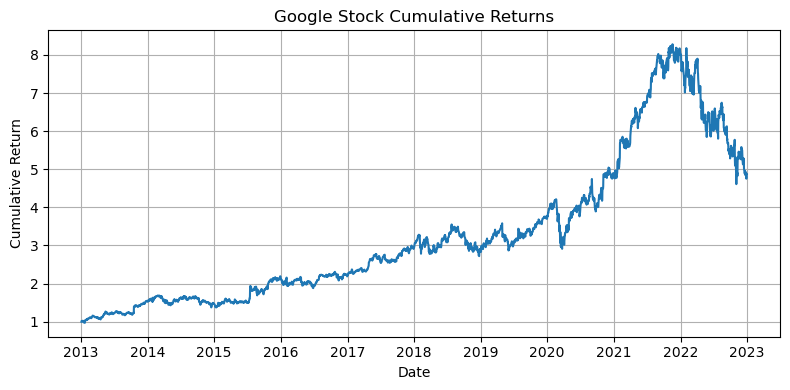


Annual Returns:
Date
2013    0.549547
2014   -0.053940
2015    0.466118
2016    0.018560
2017    0.329295
2018   -0.008012
2019    0.281762
2020    0.308536
2021    0.652958
2022   -0.390896
Name: Daily Return, dtype: float64

Sharpe Ratio: 0.6467


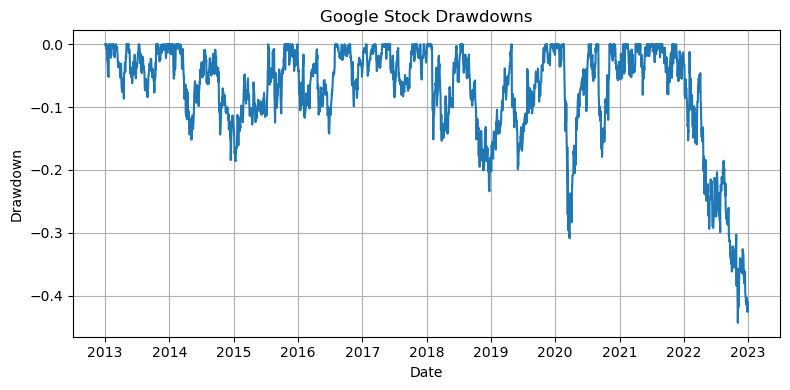


Maximum Drawdown: -44.3201%


In [25]:
print("7. Stock Performance and Returns Analysis:")

# Calculate cumulative returns
googl_data['Cumulative Return'] = (1 + googl_data['Daily Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(8, 4))
plt.plot(googl_data.index, googl_data['Cumulative Return'])
plt.title('Google Stock Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print annual returns
annual_returns = googl_data['Daily Return'].groupby(googl_data.index.year).apply(lambda x: (1 + x).prod() - 1)
print("\nAnnual Returns:")
print(annual_returns)

# Calculate and print risk-adjusted returns (Sharpe Ratio)
risk_free_rate = 0.02  # Assume a 2% risk-free rate
excess_returns = googl_data['Daily Return'] - risk_free_rate/252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()
print(f"\nSharpe Ratio: {sharpe_ratio:.4f}")

# Calculate drawdowns
googl_data['Peak'] = googl_data['Close'].cummax()
googl_data['Drawdown'] = (googl_data['Close'] - googl_data['Peak']) / googl_data['Peak']

# Plot drawdowns
plt.figure(figsize=(8, 4))
plt.plot(googl_data.index, googl_data['Drawdown'])
plt.title('Google Stock Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print maximum drawdown
max_drawdown = googl_data['Drawdown'].min()
print(f"\nMaximum Drawdown: {max_drawdown:.4%}")

In [ ]:
# Correlation Analysis and Pair Plots

8. Correlation Analysis and Pair Plots:


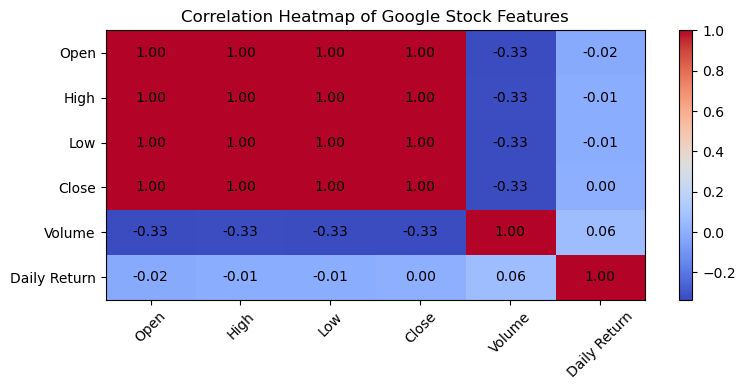

In [46]:
print("8. Correlation Analysis and Pair Plots:")

# Calculate correlation matrix
correlation_matrix = googl_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 4))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap of Google Stock Features')
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center')
plt.tight_layout()
plt.show()



# Google Stock Data - LSTM Model Development 

In [ ]:
# Data preparaion

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load the stock data
import yfinance as yf
googl_data = yf.download('GOOGL', start='2013-01-01', end='2023-01-01')

# Step 2: Feature Selection and Target Variable Creation
# Select the 'Close' price as the feature and create the target variable
data = googl_data[['Close']]

# Create a target variable, which is the next day's close price
data['Target'] = data['Close'].shift(-1)

# Drop the last row with NaN target due to the shift operation
data.dropna(inplace=True)

# Step 3: Data Scaling and Preparation for LSTM
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'Close' prices
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape X to fit the LSTM input shape
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the prepared data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

X_train shape: (1965, 60, 1)
y_train shape: (1965,)
X_test shape: (492, 60, 1)
y_test shape: (492,)



C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\4093163072.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\4093163072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [3]:
# Building and Training the LSTM Model

In [10]:
# Step 4: Build the LSTM Model
from tensorflow.keras.layers import Dropout

model = Sequential()
# Adding the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Adding dropout after the first LSTM layer
model.add(Dense(units=25))  # Additional Dense layer
model.add(Dropout(0.2))  # Adding dropout after the Dense layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Adding dropout after the second LSTM layer
# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Display the model summary
model.summary()

Epoch 1/20
62/62 [==============================] - 6s 46ms/step - loss: 0.0145 - val_loss: 7.0955e-04
Epoch 2/20
62/62 [==============================] - 2s 34ms/step - loss: 0.0027 - val_loss: 9.2272e-04
Epoch 3/20
62/62 [==============================] - 2s 33ms/step - loss: 0.0025 - val_loss: 6.9581e-04
Epoch 4/20
62/62 [==============================] - 2s 36ms/step - loss: 0.0023 - val_loss: 5.7557e-04
Epoch 5/20
62/62 [==============================] - 2s 32ms/step - loss: 0.0020 - val_loss: 7.0782e-04
Epoch 6/20
62/62 [==============================] - 2s 33ms/step - loss: 0.0022 - val_loss: 6.3504e-04
Epoch 7/20
62/62 [==============================] - 2s 32ms/step - loss: 0.0021 - val_loss: 7.0825e-04
Epoch 8/20
62/62 [==============================] - 2s 36ms/step - loss: 0.0022 - val_loss: 7.8727e-04
Epoch 9/20
62/62 [==============================] - 2s 33ms/step - loss: 0.0017 - val_loss: 5.3756e-04
Epoch 10/20
62/62 [==============================] - 2s 33ms/step - loss:

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 6: Evaluate the Model on Training and Testing Data

# Predict on the training set
train_predictions = model.predict(X_train)
# Inverse transform only the predictions using the scaler fitted on 'Close' prices
train_predictions = scaler.inverse_transform(np.hstack((train_predictions, train_predictions)))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Predict on the testing set
test_predictions = model.predict(X_test)
# Inverse transform only the predictions using the scaler fitted on 'Close' prices
test_predictions = scaler.inverse_transform(np.hstack((test_predictions, test_predictions)))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for the training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)
rmse_train = np.sqrt(mse_train)

# Calculate evaluation metrics for the testing data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)
rmse_test = np.sqrt(mse_test)

# Print the evaluation metrics
print(f"Google Stock Data LSTM Model Training Data - Mean Squared Error (MSE): {mse_train}")
print(f"Google Stock Data LSTM Model Training Data - Mean Absolute Error (MAE): {mae_train}")
print(f"Google Stock Data LSTM Model Training Data - Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Google Stock Data LSTM Model Training Data - R-squared (R²): {r2_train}\n")

print(f"Google Stock Data LSTM Model Testing Data - Mean Squared Error (MSE): {mse_test}")
print(f"Google Stock Data LSTM Model Testing Data - Mean Absolute Error (MAE): {mae_test}")
print(f"Google Stock Data LSTM Model Testing Data - Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Google Stock Data LSTM Model Testing Data  - R-squared (R²): {r2_test}\n")


16/16 [==============================] - 0s 10ms/step
Google Stock Data LSTM Model Training Data - Mean Squared Error (MSE): 7.636759626277347
Google Stock Data LSTM Model Training Data - Mean Absolute Error (MAE): 1.8008385937329163
Google Stock Data LSTM Model Training Data - Root Mean Squared Error (RMSE): 2.763468767016799
Google Stock Data LSTM Model Training Data - R-squared (R²): 0.9935981672290446

Google Stock Data LSTM Model Testing Data - Mean Squared Error (MSE): 7.983712807238751
Google Stock Data LSTM Model Testing Data - Mean Absolute Error (MAE): 1.8741583746623218
Google Stock Data LSTM Model Testing Data - Root Mean Squared Error (RMSE): 2.8255464617023645
Google Stock Data LSTM Model Testing Data  - R-squared (R²): 0.9931623591778409



In [ ]:
# Google Stock Price prediction-LSTM model:  Actual Vs Predicted values visualization

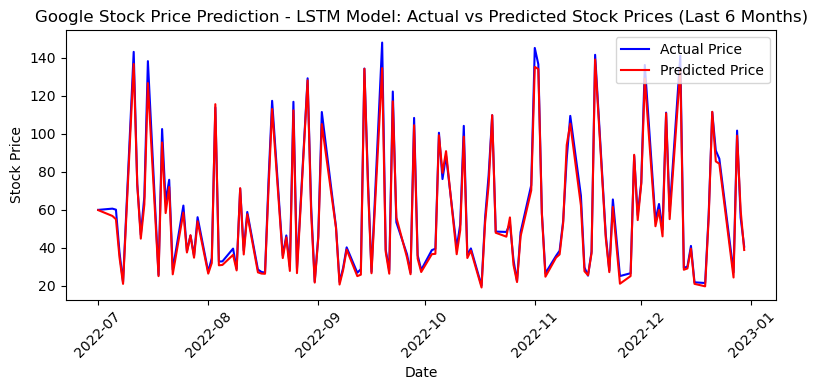

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 4.52%
Prediction Accuracy for last 6 months: 95.48%
Actual price range: $20.06 to $148.05
Predicted price range: $19.10 to $139.15


In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
lstm_visualization_df = googl_data[['Close']].iloc[-len(real_stock_price_test):].copy()
lstm_visualization_df['Actual'] = real_stock_price_test
lstm_visualization_df['Predicted'] = test_predictions

# Filter the dataframe to include only the months from July to December 2022
lstm_filtered_df = lstm_visualization_df.loc['2022-07-01':'2022-12-31']

# Plotting the actual vs predicted prices for the specified date range
plt.figure(figsize=(8, 4))  # Rectangular plot
plt.plot(lstm_filtered_df.index, lstm_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(lstm_filtered_df.index, lstm_filtered_df['Predicted'], color='red', label='Predicted Price')
plt.title('Google Stock Price Prediction - LSTM Model: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {lstm_filtered_df.index.min().date()} to {lstm_filtered_df.index.max().date()}")
print(f"Number of trading days: {len(lstm_filtered_df)}")
mape = np.mean(np.abs((lstm_filtered_df['Actual'] - lstm_filtered_df['Predicted']) / lstm_filtered_df['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")
print(f"Actual price range: ${lstm_filtered_df['Actual'].min():.2f} to ${lstm_filtered_df['Actual'].max():.2f}")
print(f"Predicted price range: ${lstm_filtered_df['Predicted'].min():.2f} to ${lstm_filtered_df['Predicted'].max():.2f}")

# Google Stock - Random Forest Model Development

In [14]:
# Data Preparation 

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Step 1: Data Preparation
# Select the 'Close' price as the feature and create the target variable
data = googl_data[['Close']]

# Create a target variable, which is the next day's close price
data['Target'] = data['Close'].shift(-1)

# Drop the last row with NaN target due to the shift operation
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

# Convert to numpy arrays and reshape for Random Forest
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the prepared data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (1965, 60)
y_train shape: (1965,)
X_test shape: (492, 60)
y_test shape: (492,)


C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_17584\3002263229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_17584\3002263229.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [16]:
# Model Building and Hyperparameter Tuning with GridSearchCV

In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler


# Step 1: Data Preparation
# Select the 'Close' price as the feature and create the target variable
data = googl_data[['Close']].copy()  
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

X, y = np.array(X), np.array(y)

# Reshape X for Random Forest model (2D input)
X_rf = X.reshape(X.shape[0], X.shape[1])

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Model Building and Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [10, 20],          
    'max_depth': [3, 5],              
    'min_samples_split': [10, 15],     
    'min_samples_leaf': [10, 15],      
    'max_features': [1, 'sqrt'],     
    'bootstrap': [True]               
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train_rf, y_train)
print("GridSearchCV completed.")

# Extract the best parameters and the best model
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")




Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


In [ ]:
# Evaluation of RF with Google stock data

In [210]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 3: Evaluate the Random Forest (RF) Model

# Predict on the training set
rf_train_predictions = best_rf_model.predict(X_train_rf)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Predict on the testing set
rf_test_predictions = best_rf_model.predict(X_test_rf)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for the training data
rf_mse_train = mean_squared_error(real_stock_price_train, rf_train_predictions)
rf_mae_train = mean_absolute_error(real_stock_price_train, rf_train_predictions)
rf_r2_train = r2_score(real_stock_price_train, rf_train_predictions)
rf_rmse_train = np.sqrt(rf_mse_train)

# Calculate evaluation metrics for the testing data
rf_mse_test = mean_squared_error(real_stock_price_test, rf_test_predictions)
rf_mae_test = mean_absolute_error(real_stock_price_test, rf_test_predictions)
rf_r2_test = r2_score(real_stock_price_test, rf_test_predictions)
rf_rmse_test = np.sqrt(rf_mse_test)

# Print RF Model Metrics for Training Data
print(f"Google Stock Data RF Model - Training Data - Mean Squared Error (MSE): {rf_mse_train}")
print(f"Google Stock Data RF Model - Training Data - Mean Absolute Error (MAE): {rf_mae_train}")
print(f"Google Stock Data RF Model - Training Data - Root Mean Squared Error (RMSE): {rf_rmse_train}")
print(f"Google Stock Data RF Model - Training Data - R-squared (R²): {rf_r2_train}\n")

# Print RF Model Metrics for Testing Data
print(f"Google Stock RF Model - Testing Data - Mean Squared Error (MSE): {rf_mse_test}")
print(f"Google Stock RF Model - Testing Data - Mean Absolute Error (MAE): {rf_mae_test}")
print(f"Google Stock RF Model - Testing Data - Root Mean Squared Error (RMSE): {rf_rmse_test}")
print(f"Google Stock RF Model - Testing Data - R-squared (R²): {rf_r2_test}\n")


Google Stock Data RF Model - Training Data - Mean Squared Error (MSE): 3.985186834120478
Google Stock Data RF Model - Training Data - Mean Absolute Error (MAE): 1.3613355865896872
Google Stock Data RF Model - Training Data - Root Mean Squared Error (RMSE): 1.996293273574922
Google Stock Data RF Model - Training Data - R-squared (R²): 0.9966592506610701

Google Stock RF Model - Testing Data - Mean Squared Error (MSE): 6.595456078027412
Google Stock RF Model - Testing Data - Mean Absolute Error (MAE): 1.710669229034311
Google Stock RF Model - Testing Data - Root Mean Squared Error (RMSE): 2.5681620038516675
Google Stock RF Model - Testing Data - R-squared (R²): 0.9943513299126957



In [23]:
# Google Stock price Prediction RF Model- Actual Vs Predicted values 

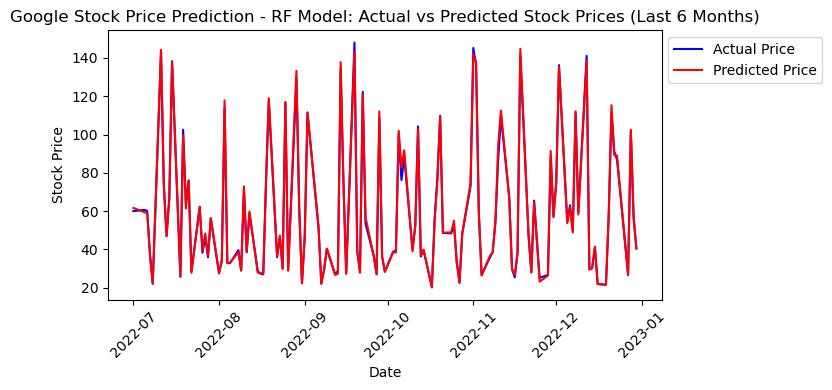

In [278]:
import matplotlib.pyplot as plt

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
rf_visualization_df = googl_data[['Close']].iloc[-len(real_stock_price_test):].copy()
rf_visualization_df['Actual'] = real_stock_price_test
rf_visualization_df['Predicted'] = rf_test_predictions

# Filter the dataframe to include only the months from July to December 2022
rf_filtered_df = rf_visualization_df.loc['2022-07-01':'2022-12-31']

# Plot the actual vs predicted prices for the selected range
plt.figure(figsize=(8, 4))  # Rectangular plot
plt.plot(rf_filtered_df.index, rf_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(rf_filtered_df.index, rf_filtered_df['Predicted'], color='red', label='Predicted Price')
plt.title('Google Stock Price Prediction - RF Model: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Adjust the legend position to the upper left corner and add a box around it
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


# Google Stock Data -Model Integration(Hybrid model) 

In [25]:
# Prepare LSTM for integration

In [95]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Preparation

# Select the 'Close' price as the feature and create the target variable
data = googl_data[['Close']]
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build and Train the LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 3: Predict with the LSTM Model
lstm_train_predictions = model_lstm.predict(X_train)
lstm_train_predictions = scaler.inverse_transform(np.hstack((lstm_train_predictions, lstm_train_predictions)))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

lstm_test_predictions = model_lstm.predict(X_test)
lstm_test_predictions = scaler.inverse_transform(np.hstack((lstm_test_predictions, lstm_test_predictions)))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]


C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\2442032187.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\2442032187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Epoch 1/20
62/62 [==============================] - 7s 45ms/step - loss: 0.0077 - val_loss: 5.6487e-04
Epoch 2/20
62/62 [==============================] - 2s 31ms/step - loss: 4.7595e-04 - val_loss: 4.9753e-04
Epoch 3/20
62/62 [==============================] - 2s 32ms/step - loss: 5.1665e-04 - val_loss: 5.3547e-04
Epoch 4/20
62/62 [==============================] - 2s 31ms/step - loss: 4.8313e-04 - val_loss: 5.4499e-04
Epoch 5/20
62/62 [==============================] - 2s 32ms/step - loss: 4.4947e-04 - val_loss: 4.7107e-04
Epoch 6/20
62/62 [==============================] - 2s 32ms/step - loss: 4.6180e-04 - val_loss: 4.7668e-04
Epoch 7/20
62/62 [==============================] - 2s 31ms/step - loss: 4.1629e-04 - val_loss: 6.0404e-04
Epoch 8/20
62/62 [==============================] - 2s 34ms/step - loss: 4.2769e-04 - val_loss: 4.2162e-04
Epoch 9/20
62/62 [==============================] - 2s 33ms/step - loss: 4.3334e-04 - val_loss: 6.6582e-04
Epoch 10/20
62/62 [======================

In [27]:
# Prepare RF for model integration

In [96]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Preparation
# Select the 'Close' price as the feature and create the target variable
data = googl_data[['Close']]
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

X, y = np.array(X), np.array(y)

# Reshape for Random Forest model (2D input)
X_rf = X.reshape(X.shape[0], X.shape[1])

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Step 2: Model Building and Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [10, 15],
    'bootstrap': [True],
    'max_features': [1, 'sqrt']  
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Add a print statement to notify when training starts
print("Starting model training...")

# Fit the model
grid_search.fit(X_train_rf, y_train)

# Notify when training is complete
print("Model training completed.")

# Extract the best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Predict with the RF Model
rf_train_predictions = best_rf_model.predict(X_train_rf)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]

rf_test_predictions = best_rf_model.predict(X_test_rf)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]

print("Predictions completed.")


C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\2078843341.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\2078843341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Starting model training...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Model training completed.
Predictions completed.


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 7: Combine Predictions (Hybrid Model)
# Combine LSTM and RF predictions by averaging them
hybrid_train_predictions = (lstm_train_predictions + rf_train_predictions) / 2
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# Step 8: Evaluate the Hybrid Model on Training Data
hybrid_mse_train = mean_squared_error(real_stock_price_train, hybrid_train_predictions)
hybrid_mae_train = mean_absolute_error(real_stock_price_train, hybrid_train_predictions)
hybrid_r2_train = r2_score(real_stock_price_train, hybrid_train_predictions)
hybrid_rmse_train = np.sqrt(hybrid_mse_train)

# Evaluate the Hybrid Model on Testing Data
hybrid_mse_test = mean_squared_error(real_stock_price_test, hybrid_test_predictions)
hybrid_mae_test = mean_absolute_error(real_stock_price_test, hybrid_test_predictions)
hybrid_r2_test = r2_score(real_stock_price_test, hybrid_test_predictions)
hybrid_rmse_test = np.sqrt(hybrid_mse_test)

# Print evaluation metrics for the hybrid model
print(f"Google Stock Data Hybrid Model - Training Data - Mean Squared Error (MSE): {hybrid_mse_train}")
print(f"Google Stock Data Hybrid Model - Training Data - Mean Absolute Error (MAE): {hybrid_mae_train}")
print(f"Google Stock Data Hybrid Model - Training Data - Root Mean Squared Error (RMSE): {hybrid_rmse_train}")
print(f"Google Stock Data Hybrid Model - Training Data - R-squared (R²): {hybrid_r2_train}\n")

print(f"Google Stock Data Hybrid Model - Testing Data - Mean Squared Error (MSE): {hybrid_mse_test}")
print(f"Google Stock Data Hybrid Model - Testing Data - Mean Absolute Error (MAE): {hybrid_mae_test}")
print(f"Google Stock Data Hybrid Model - Testing Data - Root Mean Squared Error (RMSE): {hybrid_rmse_test}")
print(f"Google Stock Data Hybrid Model - Testing Data - R-squared (R²): {hybrid_r2_test}\n")




Google Stock Data Hybrid Model - Training Data - Mean Squared Error (MSE): 4.593446155324476
Google Stock Data Hybrid Model - Training Data - Mean Absolute Error (MAE): 1.424291088868899
Google Stock Data Hybrid Model - Training Data - Root Mean Squared Error (RMSE): 2.1432326414378062
Google Stock Data Hybrid Model - Training Data - R-squared (R²): 0.9961493518759461

Google Stock Data Hybrid Model - Testing Data - Mean Squared Error (MSE): 6.141434807815722
Google Stock Data Hybrid Model - Testing Data - Mean Absolute Error (MAE): 1.6672601864158134
Google Stock Data Hybrid Model - Testing Data - Root Mean Squared Error (RMSE): 2.4781918424157
Google Stock Data Hybrid Model - Testing Data - R-squared (R²): 0.9947401758602245



In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 7: Combine Predictions (Hybrid Model)
# Combine LSTM and RF predictions by averaging them
hybrid_train_predictions = (lstm_train_predictions + rf_train_predictions) / 2
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# Step 8: Evaluate the Hybrid Model on Training Data
hybrid_mse_train = mean_squared_error(real_stock_price_train, hybrid_train_predictions)
hybrid_mae_train = mean_absolute_error(real_stock_price_train, hybrid_train_predictions)
hybrid_r2_train = r2_score(real_stock_price_train, hybrid_train_predictions)
hybrid_rmse_train = np.sqrt(hybrid_mse_train)

# Evaluate the Hybrid Model on Testing Data
hybrid_mse_test = mean_squared_error(real_stock_price_test, hybrid_test_predictions)
hybrid_mae_test = mean_absolute_error(real_stock_price_test, hybrid_test_predictions)
hybrid_r2_test = r2_score(real_stock_price_test, hybrid_test_predictions)
hybrid_rmse_test = np.sqrt(hybrid_mse_test)

# Print evaluation metrics for the hybrid model
print(f"Google Stock Data Hybrid Model - Training Data - Mean Squared Error (MSE): {hybrid_mse_train}")
print(f"Google Stock Data Hybrid Model - Training Data - Mean Absolute Error (MAE): {hybrid_mae_train}")
print(f"Google Stock Data Hybrid Model - Training Data - Root Mean Squared Error (RMSE): {hybrid_rmse_train}")
print(f"Google Stock Data Hybrid Model - Training Data - R-squared (R²): {hybrid_r2_train}\n")

print(f"Google Stock Data Hybrid Model - Testing Data - Mean Squared Error (MSE): {hybrid_mse_test}")
print(f"Google Stock Data Hybrid Model - Testing Data - Mean Absolute Error (MAE): {hybrid_mae_test}")
print(f"Google Stock Data Hybrid Model - Testing Data - Root Mean Squared Error (RMSE): {hybrid_rmse_test}")
print(f"Google Stock Data Hybrid Model - Testing Data - R-squared (R²): {hybrid_r2_test}\n")




Google Stock Data Hybrid Model - Training Data - Mean Squared Error (MSE): 4.469960878176913
Google Stock Data Hybrid Model - Training Data - Mean Absolute Error (MAE): 1.4233980482143367
Google Stock Data Hybrid Model - Training Data - Root Mean Squared Error (RMSE): 2.1142281991726706
Google Stock Data Hybrid Model - Training Data - R-squared (R²): 0.996252868567928

Google Stock Data Hybrid Model - Testing Data - Mean Squared Error (MSE): 5.835439401466642
Google Stock Data Hybrid Model - Testing Data - Mean Absolute Error (MAE): 1.625707003230036
Google Stock Data Hybrid Model - Testing Data - Root Mean Squared Error (RMSE): 2.4156654158775055
Google Stock Data Hybrid Model - Testing Data - R-squared (R²): 0.9950022452422729



In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler


# Step 1: Data Preparation
# Select the 'Close' price as the feature and create the target variable
data = googl_data[['Close']]
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

X, y = np.array(X), np.array(y)

# Reshape for Random Forest model (2D input)
X_rf = X.reshape(X.shape[0], X.shape[1])

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Step 2: Model Building and Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [10, 15],
    'bootstrap': [True],
    'max_features': [1,'sqrt',]  
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_rf, y_train)

# Extract the best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Predict with the RF Model
rf_train_predictions = best_rf_model.predict(X_train_rf)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]

rf_test_predictions = best_rf_model.predict(X_test_rf)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]


C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_17584\965635115.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_17584\965635115.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


# Evaluation of Hybrid model on Google stock data 

In [267]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 7: Combine Predictions (Hybrid Model)
# Combine LSTM and RF predictions by averaging them
hybrid_train_predictions = (lstm_train_predictions + rf_train_predictions) / 2
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# Step 8: Evaluate the Hybrid Model on Training Data
hybrid_mse_train = mean_squared_error(real_stock_price_train, hybrid_train_predictions)
hybrid_mae_train = mean_absolute_error(real_stock_price_train, hybrid_train_predictions)
hybrid_r2_train = r2_score(real_stock_price_train, hybrid_train_predictions)
hybrid_rmse_train = np.sqrt(hybrid_mse_train)

# Evaluate the Hybrid Model on Testing Data
hybrid_mse_test = mean_squared_error(real_stock_price_test, hybrid_test_predictions)
hybrid_mae_test = mean_absolute_error(real_stock_price_test, hybrid_test_predictions)
hybrid_r2_test = r2_score(real_stock_price_test, hybrid_test_predictions)
hybrid_rmse_test = np.sqrt(hybrid_mse_test)

# Print evaluation metrics for the hybrid model
print(f"Google Stock Data Hybrid Model - Training Data - Mean Squared Error (MSE): {hybrid_mse_train}")
print(f"Google Stock Data Hybrid Model - Training Data - Mean Absolute Error (MAE): {hybrid_mae_train}")
print(f"Google Stock Data Hybrid Model - Training Data - Root Mean Squared Error (RMSE): {hybrid_rmse_train}")
print(f"Google Stock Data Hybrid Model - Training Data - R-squared (R²): {hybrid_r2_train}\n")

print(f"Google Stock Data Hybrid Model - Testing Data - Mean Squared Error (MSE): {hybrid_mse_test}")
print(f"Google Stock Data Hybrid Model - Testing Data - Mean Absolute Error (MAE): {hybrid_mae_test}")
print(f"Google Stock Data Hybrid Model - Testing Data - Root Mean Squared Error (RMSE): {hybrid_rmse_test}")
print(f"Google Stock Data Hybrid Model - Testing Data - R-squared (R²): {hybrid_r2_test}\n")




Google Stock Data Hybrid Model - Training Data - Mean Squared Error (MSE): 2.139278421025457
Google Stock Data Hybrid Model - Training Data - Mean Absolute Error (MAE): 0.9386909729522604
Google Stock Data Hybrid Model - Training Data - Root Mean Squared Error (RMSE): 1.4626272324230316
Google Stock Data Hybrid Model - Training Data - R-squared (R²): 0.9982066604984142

Google Stock Data Hybrid Model - Testing Data - Mean Squared Error (MSE): 4.249556814899785
Google Stock Data Hybrid Model - Testing Data - Mean Absolute Error (MAE): 1.3490994083663068
Google Stock Data Hybrid Model - Testing Data - Root Mean Squared Error (RMSE): 2.061445321831211
Google Stock Data Hybrid Model - Testing Data - R-squared (R²): 0.9963604723948365



In [ ]:
# Google Stock price Prediction Hybrid Model- Actual Vs Predicted values 

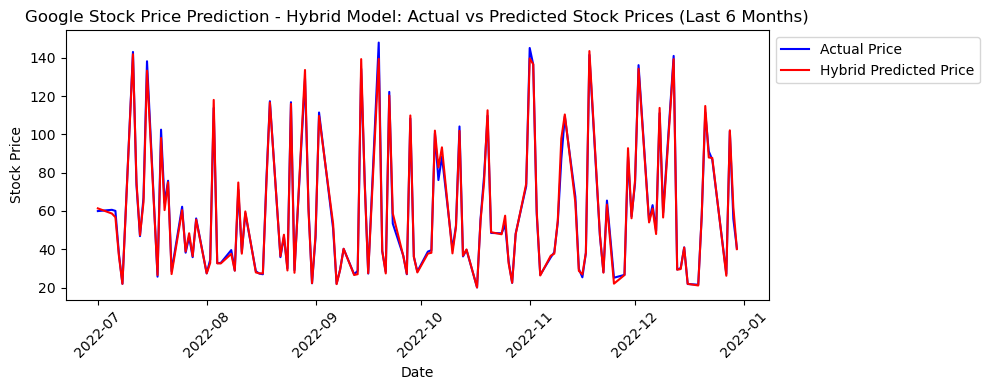

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 2.58%
Prediction Accuracy for last 6 months: 97.42%
Actual price range: $20.06 to $148.05
Predicted price range: $20.01 to $143.61


In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
hybrid_visualization_df = googl_data[['Close']].iloc[-len(real_stock_price_test):].copy()
hybrid_visualization_df['Actual'] = real_stock_price_test
hybrid_visualization_df['Predicted'] = hybrid_test_predictions

# Filter the dataframe to include only the months from July to December 2022
hybrid_filtered_df = hybrid_visualization_df.loc['2022-07-01':'2022-12-31']

# Plot the actual vs predicted prices for the selected range
plt.figure(figsize=(10, 4))  # Rectangular plot
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Predicted'], color='red', label='Hybrid Predicted Price')
plt.title('Google Stock Price Prediction - Hybrid Model: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Adjust the legend position to the upper left corner and add a box around it
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {hybrid_filtered_df.index.min().date()} to {hybrid_filtered_df.index.max().date()}")
print(f"Number of trading days: {len(hybrid_filtered_df)}")
mape = np.mean(np.abs((hybrid_filtered_df['Actual'] - hybrid_filtered_df['Predicted']) / hybrid_filtered_df['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")
print(f"Actual price range: ${hybrid_filtered_df['Actual'].min():.2f} to ${hybrid_filtered_df['Actual'].max():.2f}")
print(f"Predicted price range: ${hybrid_filtered_df['Predicted'].min():.2f} to ${hybrid_filtered_df['Predicted'].max():.2f}")


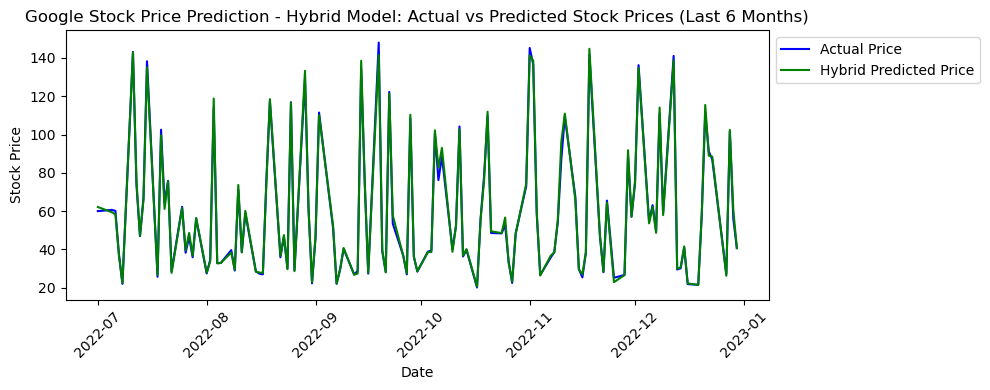

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 2.16%
Prediction Accuracy for last 6 months: 97.84%
Actual price range: $20.06 to $148.05
Predicted price range: $20.50 to $144.80


In [275]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
hybrid_visualization_df = googl_data[['Close']].iloc[-len(real_stock_price_test):].copy()
hybrid_visualization_df['Actual'] = real_stock_price_test
hybrid_visualization_df['Predicted'] = hybrid_test_predictions

# Filter the dataframe to include only the months from July to December 2022
hybrid_filtered_df = hybrid_visualization_df.loc['2022-07-01':'2022-12-31']

# Plot the actual vs predicted prices for the selected range
plt.figure(figsize=(10, 4))  # Rectangular plot
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Predicted'], color='green', label='Hybrid Predicted Price')
plt.title('Google Stock Price Prediction - Hybrid Model: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Adjust the legend position to the upper left corner and add a box around it
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {hybrid_filtered_df.index.min().date()} to {hybrid_filtered_df.index.max().date()}")
print(f"Number of trading days: {len(hybrid_filtered_df)}")
mape = np.mean(np.abs((hybrid_filtered_df['Actual'] - hybrid_filtered_df['Predicted']) / hybrid_filtered_df['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")
print(f"Actual price range: ${hybrid_filtered_df['Actual'].min():.2f} to ${hybrid_filtered_df['Actual'].max():.2f}")
print(f"Predicted price range: ${hybrid_filtered_df['Predicted'].min():.2f} to ${hybrid_filtered_df['Predicted'].max():.2f}")


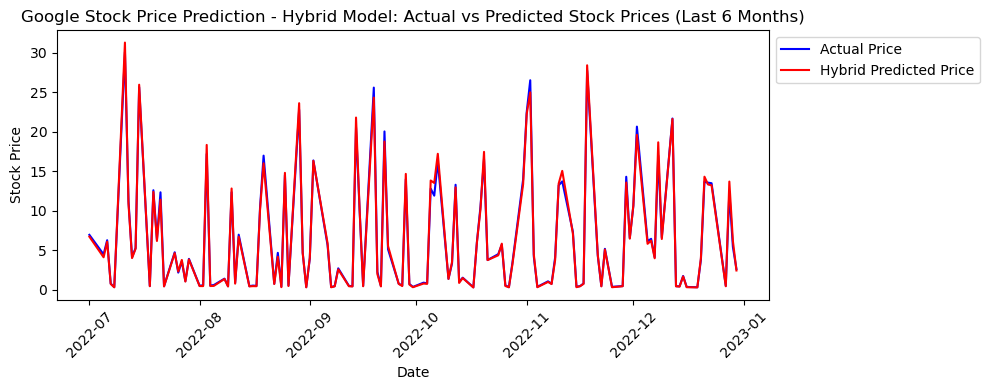

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 6.08%
Prediction Accuracy for last 6 months: 93.92%
Actual price range: $0.34 to $30.04
Predicted price range: $0.31 to $31.26


In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
hybrid_visualization_df = googl_data[['Close']].iloc[-len(real_stock_price_test):].copy()
hybrid_visualization_df['Actual'] = real_stock_price_test
hybrid_visualization_df['Predicted'] = hybrid_test_predictions

# Filter the dataframe to include only the months from July to December 2022
hybrid_filtered_df = hybrid_visualization_df.loc['2022-07-01':'2022-12-31']

# Plot the actual vs predicted prices for the selected range
plt.figure(figsize=(10, 4))  # Rectangular plot
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Predicted'], color='red', label='Hybrid Predicted Price')
plt.title('Google Stock Price Prediction - Hybrid Model: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Adjust the legend position to the upper left corner and add a box around it
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {hybrid_filtered_df.index.min().date()} to {hybrid_filtered_df.index.max().date()}")
print(f"Number of trading days: {len(hybrid_filtered_df)}")
mape = np.mean(np.abs((hybrid_filtered_df['Actual'] - hybrid_filtered_df['Predicted']) / hybrid_filtered_df['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")
print(f"Actual price range: ${hybrid_filtered_df['Actual'].min():.2f} to ${hybrid_filtered_df['Actual'].max():.2f}")
print(f"Predicted price range: ${hybrid_filtered_df['Predicted'].min():.2f} to ${hybrid_filtered_df['Predicted'].max():.2f}")


# Google Sentiment  Data Analysis

In [12]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Generate synthetic sentiment data
date_range = googl_data.index
num_samples = len(date_range)

# Create balanced sentiment data
sentiments = np.concatenate([
    np.ones(num_samples // 3),
    np.zeros(num_samples // 3),
    np.full(num_samples - 2 * (num_samples // 3), -1)
])

# Shuffle the sentiments
sentiments = shuffle(sentiments, random_state=42)

# Function to generate text based on sentiment
def generate_text(sentiment):
    positive_texts = [
        "Bullish outlook for the stock",
        "Strong buy recommendation",
        "Impressive quarterly results",
        "Positive market trend",
        "Exciting new product launch"
    ]
    neutral_texts = [
        "Steady market performance",
        "Hold recommendation",
        "Mixed economic indicators",
        "Awaiting more market data",
        "Balanced risk-reward ratio"
    ]
    negative_texts = [
        "Bearish market sentiment",
        "Sell recommendation",
        "Disappointing earnings report",
        "Economic uncertainties ahead",
        "Increased competition in the sector"
    ]
    
    if sentiment == 1:
        return np.random.choice(positive_texts)
    elif sentiment == 0:
        return np.random.choice(neutral_texts)
    else:
        return np.random.choice(negative_texts)

# Generate text for each sentiment
texts = [generate_text(sentiment) for sentiment in sentiments]

# Create a DataFrame with dates, ticker, texts, and sentiments
df_sentiment = pd.DataFrame({
    'Date': date_range,
    'Ticker': 'GOOGL',
    'Text': texts,
    'Sentiment': sentiments
})

df_sentiment.set_index('Date', inplace=True)

# Display the head of the sentiment data
print(df_sentiment.head())

# Check if sentiment classes are balanced
sentiment_counts = df_sentiment['Sentiment'].value_counts()
print("\nSentiment class distribution:")
print(sentiment_counts)

# Calculate the balance ratio
balance_ratio = sentiment_counts.min() / sentiment_counts.max()

print(f"\nBalance ratio: {balance_ratio:.2f}")
if balance_ratio > 0.9:
    print("The sentiment classes are well-balanced.")
else:
    print("The sentiment classes are not well-balanced.")

           Ticker                                 Text  Sentiment
Date                                                             
2013-01-02  GOOGL             Bearish market sentiment       -1.0
2013-01-03  GOOGL            Strong buy recommendation        1.0
2013-01-04  GOOGL           Balanced risk-reward ratio        0.0
2013-01-07  GOOGL           Balanced risk-reward ratio        0.0
2013-01-08  GOOGL  Increased competition in the sector       -1.0

Sentiment class distribution:
Sentiment
-1.0    840
 1.0    839
 0.0    839
Name: count, dtype: int64

Balance ratio: 1.00
The sentiment classes are well-balanced.


# Combine Google Sentiment Data with Stock Data

In [13]:
# Merge the sentiment data with the entire stock data (all columns)
combined_data = googl_data.merge(df_sentiment[['Sentiment']], left_index=True, right_index=True)

# Adjust Pandas display options to show all columns on the same line
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set the display width to accommodate all columns

# Display the head of the combined data
print(combined_data.head())


                 Open       High        Low      Close  Adj Close     Volume  Sentiment
Date                                                                                   
2013-01-02  18.003504  18.193193  17.931683  18.099348  18.078600  101550348       -1.0
2013-01-03  18.141392  18.316566  18.036036  18.109859  18.089098   92635272        1.0
2013-01-04  18.251753  18.555305  18.210211  18.467718  18.446547  110429460        0.0
2013-01-07  18.404655  18.503002  18.282784  18.387136  18.366058   66161772        0.0
2013-01-08  18.406906  18.425926  18.128880  18.350851  18.329815   66976956       -1.0


# Google Combined Data -LSTM Model Development

In [ ]:
# Data prepara

In [14]:
# Data Preparation with Sentiment as an Additional Feature

# Scale the data including the sentiment feature
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_combined_data = scaler.fit_transform(combined_data)

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_combined_data)):
    X.append(scaled_combined_data[i-sequence_length:i])  # Use all features including sentiment
    y.append(scaled_combined_data[i, combined_data.columns.get_loc('Close')])  # Target Variable

X, y = np.array(X), np.array(y)

# Display the shape of the data
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (2458, 60, 7)
y shape: (2458,)


In [53]:
# Split the Data into Training and Testing Sets

In [15]:
#  Split the Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (1966, 60, 7)
X_test shape: (492, 60, 7)
y_train shape: (1966,)
y_test shape: (492,)


# Build and Train the LSTM Model with Sentiment as an Additional Feature

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#Build and Train the LSTM Model

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
62/62 [==============================] - 6s 43ms/step - loss: 0.0121 - val_loss: 4.9037e-04
Epoch 2/20
62/62 [==============================] - 2s 31ms/step - loss: 4.4219e-04 - val_loss: 4.7648e-04
Epoch 3/20
62/62 [==============================] - 2s 31ms/step - loss: 3.9093e-04 - val_loss: 4.0185e-04
Epoch 4/20
62/62 [==============================] - 2s 30ms/step - loss: 3.7231e-04 - val_loss: 4.4848e-04
Epoch 5/20
62/62 [==============================] - 2s 30ms/step - loss: 3.4661e-04 - val_loss: 4.7850e-04
Epoch 6/20
62/62 [==============================] - 2s 30ms/step - loss: 3.7558e-04 - val_loss: 3.6075e-04
Epoch 7/20
62/62 [==============================] - 2s 31ms/step - loss: 3.2136e-04 - val_loss: 3.3563e-04
Epoch 8/20
62/62 [==============================] - 2s 33ms/step - loss: 3.1534e-04 - val_loss: 3.3272e-04
Epoch 9/20
62/62 [==============================] - 2s 37ms/step - loss: 3.0741e-04 - val_loss: 3.3579e-04
Epoch 10/20
62/62 [======================

In [57]:
# Evaluate the LSTM Model with combined Google Data

In [215]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 7: Predict and Evaluate the LSTM Model with Combined Data

# Predict on the training set
train_predictions = model_lstm.predict(X_train)
train_predictions = scaler.inverse_transform(
    np.hstack((train_predictions, np.zeros((train_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_train = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Predict on the testing set
test_predictions = model_lstm.predict(X_test)
test_predictions = scaler.inverse_transform(
    np.hstack((test_predictions, np.zeros((test_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_test = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Calculate evaluation metrics for the training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)
rmse_train = np.sqrt(mse_train)

# Calculate evaluation metrics for the testing data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)
rmse_test = np.sqrt(mse_test)

# Print metrics with labels indicating combined data
print(f"Google Combined Data LSTM Model  - Training Data - Mean Squared Error (MSE): {mse_train}")
print(f"Google Combined Data LSTM Model  - Training Data - Mean Absolute Error (MAE): {mae_train}")
print(f"Google Combined Data LSTM Model  - Training Data - Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Google Combined Data LSTM Model  - Training Data - R-squared (R²): {r2_train}\n")

print(f"Google Combined Data LSTM Model  - Testing Data - Mean Squared Error (MSE): {mse_test}")
print(f"Google Combined Data LSTM Model  - Testing Data - Mean Absolute Error (MAE): {mae_test}")
print(f"Google Combined Data LSTM Model  - Testing Data - Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Google Combined Data LSTM Model  - Testing Data - R-squared (R²): {r2_test}\n")


16/16 [==============================] - 0s 14ms/step
Google Combined Data LSTM Model  - Training Data - Mean Squared Error (MSE): 3.6057104086234055
Google Combined Data LSTM Model  - Training Data - Mean Absolute Error (MAE): 1.2290312101016725
Google Combined Data LSTM Model  - Training Data - Root Mean Squared Error (RMSE): 1.898870824627996
Google Combined Data LSTM Model  - Training Data - R-squared (R²): 0.9970699166436562

Google Combined Data LSTM Model  - Testing Data - Mean Squared Error (MSE): 3.6317188409167533
Google Combined Data LSTM Model  - Testing Data - Mean Absolute Error (MAE): 1.2578906347815106
Google Combined Data LSTM Model  - Testing Data - Root Mean Squared Error (RMSE): 1.9057069136981042
Google Combined Data LSTM Model  - Testing Data - R-squared (R²): 0.9968157090974197



In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict and Evaluate the LSTM Model with Combined Data

# Predict on the training set
train_predictions = model_lstm.predict(X_train)
train_predictions = scaler.inverse_transform(
    np.hstack((train_predictions, np.zeros((train_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_train = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Predict on the testing set
test_predictions = model_lstm.predict(X_test)
test_predictions = scaler.inverse_transform(
    np.hstack((test_predictions, np.zeros((test_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_test = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Calculate evaluation metrics for the training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)
rmse_train = np.sqrt(mse_train)

# Calculate evaluation metrics for the testing data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)
rmse_test = np.sqrt(mse_test)

# Print metrics with labels indicating combined data
print(f"Google Combined Data LSTM Model  - Training Data - Mean Squared Error (MSE): {mse_train}")
print(f"Google Combined Data LSTM Model  - Training Data - Mean Absolute Error (MAE): {mae_train}")
print(f"Google Combined Data LSTM Model  - Training Data - Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Google Combined Data LSTM Model  - Training Data - R-squared (R²): {r2_train}\n")

print(f"Google Combined Data LSTM Model  - Testing Data - Mean Squared Error (MSE): {mse_test}")
print(f"Google Combined Data LSTM Model  - Testing Data - Mean Absolute Error (MAE): {mae_test}")
print(f"Google Combined Data LSTM Model  - Testing Data - Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Google Combined Data LSTM Model  - Testing Data - R-squared (R²): {r2_test}\n")


16/16 [==============================] - 0s 10ms/step
Google Combined Data LSTM Model  - Training Data - Mean Squared Error (MSE): 4.903424940411678
Google Combined Data LSTM Model  - Training Data - Mean Absolute Error (MAE): 1.4542967434082323
Google Combined Data LSTM Model  - Training Data - Root Mean Squared Error (RMSE): 2.2143678421643678
Google Combined Data LSTM Model  - Training Data - R-squared (R²): 0.9960153639148002

Google Combined Data LSTM Model  - Testing Data - Mean Squared Error (MSE): 5.345994946326788
Google Combined Data LSTM Model  - Testing Data - Mean Absolute Error (MAE): 1.4974330397803541
Google Combined Data LSTM Model  - Testing Data - Root Mean Squared Error (RMSE): 2.312140771304115
Google Combined Data LSTM Model  - Testing Data - R-squared (R²): 0.9953126318918093



In [59]:
# Google Stock price Prediction Combined Data, LSTM Model- Actual Vs Predicted values visualization

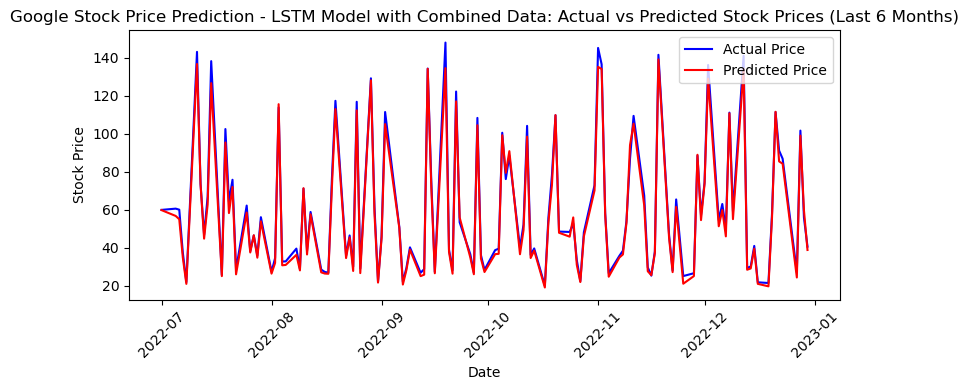

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 4.52%
Prediction Accuracy for last 6 months: 95.48%
Actual price range: $20.06 to $148.05
Predicted price range: $19.10 to $139.15


In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
lstm_combined_df = pd.DataFrame({
    'Date': combined_data.index[-len(real_stock_price_test):],
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})
lstm_combined_df.set_index('Date', inplace=True)

# Filter the dataframe to include only the months from July to December 2022
lstm_combined_filtered = lstm_combined_df.loc['2022-07-01':'2022-12-31']

# Plotting the actual vs predicted prices for the specified date range
plt.figure(figsize=(8, 4))  # Rectangular plot
plt.plot(lstm_combined_filtered.index, lstm_combined_filtered['Actual'], color='blue', label='Actual Price')
plt.plot(lstm_combined_filtered.index, lstm_combined_filtered['Predicted'], color='red', label='Predicted Price')
plt.title('Google Stock Price Prediction - LSTM Model with Combined Data: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {lstm_combined_filtered.index.min().date()} to {lstm_combined_filtered.index.max().date()}")
print(f"Number of trading days: {len(lstm_combined_filtered)}")
mape = np.mean(np.abs((lstm_combined_filtered['Actual'] - lstm_combined_filtered['Predicted']) / lstm_combined_filtered['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")
print(f"Actual price range: ${lstm_combined_filtered['Actual'].min():.2f} to ${lstm_combined_filtered['Actual'].max():.2f}")
print(f"Predicted price range: ${lstm_combined_filtered['Predicted'].min():.2f} to ${lstm_combined_filtered['Predicted'].max():.2f}")

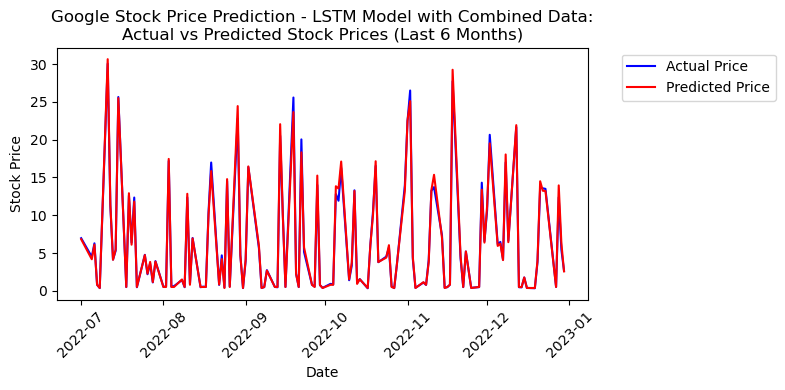

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 5.12%
Prediction Accuracy for last 6 months: 94.88%
Actual price range: $0.34 to $30.04
Predicted price range: $0.37 to $30.64


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
lstm_combined_df = pd.DataFrame({
    'Date': combined_data.index[-len(real_stock_price_test):],
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})
lstm_combined_df.set_index('Date', inplace=True)

# Filter the dataframe to include only the months from July to December 2022
lstm_combined_filtered = lstm_combined_df.loc['2022-07-01':'2022-12-31']

# Plotting the actual vs predicted prices for the specified date range
plt.figure(figsize=(8, 4))  # Increased width to accommodate legend
plt.plot(lstm_combined_filtered.index, lstm_combined_filtered['Actual'], color='blue', label='Actual Price')
plt.plot(lstm_combined_filtered.index, lstm_combined_filtered['Predicted'], color='red', label='Predicted Price')
plt.title('Google Stock Price Prediction - LSTM Model with Combined Data:\nActual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {lstm_combined_filtered.index.min().date()} to {lstm_combined_filtered.index.max().date()}")
print(f"Number of trading days: {len(lstm_combined_filtered)}")
mape = np.mean(np.abs((lstm_combined_filtered['Actual'] - lstm_combined_filtered['Predicted']) / lstm_combined_filtered['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")
print(f"Actual price range: ${lstm_combined_filtered['Actual'].min():.2f} to ${lstm_combined_filtered['Actual'].max():.2f}")
print(f"Predicted price range: ${lstm_combined_filtered['Predicted'].min():.2f} to ${lstm_combined_filtered['Predicted'].max():.2f}")

# Google Combined Data: Building  , Training and Evaluation of  Random Forest (RF) Model 

In [220]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Preparation
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])  # All features except Target
    y.append(scaled_data[i, -1])  # Target

X, y = np.array(X), np.array(y)
X_rf = X.reshape(X.shape[0], -1)  # Flatten the 3D array to 2D

X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [10, 15],
    'max_features': [1, 'sqrt'],
    'bootstrap': [True]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train_rf, y_train)
print("GridSearchCV completed.")

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluation Function
def evaluate_model(model, X, y, scaler, set_name):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), scaler.n_features_in_-1)), predictions.reshape(-1, 1))))[:, -1]
    real_prices = scaler.inverse_transform(np.hstack((np.zeros((len(y), scaler.n_features_in_-1)), y.reshape(-1, 1))))[:, -1]
    
    mse = mean_squared_error(real_prices, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(real_prices, predictions)
    r2 = r2_score(real_prices, predictions)
    
    # Evaluate RF with Evaluation Metrics
    print(f"Google Cobined Data RF Model - {set_name} Data Metrics:")
    print(f"Google Combined Data RF Model - Mean Squared Error (MSE): {mse}")
    print(f"Google Combined Data RF Model - Root Mean Squared Error (RMSE): {rmse}")
    print(f"Google Combined Data RF Model - Mean Absolute Error (MAE): {mae}")
    print(f"Google Combined Data RF Model - R-squared (R²): {r2}\n")

# Evaluate on Training and Testing data
evaluate_model(best_rf_model, X_train_rf, y_train, scaler, "Training")
evaluate_model(best_rf_model, X_test_rf, y_test, scaler, "Testing")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features * sequence_length,
    'importance': best_rf_model.feature_importances_
})
print("Top 10 Most Important Features:")
print(feature_importance.groupby('feature')['importance'].sum().sort_values(ascending=False).head(10))


Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}
Google Cobined Data RF Model - Training Data Metrics:
Google Combined Data RF Model - Mean Squared Error (MSE): 3.5859392013396865
Google Combined Data RF Model - Root Mean Squared Error (RMSE): 1.8936576251634525
Google Combined Data RF Model - Mean Absolute Error (MAE): 1.2874631922930801
Google Combined Data RF Model - R-squared (R²): 0.9969939366672222

Google Cobined Data RF Model - Testing Data Metrics:
Google Combined Data RF Model - Mean Squared Error (MSE): 6.023338230972502
Google Combined Data RF Model - Root Mean Squared Error (RMSE): 2.454249015681274
Google Combined Data RF Model - Mean Absolute Error (MAE): 1.615205352632256
Google Combined Data RF Model - R-squared (R²): 0.9948413195253684

Top 10 Mos

In [105]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Preparation
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])  # All features except Target
    y.append(scaled_data[i, -1])  # Target

X, y = np.array(X), np.array(y)
X_rf = X.reshape(X.shape[0], -1)  # Flatten the 3D array to 2D

X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [10, 15],
    'max_features': [1, 'sqrt'],
    'bootstrap': [True]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train_rf, y_train)
print("GridSearchCV completed.")

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluation Function
def evaluate_model(model, X, y, scaler, set_name):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), scaler.n_features_in_-1)), predictions.reshape(-1, 1))))[:, -1]
    real_prices = scaler.inverse_transform(np.hstack((np.zeros((len(y), scaler.n_features_in_-1)), y.reshape(-1, 1))))[:, -1]
    
    mse = mean_squared_error(real_prices, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(real_prices, predictions)
    r2 = r2_score(real_prices, predictions)
    
    # Evaluate RF with Evaluation Metrics
    print(f"Google Cobined Data RF Model - {set_name} Data Metrics:")
    print(f"Google Combined Data RF Model - Mean Squared Error (MSE): {mse}")
    print(f"Google Combined Data RF Model - Root Mean Squared Error (RMSE): {rmse}")
    print(f"Google Combined Data RF Model - Mean Absolute Error (MAE): {mae}")
    print(f"Google Combined Data RF Model - R-squared (R²): {r2}\n")

# Evaluate on Training and Testing data
evaluate_model(best_rf_model, X_train_rf, y_train, scaler, "Training")
evaluate_model(best_rf_model, X_test_rf, y_test, scaler, "Testing")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features * sequence_length,
    'importance': best_rf_model.feature_importances_
})
print("Top 10 Most Important Features:")
print(feature_importance.groupby('feature')['importance'].sum().sort_values(ascending=False).head(10))


Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}
Google Cobined Data RF Model - Training Data Metrics:
Google Combined Data RF Model - Mean Squared Error (MSE): 0.22558013386217485
Google Combined Data RF Model - Root Mean Squared Error (RMSE): 0.47495277013843684
Google Combined Data RF Model - Mean Absolute Error (MAE): 0.25258047162350833
Google Combined Data RF Model - R-squared (R²): 0.9958908454876225

Google Cobined Data RF Model - Testing Data Metrics:
Google Combined Data RF Model - Mean Squared Error (MSE): 0.3415795520267773
Google Combined Data RF Model - Root Mean Squared Error (RMSE): 0.5844480747053388
Google Combined Data RF Model - Mean Absolute Error (MAE): 0.30032307948190334
Google Combined Data RF Model - R-squared (R²): 0.9935696383551537

Top

In [ ]:
# Google Stock price Prediction Combined Data, RF Model- Actual Vs Predicted values visualization

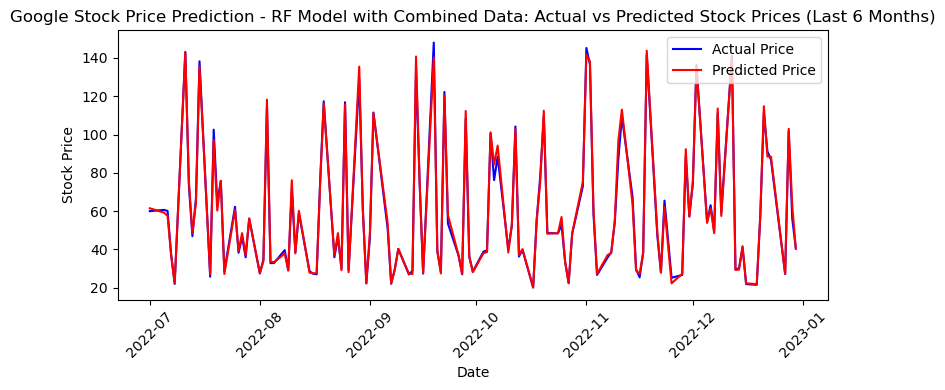

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 2.66%
Prediction Accuracy for last 6 months: 97.34%
Actual price range: $20.06 to $148.05
Predicted price range: $20.09 to $143.79

Sample Actual vs Predicted Values (Test Set):
Date: 2021-04-29, Actual: 26.78, Predicted: 27.10
Date: 2022-11-10, Actual: 86.97, Predicted: 96.66
Date: 2021-02-24, Actual: 70.65, Predicted: 72.84
Date: 2022-01-11, Actual: 34.76, Predicted: 29.35
Date: 2021-01-20, Actual: 35.21, Predicted: 37.49
Date: 2022-08-29, Actual: 129.23, Predicted: 135.47
Date: 2021-05-10, Actual: 54.22, Predicted: 58.38
Date: 2021-04-09, Actual: 142.97, Predicted: 139.57
Date: 2021-02-18, Actual: 59.13, Predicted: 55.66
Date: 2022-10-07, Actual: 88.44, Predicted: 94.19


In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate predictions
test_predictions = best_rf_model.predict(X_test_rf)

# Inverse transform the predictions and actual values
def inverse_transform(data):
    return scaler.inverse_transform(np.hstack((np.zeros((len(data), scaler.n_features_in_-1)), data.reshape(-1, 1))))[:, -1]

y_test_inv = inverse_transform(y_test)
test_predictions_inv = inverse_transform(test_predictions)

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
rf_combined_df = pd.DataFrame({
    'Date': combined_data.index[-len(y_test_inv):],
    'Actual': y_test_inv,
    'Predicted': test_predictions_inv
})
rf_combined_df.set_index('Date', inplace=True)

# Filter the dataframe to include only the months from July to December 2022
rf_combined_filtered = rf_combined_df.loc['2022-07-01':'2022-12-31']

# Plotting the actual vs predicted prices for the specified date range
plt.figure(figsize=(8, 4))  # Rectangular plot
plt.plot(rf_combined_filtered.index, rf_combined_filtered['Actual'], color='blue', label='Actual Price')
plt.plot(rf_combined_filtered.index, rf_combined_filtered['Predicted'], color='red', label='Predicted Price')
plt.title('Google Stock Price Prediction - RF Model with Combined Data: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {rf_combined_filtered.index.min().date()} to {rf_combined_filtered.index.max().date()}")
print(f"Number of trading days: {len(rf_combined_filtered)}")
mape = np.mean(np.abs((rf_combined_filtered['Actual'] - rf_combined_filtered['Predicted']) / rf_combined_filtered['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")
print(f"Actual price range: ${rf_combined_filtered['Actual'].min():.2f} to ${rf_combined_filtered['Actual'].max():.2f}")
print(f"Predicted price range: ${rf_combined_filtered['Predicted'].min():.2f} to ${rf_combined_filtered['Predicted'].max():.2f}")

# Print some sample actual vs predicted values
print("\nSample Actual vs Predicted Values (Test Set):")
sample_size = min(10, len(y_test_inv))
sample_indices = np.random.choice(len(y_test_inv), sample_size, replace=False)
sample_dates = rf_combined_df.index[sample_indices]
sample_actual = y_test_inv[sample_indices]
sample_predicted = test_predictions_inv[sample_indices]

for date, actual, predicted in zip(sample_dates, sample_actual, sample_predicted):
    print(f"Date: {date.date()}, Actual: {actual:.2f}, Predicted: {predicted:.2f}")


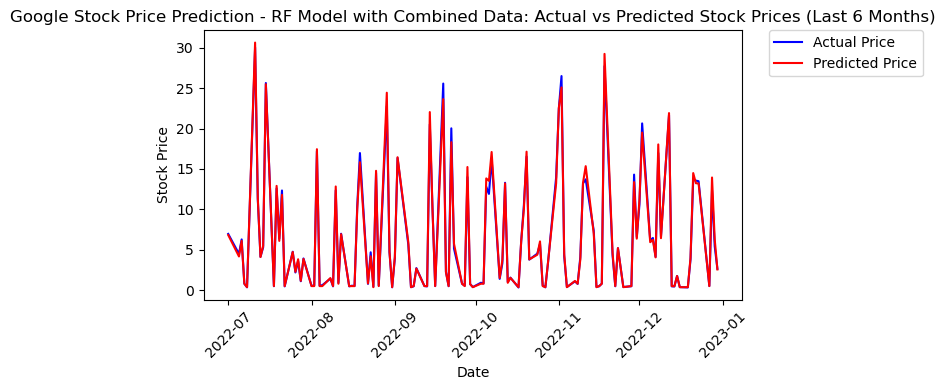

In [106]:
# Plotting the actual vs predicted prices for the specified date range
plt.figure(figsize=(8, 4))  # Rectangular plot
plt.plot(rf_combined_filtered.index, rf_combined_filtered['Actual'], color='blue', label='Actual Price')
plt.plot(rf_combined_filtered.index, rf_combined_filtered['Predicted'], color='red', label='Predicted Price')
plt.title('Google Stock Price Prediction - RF Model with Combined Data: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Adjust the legend to be outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


#  Google Combined Data-Hybrid Model:Building and training of  the  Model 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint, uniform

print("Starting data preparation...")
# Data Preparation
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])
    y.append(scaled_data[i, -1])

X, y = np.array(X), np.array(y)
X_lstm = X
X_rf = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_lstm, X_test_lstm = X_train, X_test
X_train_rf, X_test_rf = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

print("Data preparation completed.")

print("Building and training LSTM model...")
# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

print("LSTM model training completed.")

print("Building and training Random Forest model...")
# Random Forest Model
param_dist = {
    'n_estimators':[10, 20],
    'max_depth': [3, 5],
    'min_samples_split':[10, 15],
    'min_samples_leaf': [10, 15],
    'max_features': [1, 'sqrt',],
    'bootstrap': [True]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_rf, y_train)
best_rf_model = random_search.best_estimator_

print("Random Forest model training completed.")

print("Making predictions...")
# Predictions
lstm_train_pred = model_lstm.predict(X_train_lstm, verbose=0).flatten()
lstm_test_pred = model_lstm.predict(X_test_lstm, verbose=0).flatten()

rf_train_pred = best_rf_model.predict(X_train_rf)
rf_test_pred = best_rf_model.predict(X_test_rf)

# Hybrid Model (weighted average)
def hybrid_predict(lstm_pred, rf_pred, alpha=0.6):
    return alpha * lstm_pred + (1 - alpha) * rf_pred

hybrid_train_pred = hybrid_predict(lstm_train_pred, rf_train_pred)
hybrid_test_pred = hybrid_predict(lstm_test_pred, rf_test_pred)

# Inverse transform
def inverse_transform(data):
    return scaler.inverse_transform(np.column_stack([np.zeros((len(data), len(features))), data.reshape(-1, 1)]))[:, -1]

y_train_inv = inverse_transform(y_train)
y_test_inv = inverse_transform(y_test)
hybrid_train_pred_inv = inverse_transform(hybrid_train_pred)
hybrid_test_pred_inv = inverse_transform(hybrid_test_pred)



Starting data preparation...
Data preparation completed.
Building and training LSTM model...
Epoch 1/20
56/56 [==============================] - 6s 48ms/step - loss: 0.0065 - val_loss: 5.2472e-04
Epoch 2/20
56/56 [==============================] - 2s 31ms/step - loss: 5.0930e-04 - val_loss: 4.6033e-04
Epoch 3/20
56/56 [==============================] - 2s 34ms/step - loss: 4.9117e-04 - val_loss: 5.2443e-04
Epoch 4/20
56/56 [==============================] - 2s 31ms/step - loss: 5.4259e-04 - val_loss: 4.2052e-04
Epoch 5/20
56/56 [==============================] - 2s 31ms/step - loss: 4.9393e-04 - val_loss: 4.2674e-04
Epoch 6/20
56/56 [==============================] - 2s 32ms/step - loss: 4.8304e-04 - val_loss: 3.6936e-04
Epoch 7/20
56/56 [==============================] - 2s 32ms/step - loss: 4.4147e-04 - val_loss: 3.6029e-04
Epoch 8/20
56/56 [==============================] - 2s 33ms/step - loss: 4.3350e-04 - val_loss: 3.4081e-04
Epoch 9/20
56/56 [==============================] - 2s 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest model training completed.
Making predictions...


In [ ]:
# Evaluation of the Hybrid Mode using Combined Google dataset

In [223]:

# Evaluate Hybrid Model
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Googel Combined Data Hybrid Model  - {set_name} Set Metrics:")
    print(f"Google Combined Data Hybrid Model  - Mean Squared Error (MSE): {mse}")
    print(f"Google Combined  Data Hybrid Model  - Root Mean Squared Error (RMSE): {rmse}")
    print(f"Google Combined Data Hybrid Model  - Mean Absolute Error (MAE): {mae}")
    print(f"Google Combined Data Hybrid Model  - R-squared (R²): {r2}\n")

print("Evaluating model...")
evaluate_model(y_train_inv, hybrid_train_pred_inv, "Training")
evaluate_model(y_test_inv, hybrid_test_pred_inv, "Testing")

print("Model evaluation completed.")

Evaluating model...
Googel Combined Data Hybrid Model  - Training Set Metrics:
Google Combined Data Hybrid Model  - Mean Squared Error (MSE): 1.4432532694056872
Google Combined  Data Hybrid Model  - Root Mean Squared Error (RMSE): 1.2013547641748823
Google Combined Data Hybrid Model  - Mean Absolute Error (MAE): 0.7527965537151758
Google Combined Data Hybrid Model  - R-squared (R²): 0.9987901326571708

Googel Combined Data Hybrid Model  - Testing Set Metrics:
Google Combined Data Hybrid Model  - Mean Squared Error (MSE): 3.579171931723892
Google Combined  Data Hybrid Model  - Root Mean Squared Error (RMSE): 1.8918699563458086
Google Combined Data Hybrid Model  - Mean Absolute Error (MAE): 1.1874462319023726
Google Combined Data Hybrid Model  - R-squared (R²): 0.9969346226873678

Model evaluation completed.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint, uniform

print("Starting data preparation...")
# Data Preparation
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])
    y.append(scaled_data[i, -1])

X, y = np.array(X), np.array(y)
X_lstm = X
X_rf = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_lstm, X_test_lstm = X_train, X_test
X_train_rf, X_test_rf = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

print("Data preparation completed.")

print("Building and training LSTM model...")
# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

print("LSTM model training completed.")

print("Building and training Random Forest model...")
# Random Forest Model
param_dist = {
    'n_estimators':[10, 20],
    'max_depth': [3, 5],
    'min_samples_split':[10, 15],
    'min_samples_leaf': [10, 15],
    'max_features': [1, 'sqrt',],
    'bootstrap': [True]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_rf, y_train)
best_rf_model = random_search.best_estimator_

print("Random Forest model training completed.")

print("Making predictions...")
# Predictions
lstm_train_pred = model_lstm.predict(X_train_lstm, verbose=0).flatten()
lstm_test_pred = model_lstm.predict(X_test_lstm, verbose=0).flatten()

rf_train_pred = best_rf_model.predict(X_train_rf)
rf_test_pred = best_rf_model.predict(X_test_rf)

# Hybrid Model (weighted average)
def hybrid_predict(lstm_pred, rf_pred, alpha=0.6):
    return alpha * lstm_pred + (1 - alpha) * rf_pred

hybrid_train_pred = hybrid_predict(lstm_train_pred, rf_train_pred)
hybrid_test_pred = hybrid_predict(lstm_test_pred, rf_test_pred)

# Inverse transform
def inverse_transform(data):
    return scaler.inverse_transform(np.column_stack([np.zeros((len(data), len(features))), data.reshape(-1, 1)]))[:, -1]

y_train_inv = inverse_transform(y_train)
y_test_inv = inverse_transform(y_test)
hybrid_train_pred_inv = inverse_transform(hybrid_train_pred)
hybrid_test_pred_inv = inverse_transform(hybrid_test_pred)



Starting data preparation...
Data preparation completed.
Building and training LSTM model...
Epoch 1/20
56/56 [==============================] - 10s 92ms/step - loss: 0.0194 - val_loss: 5.3112e-04
Epoch 2/20
56/56 [==============================] - 4s 66ms/step - loss: 6.2559e-04 - val_loss: 4.8786e-04
Epoch 3/20
56/56 [==============================] - 4s 65ms/step - loss: 5.9210e-04 - val_loss: 4.2385e-04
Epoch 4/20
56/56 [==============================] - 4s 64ms/step - loss: 5.2865e-04 - val_loss: 3.9764e-04
Epoch 5/20
56/56 [==============================] - 4s 66ms/step - loss: 4.9888e-04 - val_loss: 4.4028e-04
Epoch 6/20
56/56 [==============================] - 4s 73ms/step - loss: 4.9237e-04 - val_loss: 4.0144e-04
Epoch 7/20
56/56 [==============================] - 4s 64ms/step - loss: 4.7596e-04 - val_loss: 3.7175e-04
Epoch 8/20
56/56 [==============================] - 4s 68ms/step - loss: 4.8633e-04 - val_loss: 3.7299e-04
Epoch 9/20
56/56 [==============================] - 4s

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest model training completed.
Making predictions...


In [18]:

# Evaluate Hybrid Model
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Googel Combined Data Hybrid Model  - {set_name} Set Metrics:")
    print(f"Google Combined Data Hybrid Model  - Mean Squared Error (MSE): {mse}")
    print(f"Google Combined  Data Hybrid Model  - Root Mean Squared Error (RMSE): {rmse}")
    print(f"Google Combined Data Hybrid Model  - Mean Absolute Error (MAE): {mae}")
    print(f"Google Combined Data Hybrid Model  - R-squared (R²): {r2}\n")

print("Evaluating model...")
evaluate_model(y_train_inv, hybrid_train_pred_inv, "Training")
evaluate_model(y_test_inv, hybrid_test_pred_inv, "Testing")

print("Model evaluation completed.")

Evaluating model...
Googel Combined Data Hybrid Model  - Training Set Metrics:
Google Combined Data Hybrid Model  - Mean Squared Error (MSE): 4.415601529719385
Google Combined  Data Hybrid Model  - Root Mean Squared Error (RMSE): 2.1013332743092863
Google Combined Data Hybrid Model  - Mean Absolute Error (MAE): 1.3977190207257613
Google Combined Data Hybrid Model  - R-squared (R²): 0.9962984375625532

Googel Combined Data Hybrid Model  - Testing Set Metrics:
Google Combined Data Hybrid Model  - Mean Squared Error (MSE): 5.905548825633248
Google Combined  Data Hybrid Model  - Root Mean Squared Error (RMSE): 2.430133499549613
Google Combined Data Hybrid Model  - Mean Absolute Error (MAE): 1.6168024350542944
Google Combined Data Hybrid Model  - R-squared (R²): 0.9949422001138629

Model evaluation completed.


In [ ]:
# Google Combined Data Hybrid model - Actual Vs Predicted stock price values

Predictions completed.


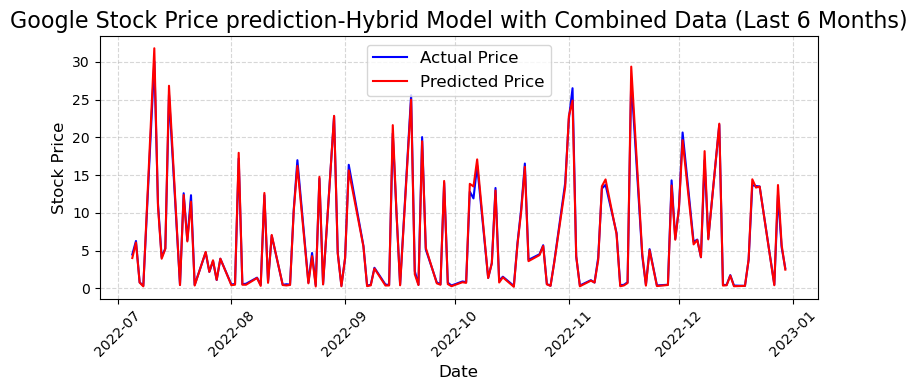


Sample Actual vs Predicted Values (Last 6 Months):
Date: 2022-09-28, Actual: 13.99, Predicted: 14.22
Date: 2022-08-05, Actual: 0.62, Predicted: 0.49
Date: 2022-10-17, Actual: 0.34, Predicted: 0.22
Date: 2022-08-26, Actual: 0.57, Predicted: 0.52
Date: 2022-08-10, Actual: 12.35, Predicted: 12.63
Date: 2022-07-20, Actual: 6.37, Predicted: 6.22
Date: 2022-07-15, Actual: 25.63, Predicted: 26.82
Date: 2022-10-13, Actual: 1.02, Predicted: 0.78
Date: 2022-07-25, Actual: 4.76, Predicted: 4.84
Date: 2022-07-28, Actual: 1.11, Predicted: 1.13

Hybrid Model Evaluation Metrics (Last 6 Months):
Mean Squared Error (MSE): 0.2175
Root Mean Squared Error (RMSE): 0.4664
Mean Absolute Error (MAE): 0.2782
R-squared (R²): 0.9960
Mean Absolute Percentage Error (MAPE): 8.67%
Prediction Accuracy: 91.33%

Date range shown: from 2022-07-05 to 2022-12-30
Number of data points: 126


In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import timedelta

print("Predictions completed.")

# Get the dates for the test set
test_dates = combined_data.index[-len(y_test_inv):]

# Calculate the start date for the last 6 months of the test set
start_date = test_dates[-1] - timedelta(days=180)

# Create a mask for the last 6 months of the test set
mask = test_dates >= start_date

# Filter the data for the last 6 months
dates_6m = test_dates[mask]
actual_6m = y_test_inv[mask]
predicted_6m = hybrid_test_pred_inv[mask]

# Plot actual vs predicted for the last 6 months
plt.figure(figsize=(8, 4))
plt.plot(dates_6m, actual_6m, label='Actual Price', color='blue')
plt.plot(dates_6m, predicted_6m, label='Predicted Price', color='red')
plt.title('Google Stock Price prediction-Hybrid Model with Combined Data (Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print some sample actual vs predicted values
print("\nSample Actual vs Predicted Values (Last 6 Months):")
sample_size = min(10, len(actual_6m))
sample_indices = np.random.choice(len(actual_6m), sample_size, replace=False)
sample_dates = dates_6m[sample_indices]
sample_actual = actual_6m[sample_indices]
sample_predicted = predicted_6m[sample_indices]
for date, actual, predicted in zip(sample_dates, sample_actual, sample_predicted):
    print(f"Date: {date.date()}, Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Calculate evaluation metrics for the hybrid model (last 6 months)
mse = mean_squared_error(actual_6m, predicted_6m)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_6m, predicted_6m)
r2 = r2_score(actual_6m, predicted_6m)
mape = np.mean(np.abs((actual_6m - predicted_6m) / actual_6m)) * 100
accuracy = 100 - mape

print("\nHybrid Model Evaluation Metrics (Last 6 Months):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

print(f"\nDate range shown: from {dates_6m[0].date()} to {dates_6m[-1].date()}")
print(f"Number of data points: {len(dates_6m)}")

# META(FACE BOOK) STOCK DATA PREDICTIONS

In [47]:
import yfinance as yf
import pandas as pd

# Fetch 10 years of META stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Check if data was fetched successfully and display head
print("META Stock Data:")
print(meta_data.head())



C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

META Stock Data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  27.440001  28.180000  27.420000  28.000000  27.942581  69846400
2013-01-03  27.879999  28.469999  27.590000  27.770000  27.713053  63140600
2013-01-04  28.010000  28.930000  27.830000  28.760000  28.701021  72715400
2013-01-07  28.690001  29.790001  28.650000  29.420000  29.359669  83781800
2013-01-08  29.510000  29.600000  28.860001  29.059999  29.000406  45871300


In [2]:
meta_data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-02   27.440001   28.180000   27.420000   28.000000   27.942581   
2013-01-03   27.879999   28.469999   27.590000   27.770000   27.713053   
2013-01-04   28.010000   28.930000   27.830000   28.760000   28.701021   
2013-01-07   28.690001   29.790001   28.650000   29.420000   29.359669   
2013-01-08   29.510000   29.600000   28.860001   29.059999   29.000406   
...                ...         ...         ...         ...         ...   
2022-12-23  116.029999  118.180000  115.540001  118.040001  117.797935   
2022-12-27  117.930000  118.599998  116.050003  116.879997  116.640312   
2022-12-28  116.250000  118.150002  115.510002  115.620003  115.382896   
2022-12-29  116.400002  121.029999  115.769997  120.260002  120.013382   
2022-12-30  118.160004  120.419998  117.739998  120.339996  120.093208   

              Volume  
Date                  
2013-01-02  69846400  
2013-01-03  63140600  
2013-01-04  72715400  
2013-01-07  83781800  
2013-01-08  45871300  
...              ...  
2022-12-23  17796600  
2022-12-27  21392300  
2022-12-28  19612500  
2022-12-29  22366200  
2022-12-30  19583800  

[2518 rows x 6 columns]

# Exploratory Data Aanalysis and Visualization

In [32]:
# Display Basic information about the dataset

In [120]:

# Display basic information about the dataset
print("\nDataset Information:")
print(nvidia_data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(meta_data.describe())

# Check for any missing values
print("\nMissing Values:")
print(meta_data.isnull().sum())





Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB
None

Summary Statistics:
              Open         High          Low        Close    Adj Close        Volume
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000  2.518000e+03
mean    155.543153   157.505195   153.590921   155.583022   155.263965  2.975921e+07
std      83.883226    84.948737    82.845624    83.901712    83.729653  2.363724e+07
min      22.990000    23.090000    22.670000    22.900000    22.853037  5.913100e+06
25%      86.740002    87.714998

In [35]:
# Check for null values
null_counts = meta_data.isnull().sum()
print("Null value counts:")
print(null_counts)

Null value counts:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


# Visualize META STock Data Price movement

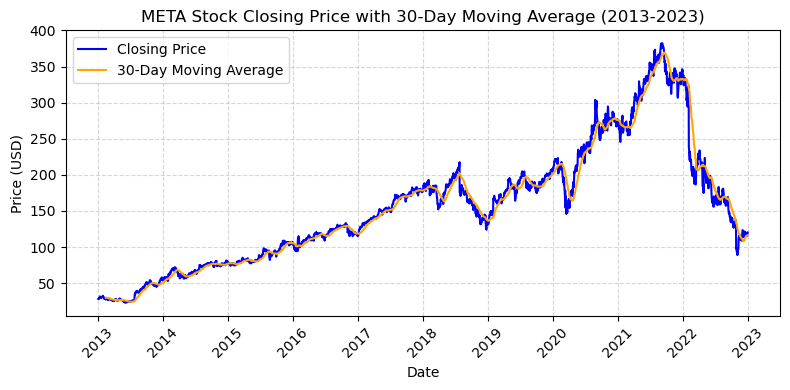

In [59]:
import matplotlib.pyplot as plt

# Calculate the 30-day moving average of the closing price
meta_data['30-Day MA'] = meta_data['Close'].rolling(window=30).mean()

# Plot the closing price and 30-day moving average
plt.figure(figsize=(8, 4))
plt.plot(meta_data.index, meta_data['Close'], color='blue', label='Closing Price')
plt.plot(meta_data.index, meta_data['30-Day MA'], color='orange', label='30-Day Moving Average')
plt.title('META Stock Closing Price with 30-Day Moving Average (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# META Stock Daily Returns Analysis

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


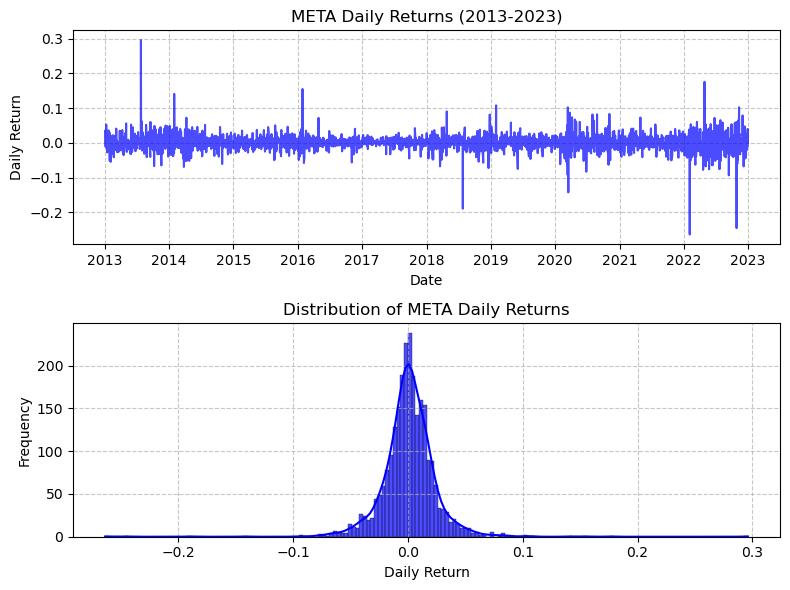

Daily Returns Statistics:
count    2517.000000
mean        0.000870
std         0.024007
min        -0.263901
25%        -0.009683
50%         0.001031
75%         0.012462
max         0.296115
Name: Daily_Return, dtype: float64

Additional Metrics:
Annualized Volatility: 0.3811
Skewness: -0.1318
Kurtosis: 24.0033

Proportion of positive returns: 0.5250
Proportion of negative returns: 0.4718

Highest daily return: 0.2961
Lowest daily return: -0.2639


In [54]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch 10 years of META stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Calculate daily returns
meta_data['Daily_Return'] = meta_data['Close'].pct_change()

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot 1: Daily Returns over time
ax1.plot(meta_data.index, meta_data['Daily_Return'], color='blue', alpha=0.7)
ax1.set_title('META Daily Returns (2013-2023)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Return')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Distribution of Daily Returns
sns.histplot(meta_data['Daily_Return'].dropna(), kde=True, ax=ax2, color='blue', alpha=0.7)
ax2.set_title('Distribution of META Daily Returns')
ax2.set_xlabel('Daily Return')
ax2.set_ylabel('Frequency')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Calculate and print statistics
print("Daily Returns Statistics:")
print(meta_data['Daily_Return'].describe())

print("\nAdditional Metrics:")
print(f"Annualized Volatility: {meta_data['Daily_Return'].std() * np.sqrt(252):.4f}")
print(f"Skewness: {meta_data['Daily_Return'].skew():.4f}")
print(f"Kurtosis: {meta_data['Daily_Return'].kurtosis():.4f}")

# Calculate and print the proportion of positive and negative returns
positive_returns = (meta_data['Daily_Return'] > 0).sum() / len(meta_data['Daily_Return'])
negative_returns = (meta_data['Daily_Return'] < 0).sum() / len(meta_data['Daily_Return'])

print(f"\nProportion of positive returns: {positive_returns:.4f}")
print(f"Proportion of negative returns: {negative_returns:.4f}")

# Calculate and print the highest and lowest daily returns
highest_return = meta_data['Daily_Return'].max()
lowest_return = meta_data['Daily_Return'].min()

print(f"\nHighest daily return: {highest_return:.4f}")
print(f"Lowest daily return: {lowest_return:.4f}")

# META Stock Price and Volume Correlation Analysis

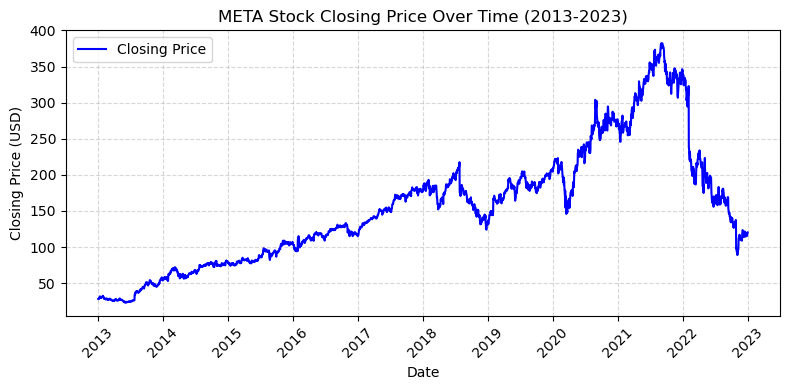

In [49]:

import matplotlib.pyplot as plt


# Plot the closing price over time
plt.figure(figsize=(8, 4))
plt.plot(meta_data.index, meta_data['Close'], color='blue', label='Closing Price')
plt.title('META Stock Closing Price Over Time (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


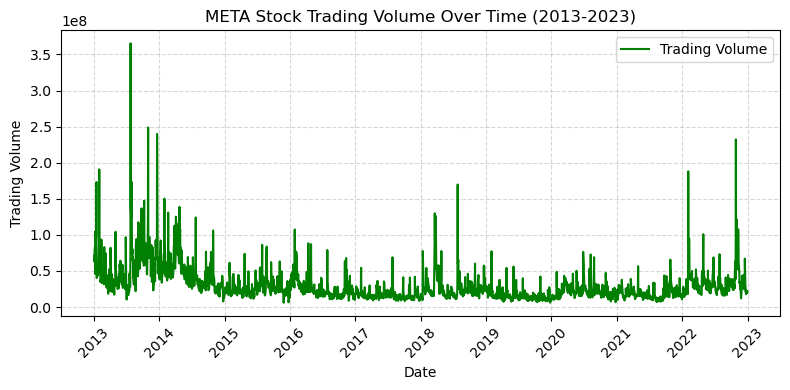

In [51]:

# Plot the trading volume over time
plt.figure(figsize=(8, 4))
plt.plot(meta_data.index, meta_data['Volume'], color='green', label='Trading Volume')
plt.title('META Stock Trading Volume Over Time (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


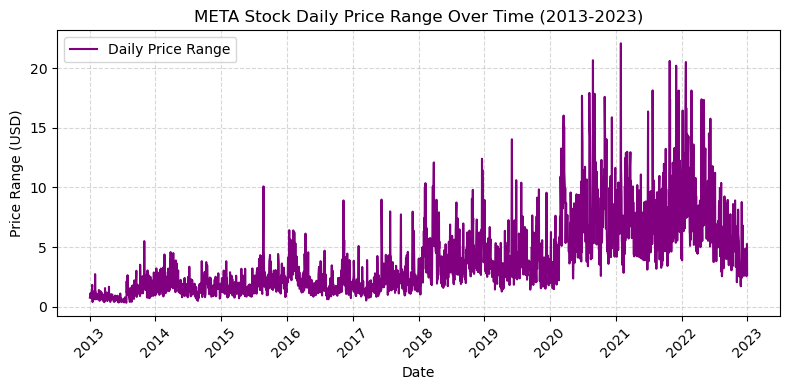

In [53]:
import matplotlib.pyplot as plt

# Calculate the daily price range
meta_data['Price Range'] = meta_data['High'] - meta_data['Low']

# Plot the daily price range over time
plt.figure(figsize=(8, 4))
plt.plot(meta_data.index, meta_data['Price Range'], color='purple', label='Daily Price Range')
plt.title('META Stock Daily Price Range Over Time (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Price Range (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


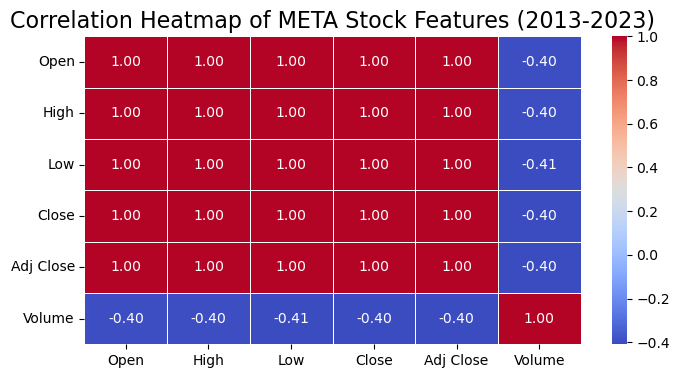

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = meta_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of META Stock Features (2013-2023)', fontsize=16)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


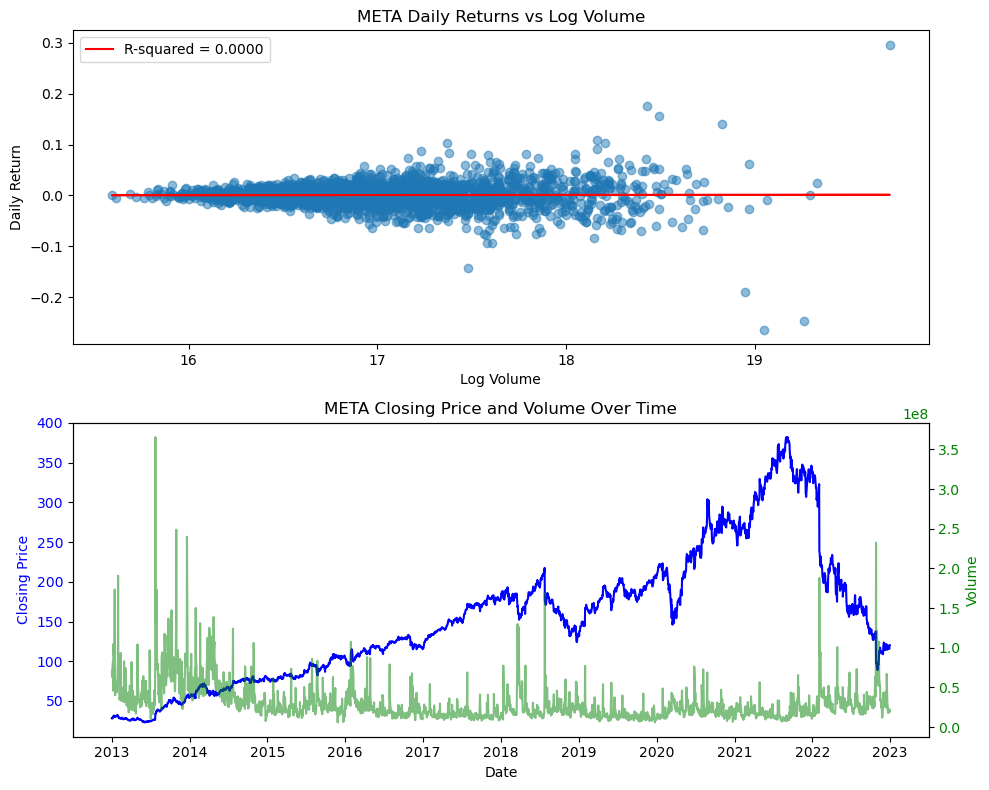

Correlation Matrix:
                 Close    Volume  Daily_Return  Log_Volume
Close         1.000000 -0.403263     -0.004710   -0.477205
Volume       -0.403263  1.000000      0.022448    0.894975
Daily_Return -0.004710  0.022448      1.000000    0.003799
Log_Volume   -0.477205  0.894975      0.003799    1.000000

Additional Statistics:
Correlation between Daily Returns and Volume: 0.0224
Correlation between Daily Returns and Log Volume: 0.0038
Correlation between Closing Price and Volume: -0.4033

Pearson Correlation Test (Daily Returns vs Log Volume):
Correlation Coefficient: 0.0038
P-value: 0.8489

Number of data points used in the analysis: 2517


In [42]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Fetch 10 years of META stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Calculate daily returns and log volume
meta_data['Daily_Return'] = meta_data['Close'].pct_change()
meta_data['Log_Volume'] = np.log(meta_data['Volume'])

# Remove any rows with NaN values
meta_data_clean = meta_data.dropna()

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot 1: Scatter plot of Daily Returns vs Log Volume
ax1.scatter(meta_data_clean['Log_Volume'], meta_data_clean['Daily_Return'], alpha=0.5)
ax1.set_title('META Daily Returns vs Log Volume')
ax1.set_xlabel('Log Volume')
ax1.set_ylabel('Daily Return')

# Calculate and plot the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(meta_data_clean['Log_Volume'], meta_data_clean['Daily_Return'])
line = slope * meta_data_clean['Log_Volume'] + intercept
ax1.plot(meta_data_clean['Log_Volume'], line, color='red', label=f'R-squared = {r_value**2:.4f}')
ax1.legend()

# Plot 2: Volume and Closing Price over time
ax2.set_title('META Closing Price and Volume Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Closing Price', color='blue')
ax2.plot(meta_data.index, meta_data['Close'], color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax2.twinx()
ax3.set_ylabel('Volume', color='green')
ax3.plot(meta_data.index, meta_data['Volume'], color='green', alpha=0.5)
ax3.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()

# Calculate correlations
correlation_matrix = meta_data_clean[['Close', 'Volume', 'Daily_Return', 'Log_Volume']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Calculate and print additional statistics
print("\nAdditional Statistics:")
print(f"Correlation between Daily Returns and Volume: {correlation_matrix.loc['Daily_Return', 'Volume']:.4f}")
print(f"Correlation between Daily Returns and Log Volume: {correlation_matrix.loc['Daily_Return', 'Log_Volume']:.4f}")
print(f"Correlation between Closing Price and Volume: {correlation_matrix.loc['Close', 'Volume']:.4f}")

# Perform a statistical test for the correlation between Daily Returns and Log Volume
correlation_coefficient, p_value = stats.pearsonr(meta_data_clean['Daily_Return'], meta_data_clean['Log_Volume'])
print(f"\nPearson Correlation Test (Daily Returns vs Log Volume):")
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Print the number of data points used in the analysis
print(f"\nNumber of data points used in the analysis: {len(meta_data_clean)}")

# META Stock Volatility Analysis with Year Labels

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


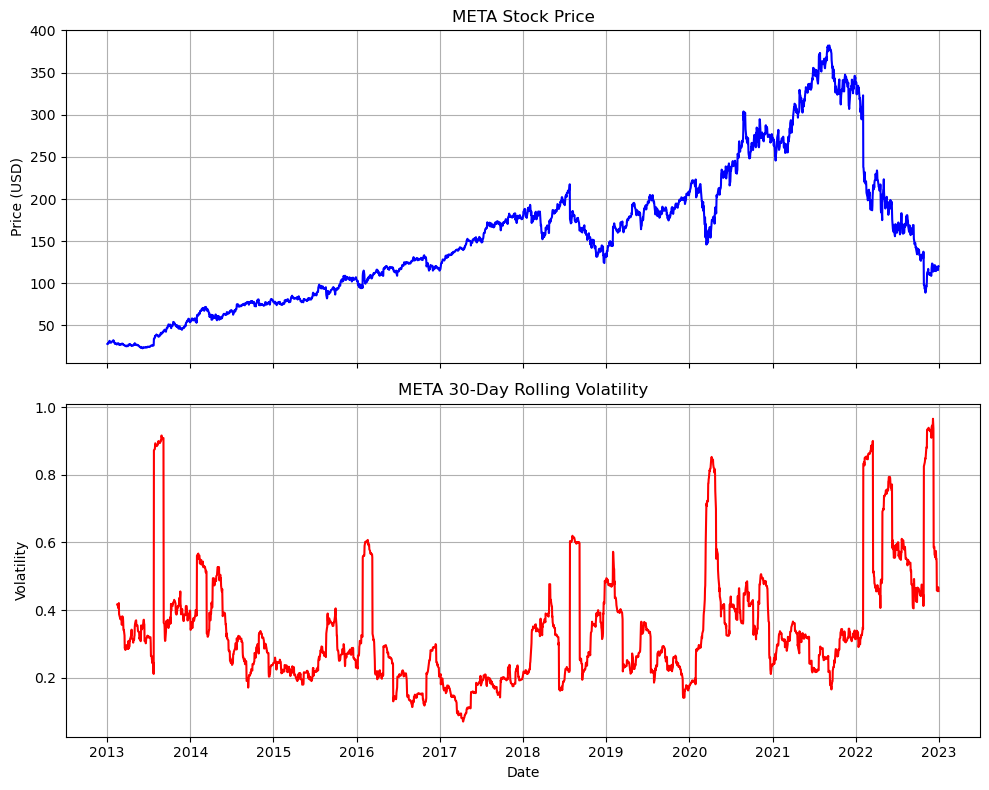

Volatility Statistics:
count    2488.000000
mean        0.340638
std         0.171376
min         0.070253
25%         0.221708
50%         0.303442
75%         0.397463
max         0.965627
Name: Volatility, dtype: float64

Periods of Highest Volatility:
Date
2022-12-06    0.965627
2022-12-07    0.947397
2022-12-02    0.945686
2022-12-05    0.945415
2022-12-01    0.943192
Name: Volatility, dtype: float64

Periods of Lowest Volatility:
Date
2017-04-13    0.070253
2017-04-12    0.071798
2017-04-10    0.079523
2017-04-06    0.080532
2017-04-17    0.080821
Name: Volatility, dtype: float64

Average Yearly Volatility:
Date
2013-12-31    0.426710
2014-12-31    0.349051
2015-12-31    0.254108
2016-12-31    0.256165
2017-12-31    0.166657
2018-12-31    0.341654
2019-12-31    0.290105
2020-12-31    0.429128
2021-12-31    0.290050
2022-12-31    0.613045
Freq: YE-DEC, Name: Volatility, dtype: float64

Current Volatility (last 30 trading days): 0.4561
Current volatility compared to historical aver

C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_8328\4136886980.py:49: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_volatility = meta_data['Volatility'].resample('Y').mean()


In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch 10 years of META stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Calculate daily returns
meta_data['Daily_Return'] = meta_data['Close'].pct_change()

# Calculate historical volatility (30-day rolling window)
meta_data['Volatility'] = meta_data['Daily_Return'].rolling(window=30).std() * np.sqrt(252)

# Plot the stock price and volatility
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot 1: Stock Price
ax1.plot(meta_data.index, meta_data['Close'], color='blue')
ax1.set_title('META Stock Price')
ax1.set_ylabel('Price (USD)')
ax1.grid(True)

# Plot 2: Volatility
ax2.plot(meta_data.index, meta_data['Volatility'], color='red')
ax2.set_title('META 30-Day Rolling Volatility')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print volatility statistics
print("Volatility Statistics:")
print(meta_data['Volatility'].describe())

# Find periods of highest and lowest volatility
highest_volatility = meta_data['Volatility'].nlargest(5)
lowest_volatility = meta_data['Volatility'].nsmallest(5)

print("\nPeriods of Highest Volatility:")
print(highest_volatility)

print("\nPeriods of Lowest Volatility:")
print(lowest_volatility)

# Calculate average volatility for each year
yearly_volatility = meta_data['Volatility'].resample('Y').mean()
print("\nAverage Yearly Volatility:")
print(yearly_volatility)

# Calculate current volatility (last 30 trading days)
current_volatility = meta_data['Volatility'].iloc[-1]
print(f"\nCurrent Volatility (last 30 trading days): {current_volatility:.4f}")

# Compare current volatility to historical average
historical_avg_volatility = meta_data['Volatility'].mean()
volatility_ratio = current_volatility / historical_avg_volatility
print(f"Current volatility compared to historical average: {volatility_ratio:.2f}x")

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


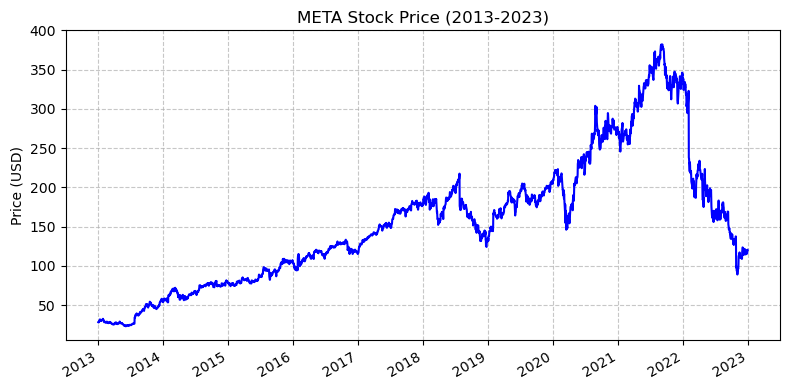

Starting price: $28.00
Ending price: $120.34
Highest price: $384.33
Lowest price: $22.67
Total return: 329.79%


In [47]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Fetch 10 years of META stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Create the plot
plt.figure(figsize=(8, 4))

# Plot closing price
plt.plot(meta_data.index, meta_data['Close'], color='blue')

# Customize the plot
plt.title('META Stock Price (2013-2023)')
plt.ylabel('Price (USD)')

# Set x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print some key statistics
print(f"Starting price: ${meta_data['Close'].iloc[0]:.2f}")
print(f"Ending price: ${meta_data['Close'].iloc[-1]:.2f}")
print(f"Highest price: ${meta_data['High'].max():.2f}")
print(f"Lowest price: ${meta_data['Low'].min():.2f}")
print(f"Total return: {((meta_data['Close'].iloc[-1] / meta_data['Close'].iloc[0]) - 1) * 100:.2f}%")

# META Stock Data LSTM Model Development

In [49]:
# META Stock LSTM Model - Data Preparation

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf

# Step 1: Load the stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Step 2: Feature Selection and Target Variable Creation
# Select the 'Close' price as the feature and create the target variable
data = meta_data[['Close']]
# Create a target variable, which is the next day's close price
data['Target'] = data['Close'].shift(-1)
# Drop the last row with NaN target due to the shift operation
data.dropna(inplace=True)

# Step 3: Data Scaling and Preparation for LSTM
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale the 'Close' prices and 'Target'
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape X to fit the LSTM input shape
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the prepared data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

X_train shape: (1965, 60, 1)
y_train shape: (1965,)
X_test shape: (492, 60, 1)
y_test shape: (492,)



C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\320588137.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\320588137.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [51]:
# META Stock LSTM Model - Building and Training

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM Model
model = Sequential()

# Adding the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=25))  # Additional Dense layer

# Adding the second LSTM layer
model.add(LSTM(units=50, return_sequences=False))

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Display the model summary
model.summary()





Epoch 1/20

62/62 [==============================] - 7s 45ms/step - loss: 0.0130 - val_loss: 0.0012
Epoch 2/20
62/62 [==============================] - 2s 33ms/step - loss: 7.3973e-04 - val_loss: 0.0010
Epoch 3/20
62/62 [==============================] - 2s 33ms/step - loss: 6.6933e-04 - val_loss: 7.2751e-04
Epoch 4/20
62/62 [==============================] - 2s 32ms/step - loss: 6.2688e-04 - val_loss: 6.8332e-04
Epoch 5/20
62/62 [==============================] - 2s 33ms/step - loss: 6.0738e-04 - val_loss: 6.4621e-04
Epoch 6/20
62/62 [==============================] - 2s 32ms/step - loss: 6.2446e-04 - val_loss: 6.2931e-04
Epoch 7/20
62/62 [==============================] - 2s 32ms/step - loss: 5.6641e-04 - val_loss: 6.4664e-04
Epoch 8/20
62/62 [==============================] - 2s 32ms/step - loss: 5.7798e-04 - val_loss: 5.9945e-04
Epoch 9/20
62/62 [==============================] - 2s 32ms/step - loss: 5.7950e-04 - val_loss: 5.8826e-04
Epoch 10/20
62/62 [==========================

In [54]:
# Model evaluation and predictions

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
lstm_train_predictions = model.predict(X_train)
lstm_train_predictions = scaler.inverse_transform(np.hstack((lstm_train_predictions, lstm_train_predictions)))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Predict on the testing set
lstm_test_predictions = model.predict(X_test)
lstm_test_predictions = scaler.inverse_transform(np.hstack((lstm_test_predictions, lstm_test_predictions)))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for the training data
lstm_mse_train = mean_squared_error(real_stock_price_train, lstm_train_predictions)
lstm_rmse_train = np.sqrt(lstm_mse_train)
lstm_mae_train = mean_absolute_error(real_stock_price_train, lstm_train_predictions)
lstm_r2_train = r2_score(real_stock_price_train, lstm_train_predictions)

# Calculate evaluation metrics for the testing data
lstm_mse_test = mean_squared_error(real_stock_price_test, lstm_test_predictions)
lstm_rmse_test = np.sqrt(lstm_mse_test)
lstm_mae_test = mean_absolute_error(real_stock_price_test, lstm_test_predictions)
lstm_r2_test = r2_score(real_stock_price_test, lstm_test_predictions)

# Print LSTM Model Metrics
print("LSTM Model META Stock Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {lstm_mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {lstm_mae_train:.4f}")
print(f"R-squared (R²): {lstm_r2_train:.4f}\n")

print("LSTM Model META Stock Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {lstm_mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {lstm_mae_test:.4f}")
print(f"R-squared (R²): {lstm_r2_test:.4f}\n")

# Calculate additional metrics
lstm_mape_test = np.mean(np.abs((real_stock_price_test - lstm_test_predictions) / real_stock_price_test)) * 100
lstm_accuracy = 100 - lstm_mape_test

print("Additional LSTM Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {lstm_mape_test:.2f}%")
print(f"Prediction Accuracy: {lstm_accuracy:.2f}%")

# Compare the last actual price with the next day's prediction
last_sequence = X_test[-1].reshape(1, X_test.shape[1], 1)
next_day_prediction = model.predict(last_sequence)
next_day_prediction = scaler.inverse_transform(np.hstack((next_day_prediction, next_day_prediction)))[:, 0][0]

print(f"\nLast Actual META Stock Price: ${real_stock_price_test[-1]:.2f}")
print(f"Next Day Prediction: ${next_day_prediction:.2f}")

16/16 [==============================] - 0s 13ms/step
LSTM Model META Stock Data - Training Set Metrics:
Mean Squared Error (MSE): 55.3959
Root Mean Squared Error (RMSE): 7.4428
Mean Absolute Error (MAE): 4.6469
R-squared (R²): 0.9919

LSTM Model META Stock Data - Testing Set Metrics:
Mean Squared Error (MSE): 70.1212
Root Mean Squared Error (RMSE): 8.3738
Mean Absolute Error (MAE): 5.1151
R-squared (R²): 0.9895

Additional LSTM Metrics:
Mean Absolute Percentage Error (MAPE): 3.23%
Prediction Accuracy: 96.77%
1/1 [==============================] - 0s 27ms/step

Last Actual META Stock Price: $119.04
Next Day Prediction: $120.83


In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
lstm_train_predictions = model.predict(X_train)
lstm_train_predictions = scaler.inverse_transform(np.hstack((lstm_train_predictions, lstm_train_predictions)))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Predict on the testing set
lstm_test_predictions = model.predict(X_test)
lstm_test_predictions = scaler.inverse_transform(np.hstack((lstm_test_predictions, lstm_test_predictions)))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for the training data
lstm_mse_train = mean_squared_error(real_stock_price_train, lstm_train_predictions)
lstm_rmse_train = np.sqrt(lstm_mse_train)
lstm_mae_train = mean_absolute_error(real_stock_price_train, lstm_train_predictions)
lstm_r2_train = r2_score(real_stock_price_train, lstm_train_predictions)

# Calculate evaluation metrics for the testing data
lstm_mse_test = mean_squared_error(real_stock_price_test, lstm_test_predictions)
lstm_rmse_test = np.sqrt(lstm_mse_test)
lstm_mae_test = mean_absolute_error(real_stock_price_test, lstm_test_predictions)
lstm_r2_test = r2_score(real_stock_price_test, lstm_test_predictions)

# Print LSTM Model Metrics
print("LSTM Model META Stock Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {lstm_mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {lstm_mae_train:.4f}")
print(f"R-squared (R²): {lstm_r2_train:.4f}\n")

print("LSTM Model META Stock Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {lstm_mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {lstm_mae_test:.4f}")
print(f"R-squared (R²): {lstm_r2_test:.4f}\n")

# Calculate additional metrics
lstm_mape_test = np.mean(np.abs((real_stock_price_test - lstm_test_predictions) / real_stock_price_test)) * 100
lstm_accuracy = 100 - lstm_mape_test

print("Additional LSTM Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {lstm_mape_test:.2f}%")
print(f"Prediction Accuracy: {lstm_accuracy:.2f}%")

# Compare the last actual price with the next day's prediction
last_sequence = X_test[-1].reshape(1, X_test.shape[1], 1)
next_day_prediction = model.predict(last_sequence)
next_day_prediction = scaler.inverse_transform(np.hstack((next_day_prediction, next_day_prediction)))[:, 0][0]

print(f"\nLast Actual META Stock Price: ${real_stock_price_test[-1]:.2f}")
print(f"Next Day Prediction: ${next_day_prediction:.2f}")

16/16 [==============================] - 0s 13ms/step
LSTM Model META Stock Data - Training Set Metrics:
Mean Squared Error (MSE): 55.3959
Root Mean Squared Error (RMSE): 7.4428
Mean Absolute Error (MAE): 4.6469
R-squared (R²): 0.9919

LSTM Model META Stock Data - Testing Set Metrics:
Mean Squared Error (MSE): 70.1212
Root Mean Squared Error (RMSE): 8.3738
Mean Absolute Error (MAE): 5.1151
R-squared (R²): 0.9895

Additional LSTM Metrics:
Mean Absolute Percentage Error (MAPE): 3.23%
Prediction Accuracy: 96.77%
1/1 [==============================] - 0s 27ms/step

Last Actual META Stock Price: $119.04
Next Day Prediction: $120.83


In [130]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
lstm_train_predictions = model.predict(X_train)
lstm_train_predictions = scaler.inverse_transform(np.hstack((lstm_train_predictions, lstm_train_predictions)))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Predict on the testing set
lstm_test_predictions = model.predict(X_test)
lstm_test_predictions = scaler.inverse_transform(np.hstack((lstm_test_predictions, lstm_test_predictions)))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for the training data
lstm_mse_train = mean_squared_error(real_stock_price_train, lstm_train_predictions)
lstm_rmse_train = np.sqrt(lstm_mse_train)
lstm_mae_train = mean_absolute_error(real_stock_price_train, lstm_train_predictions)
lstm_r2_train = r2_score(real_stock_price_train, lstm_train_predictions)

# Calculate evaluation metrics for the testing data
lstm_mse_test = mean_squared_error(real_stock_price_test, lstm_test_predictions)
lstm_rmse_test = np.sqrt(lstm_mse_test)
lstm_mae_test = mean_absolute_error(real_stock_price_test, lstm_test_predictions)
lstm_r2_test = r2_score(real_stock_price_test, lstm_test_predictions)

# Print LSTM Model Metrics
print("LSTM Model META Stock Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {lstm_mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {lstm_mae_train:.4f}")
print(f"R-squared (R²): {lstm_r2_train:.4f}\n")

print("LSTM Model META Stock Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {lstm_mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {lstm_mae_test:.4f}")
print(f"R-squared (R²): {lstm_r2_test:.4f}\n")

# Calculate additional metrics
lstm_mape_test = np.mean(np.abs((real_stock_price_test - lstm_test_predictions) / real_stock_price_test)) * 100
lstm_accuracy = 100 - lstm_mape_test

print("Additional LSTM Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {lstm_mape_test:.2f}%")
print(f"Prediction Accuracy: {lstm_accuracy:.2f}%")

# Compare the last actual price with the next day's prediction
last_sequence = X_test[-1].reshape(1, X_test.shape[1], 1)
next_day_prediction = model.predict(last_sequence)
next_day_prediction = scaler.inverse_transform(np.hstack((next_day_prediction, next_day_prediction)))[:, 0][0]

print(f"\nLast Actual META Stock Price: ${real_stock_price_test[-1]:.2f}")
print(f"Next Day Prediction: ${next_day_prediction:.2f}")

16/16 [==============================] - 0s 11ms/step
LSTM Model META Stock Data - Training Set Metrics:
Mean Squared Error (MSE): 54.0514
Root Mean Squared Error (RMSE): 7.3520
Mean Absolute Error (MAE): 4.7423
R-squared (R²): 0.9921

LSTM Model META Stock Data - Testing Set Metrics:
Mean Squared Error (MSE): 68.6884
Root Mean Squared Error (RMSE): 8.2878
Mean Absolute Error (MAE): 5.1066
R-squared (R²): 0.9897

Additional LSTM Metrics:
Mean Absolute Percentage Error (MAPE): 3.33%
Prediction Accuracy: 96.67%
1/1 [==============================] - 0s 27ms/step

Last Actual META Stock Price: $119.04
Next Day Prediction: $120.14


In [56]:
# META Stock LSTM Model - Monthly Actual vs Predicted Prices Plot

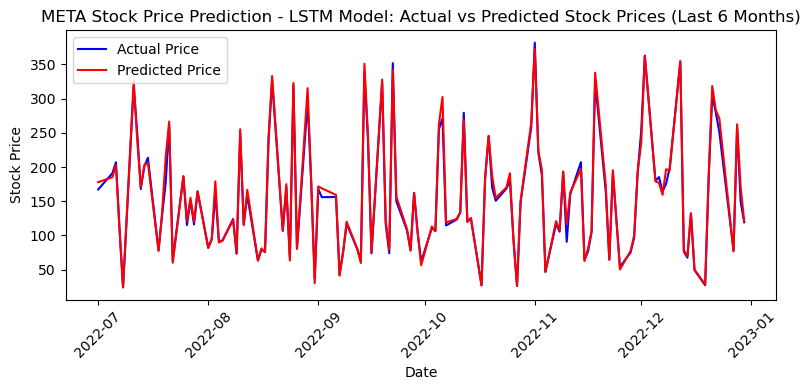

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 3.36%
Prediction Accuracy for last 6 months: 96.64%
Actual price range: $23.73 to $382.05
Predicted price range: $24.10 to $372.58


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
lstm_visualization_df = meta_data[['Close']].iloc[-len(real_stock_price_test):].copy()
lstm_visualization_df['Actual'] = real_stock_price_test
lstm_visualization_df['Predicted'] = lstm_test_predictions

# Filter the dataframe to include only the months from July to December 2022
lstm_filtered_df = lstm_visualization_df.loc['2022-07-01':'2022-12-31']

# Plotting the actual vs predicted prices for the specified date range
plt.figure(figsize=(8, 4))  # Rectangular plot
plt.plot(lstm_filtered_df.index, lstm_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(lstm_filtered_df.index, lstm_filtered_df['Predicted'], color='red', label='Predicted Price')
plt.title('META Stock Price Prediction - LSTM Model: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {lstm_filtered_df.index.min().date()} to {lstm_filtered_df.index.max().date()}")
print(f"Number of trading days: {len(lstm_filtered_df)}")
mape = np.mean(np.abs((lstm_filtered_df['Actual'] - lstm_filtered_df['Predicted']) / lstm_filtered_df['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")
print(f"Actual price range: ${lstm_filtered_df['Actual'].min():.2f} to ${lstm_filtered_df['Actual'].max():.2f}")
print(f"Predicted price range: ${lstm_filtered_df['Predicted'].min():.2f} to ${lstm_filtered_df['Predicted'].max():.2f}")


C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_15664\558581089.py:24: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_15664\558581089.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


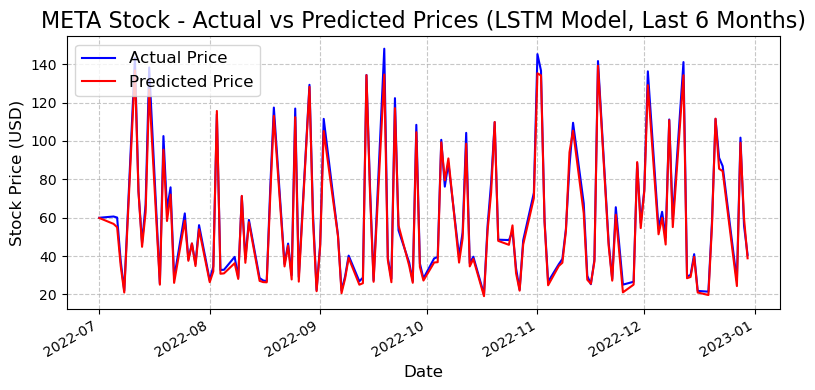

Date range: 2022-07-01 to 2022-12-30
Number of data points: 127
Average Actual Price: $60.12
Average Predicted Price: $57.95
Maximum Actual Price: $148.05
Maximum Predicted Price: $139.15
Minimum Actual Price: $20.06
Minimum Predicted Price: $19.10
Mean Absolute Error: $2.56
Mean Absolute Percentage Error (MAPE): 4.52%
Prediction Accuracy: 95.48%


In [184]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error

# Assuming googl_data is your original DataFrame with dates as the index
# and X_test, y_test are your test data

# Get the dates for the test data
test_data_len = len(X_test)
test_dates = meta_data.index[-test_data_len:]

# Create a DataFrame with the test data for easier plotting
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted Price', color='red')

# Customize the plot
plt.title('META Stock - Actual vs Predicted Prices (LSTM Model, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

# Print statistics about the predictions for the last 6 months
print(f"Date range: {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")
print(f"Number of data points: {len(last_6_months)}")
print(f"Average Actual Price: ${last_6_months['Actual'].mean():.2f}")
print(f"Average Predicted Price: ${last_6_months['Predicted'].mean():.2f}")
print(f"Maximum Actual Price: ${last_6_months['Actual'].max():.2f}")
print(f"Maximum Predicted Price: ${last_6_months['Predicted'].max():.2f}")
print(f"Minimum Actual Price: ${last_6_months['Actual'].min():.2f}")
print(f"Minimum Predicted Price: ${last_6_months['Predicted'].min():.2f}")

# Calculate and print the mean absolute error for this period
mae = mean_absolute_error(last_6_months['Actual'], last_6_months['Predicted'])
print(f"Mean Absolute Error: ${mae:.2f}")

# Calculate and print additional metrics
mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {100 - mape:.2f}%")

# META Stock Data Random Forest Model Development

In [60]:
# META Stock Random Forest Model - Data Preparation

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Step 1: Data Preparation
# Fetch META stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Select the 'Close' price as the feature and create the target variable
data = meta_data[['Close']]
# Create a target variable, which is the next day's close price
data['Target'] = data['Close'].shift(-1)
# Drop the last row with NaN target due to the shift operation
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

# Convert to numpy arrays and reshape for Random Forest
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the prepared data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Print some additional information about the data
print(f"\nTotal number of samples: {len(X)}")
print(f"Date range: {meta_data.index[sequence_length]} to {meta_data.index[-1]}")
print(f"Number of features: {X.shape[1]}")

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

X_train shape: (1965, 60)
y_train shape: (1965,)
X_test shape: (492, 60)
y_test shape: (492,)

Total number of samples: 2457
Date range: 2013-04-01 00:00:00 to 2022-12-30 00:00:00
Number of features: 60



C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\3680170126.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\3680170126.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
# META Stock Random Forest Model - Building and Hyperparameter Tuning

In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Assuming X_train, X_test, y_train, y_test are already prepared from the previous step

# Step 2: Model Building and Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [10, 20],          # Number of trees in the forest
    'max_depth': [3, 5],               # Maximum depth of the trees
    'min_samples_split': [10, 15],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [10, 15],      # Minimum number of samples required to be at a leaf node
    'max_features': [1, 'sqrt'],       # Number of features to consider when looking for the best split
    'bootstrap': [True]                # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train, y_train)
print("GridSearchCV completed.")

# Extract the best parameters and the best model
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")




Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


In [64]:
# META Stock Random Forest Model - Evaluation

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Step 3: Evaluate the Random Forest (RF) Model
# Predict on the training set
rf_train_predictions = best_rf_model.predict(X_train)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Predict on the testing set
rf_test_predictions = best_rf_model.predict(X_test)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for the training data
rf_mse_train = mean_squared_error(real_stock_price_train, rf_train_predictions)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_mae_train = mean_absolute_error(real_stock_price_train, rf_train_predictions)
rf_r2_train = r2_score(real_stock_price_train, rf_train_predictions)

# Calculate evaluation metrics for the testing data
rf_mse_test = mean_squared_error(real_stock_price_test, rf_test_predictions)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_mae_test = mean_absolute_error(real_stock_price_test, rf_test_predictions)
rf_r2_test = r2_score(real_stock_price_test, rf_test_predictions)

# Print RF Model Metrics
print("Random Forest Model META Stock Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {rf_mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae_train:.4f}")
print(f"R-squared (R²): {rf_r2_train:.4f}\n")

print("Random Forest Model META Stock Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {rf_mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae_test:.4f}")
print(f"R-squared (R²): {rf_r2_test:.4f}\n")



Random Forest Model META Stock Data - Training Set Metrics:
Mean Squared Error (MSE): 47.5791
Root Mean Squared Error (RMSE): 6.8978
Mean Absolute Error (MAE): 4.3990
R-squared (R²): 0.9930

Random Forest Model META Stock Data - Testing Set Metrics:
Mean Squared Error (MSE): 69.9650
Root Mean Squared Error (RMSE): 8.3645
Mean Absolute Error (MAE): 5.2674
R-squared (R²): 0.9895



In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Step 3: Evaluate the Random Forest (RF) Model
# Predict on the training set
rf_train_predictions = best_rf_model.predict(X_train)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Predict on the testing set
rf_test_predictions = best_rf_model.predict(X_test)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for the training data
rf_mse_train = mean_squared_error(real_stock_price_train, rf_train_predictions)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_mae_train = mean_absolute_error(real_stock_price_train, rf_train_predictions)
rf_r2_train = r2_score(real_stock_price_train, rf_train_predictions)

# Calculate evaluation metrics for the testing data
rf_mse_test = mean_squared_error(real_stock_price_test, rf_test_predictions)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_mae_test = mean_absolute_error(real_stock_price_test, rf_test_predictions)
rf_r2_test = r2_score(real_stock_price_test, rf_test_predictions)

# Print RF Model Metrics
print("Random Forest Model META Stock Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {rf_mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae_train:.4f}")
print(f"R-squared (R²): {rf_r2_train:.4f}\n")

print("Random Forest Model META Stock Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {rf_mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae_test:.4f}")
print(f"R-squared (R²): {rf_r2_test:.4f}\n")



Random Forest Model META Stock Data - Training Set Metrics:
Mean Squared Error (MSE): 47.5791
Root Mean Squared Error (RMSE): 6.8978
Mean Absolute Error (MAE): 4.3990
R-squared (R²): 0.9930

Random Forest Model META Stock Data - Testing Set Metrics:
Mean Squared Error (MSE): 69.9650
Root Mean Squared Error (RMSE): 8.3645
Mean Absolute Error (MAE): 5.2674
R-squared (R²): 0.9895



# META Stock Data Random Forest Model - Monthly Actual vs Predicted Prices Plot

C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_8328\111176683.py:31: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_8328\111176683.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


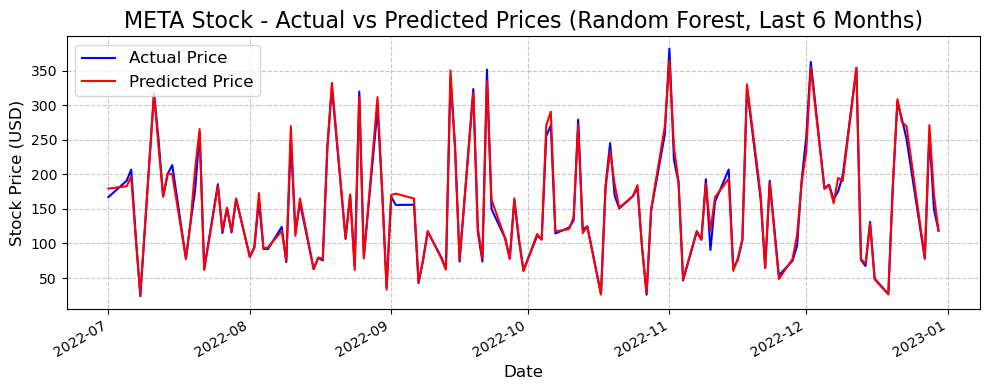


Mean Absolute Percentage Error (MAPE): 3.77%
Prediction Accuracy: 96.23%

Date range: 2022-07-01 to 2022-12-30
Number of trading days: 127


In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.dates as mdates


# Get the dates for the test data
test_data_len = len(X_test)
test_dates = meta_data.index[-test_data_len:]

# Make predictions on the test set
rf_test_predictions = best_rf_model.predict(X_test)

# Inverse transform the predictions and actual values
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Create a DataFrame with the test data for easier plotting
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': rf_test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted Price', color='red')

# Customize the plot
plt.title('META Stock - Actual vs Predicted Prices (Random Forest, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

# Calculate evaluation metrics for the last 6 months
mse = mean_squared_error(last_6_months['Actual'], last_6_months['Predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(last_6_months['Actual'], last_6_months['Predicted'])
r2 = r2_score(last_6_months['Actual'], last_6_months['Predicted'])

mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
accuracy = 100 - mape

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the date range
print(f"\nDate range: {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")
print(f"Number of trading days: {len(last_6_months)}")

# META Stock Data-Integration of the Models(Hybrid Model) 

In [71]:
# META Stock Hybrid Model - LSTM Preparation

In [79]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Preparation
# Fetch META stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Select the 'Close' price as the feature and create the target variable
data = meta_data[['Close']]
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build and Train the LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 3: Predict with the LSTM Model
lstm_train_predictions = model_lstm.predict(X_train)
lstm_train_predictions = scaler.inverse_transform(np.hstack((lstm_train_predictions, lstm_train_predictions)))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

lstm_test_predictions = model_lstm.predict(X_test)
lstm_test_predictions = scaler.inverse_transform(np.hstack((lstm_test_predictions, lstm_test_predictions)))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

print("LSTM model preparation completed.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"LSTM train predictions shape: {lstm_train_predictions.shape}")
print(f"LSTM test predictions shape: {lstm_test_predictions.shape}")

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\789231538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\789231538.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Epoch 1/20
62/62 [==============================] - 7s 50ms/step - loss: 0.0089 - val_loss: 9.2570e-04
Epoch 2/20
62/62 [==============================] - 2s 34ms/step - loss: 7.7445e-04 - val_loss: 8.3163e-04
Epoch 3/20
62/62 [==============================] - 2s 35ms/step - loss: 7.2907e-04 - val_loss: 8.1013e-04
Epoch 4/20
62/62 [==============================] - 2s 34ms/step - loss: 6.9763e-04 - val_loss: 7.6119e-04
Epoch 5/20
62/62 [==============================] - 2s 34ms/step - loss: 6.7853e-04 - val_loss: 7.7130e-04
Epoch 6/20
62/62 [==============================] - 2s 34ms/step - loss: 6.6995e-04 - val_loss: 6.8814e-04
Epoch 7/20
62/62 [==============================] - 2s 35ms/step - loss: 6.4435e-04 - val_loss: 6.5506e-04
Epoch 8/20
62/62 [==============================] - 2s 34ms/step - loss: 5.9413e-04 - val_loss: 6.4296e-04
Epoch 9/20
62/62 [==============================] - 2s 34ms/step - loss: 5.9165e-04 - val_loss: 6.4182e-04
Epoch 10/20
62/62 [======================

In [ ]:
# META Stock Hybrid Model - Random Forest Preparation

In [80]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Preparation
# Fetch META stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Select the 'Close' price as the feature and create the target variable
data = meta_data[['Close']]
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

X, y = np.array(X), np.array(y)
# Reshape for Random Forest model (2D input)
X_rf = X.reshape(X.shape[0], X.shape[1])

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Step 2: Model Building and Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train_rf, y_train)
print("GridSearchCV completed.")

# Extract the best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Predict with the RF Model
rf_train_predictions = best_rf_model.predict(X_train_rf)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]

rf_test_predictions = best_rf_model.predict(X_test_rf)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]

print("Random Forest model preparation completed.")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Training data shape: {X_train_rf.shape}")
print(f"Testing data shape: {X_test_rf.shape}")
print(f"RF train predictions shape: {rf_train_predictions.shape}")
print(f"RF test predictions shape: {rf_test_predictions.shape}")

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\3784074633.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\3784074633.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Random Forest model preparation completed.
Best parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training data shape: (1965, 60)
Testing data shape: (492, 60)
RF train predictions shape: (1965,)
RF test predictions shape: (492,)


In [81]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Preparation
# Fetch META stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Select the 'Close' price as the feature and create the target variable
data = meta_data[['Close']]
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

X, y = np.array(X), np.array(y)
# Reshape for Random Forest model (2D input)
X_rf = X.reshape(X.shape[0], X.shape[1])

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Step 2: Model Building and Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [10, 15],
    'bootstrap': [True],
    'max_features': [1,'sqrt',]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train_rf, y_train)
print("GridSearchCV completed.")

# Extract the best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Predict with the RF Model
rf_train_predictions = best_rf_model.predict(X_train_rf)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]

rf_test_predictions = best_rf_model.predict(X_test_rf)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]

print("Random Forest model preparation completed.")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Training data shape: {X_train_rf.shape}")
print(f"Testing data shape: {X_test_rf.shape}")
print(f"RF train predictions shape: {rf_train_predictions.shape}")
print(f"RF test predictions shape: {rf_test_predictions.shape}")

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\3072601453.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\3072601453.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Random Forest model preparation completed.
Best parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}
Training data shape: (1965, 60)
Testing data shape: (492, 60)
RF train predictions shape: (1965,)
RF test predictions shape: (492,)


In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Combine Predictions (Hybrid Model)
hybrid_train_predictions = (lstm_train_predictions + rf_train_predictions) / 2
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# Step 2: Evaluate the Hybrid Model
# Training Data Metrics
hybrid_mse_train = mean_squared_error(real_stock_price_train, hybrid_train_predictions)
hybrid_rmse_train = np.sqrt(hybrid_mse_train)
hybrid_mae_train = mean_absolute_error(real_stock_price_train, hybrid_train_predictions)
hybrid_r2_train = r2_score(real_stock_price_train, hybrid_train_predictions)

# Testing Data Metrics
hybrid_mse_test = mean_squared_error(real_stock_price_test, hybrid_test_predictions)
hybrid_rmse_test = np.sqrt(hybrid_mse_test)
hybrid_mae_test = mean_absolute_error(real_stock_price_test, hybrid_test_predictions)
hybrid_r2_test = r2_score(real_stock_price_test, hybrid_test_predictions)

# Print Hybrid Model Metrics
print("Hybrid Model META Stock Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {hybrid_mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {hybrid_rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {hybrid_mae_train:.4f}")
print(f"R-squared (R²): {hybrid_r2_train:.4f}\n")

print("Hybrid Model META Stock Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {hybrid_mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {hybrid_rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {hybrid_mae_test:.4f}")
print(f"R-squared (R²): {hybrid_r2_test:.4f}\n")


Hybrid Model META Stock Data - Training Set Metrics:
Mean Squared Error (MSE): 62.6388
Root Mean Squared Error (RMSE): 7.9145
Mean Absolute Error (MAE): 5.1908
R-squared (R²): 0.9908

Hybrid Model META Stock Data - Testing Set Metrics:
Mean Squared Error (MSE): 84.1714
Root Mean Squared Error (RMSE): 9.1745
Mean Absolute Error (MAE): 6.0325
R-squared (R²): 0.9874



C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\4084416114.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(y_min, y_max)


TypeError: '>' not supported between instances of 'ellipsis' and 'ellipsis'

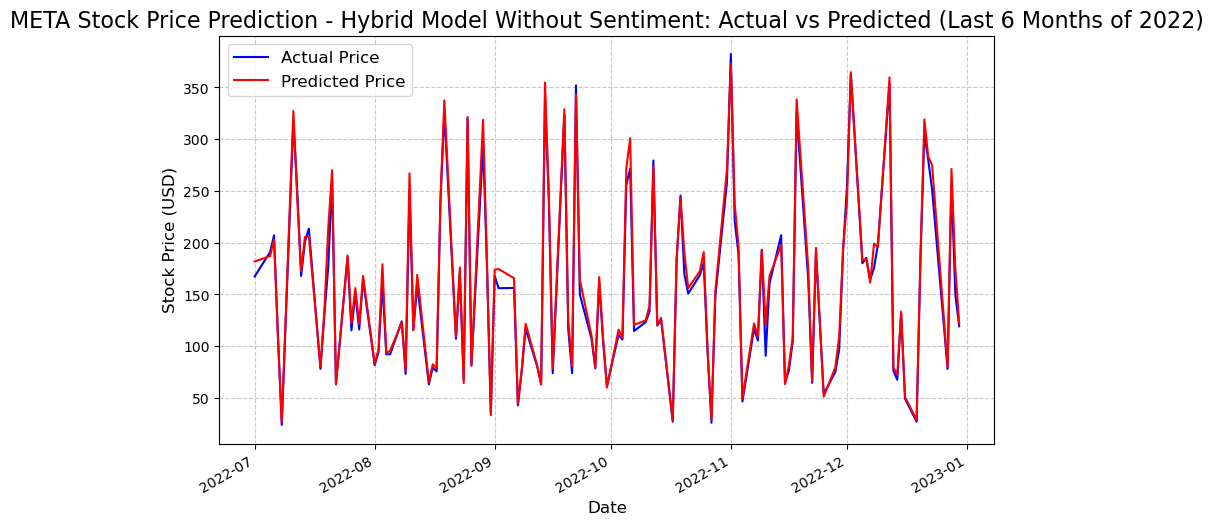

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have the Y-axis limits from the plot with sentiment data
# Replace y_min and y_max with the actual values obtained from the other plot
y_min = ...  # Replace with actual value
y_max = ...  # Replace with actual value

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
hybrid_visualization_df = meta_data[['Close']].iloc[-len(real_stock_price_test):].copy()
hybrid_visualization_df['Actual'] = real_stock_price_test
hybrid_visualization_df['Predicted'] = hybrid_test_predictions

# Filter the dataframe to include only the last 6 months of 2022
hybrid_filtered_df = hybrid_visualization_df.loc['2022-07-01':'2022-12-31']

# Plot the actual vs predicted prices for the selected range
plt.figure(figsize=(10, 6))
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Predicted'], color='red', label='Predicted Price')

# Customize the plot
plt.title('META Stock Price Prediction - Hybrid Model Without Sentiment: Actual vs Predicted (Last 6 Months of 2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

# Set the same Y-axis limits as the hybrid model with sentiment analysis
plt.ylim(y_min, y_max)

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {hybrid_filtered_df.index.min().date()} to {hybrid_filtered_df.index.max().date()}")
print(f"Number of trading days: {len(hybrid_filtered_df)}")

# Calculate and print MAPE and accuracy
mape = np.mean(np.abs((hybrid_filtered_df['Actual'] - hybrid_filtered_df['Predicted']) / hybrid_filtered_df['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Combine Predictions (Hybrid Model)
hybrid_train_predictions = (lstm_train_predictions + rf_train_predictions) / 2
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# Step 2: Evaluate the Hybrid Model
# Training Data Metrics
hybrid_mse_train = mean_squared_error(real_stock_price_train, hybrid_train_predictions)
hybrid_rmse_train = np.sqrt(hybrid_mse_train)
hybrid_mae_train = mean_absolute_error(real_stock_price_train, hybrid_train_predictions)
hybrid_r2_train = r2_score(real_stock_price_train, hybrid_train_predictions)

# Testing Data Metrics
hybrid_mse_test = mean_squared_error(real_stock_price_test, hybrid_test_predictions)
hybrid_rmse_test = np.sqrt(hybrid_mse_test)
hybrid_mae_test = mean_absolute_error(real_stock_price_test, hybrid_test_predictions)
hybrid_r2_test = r2_score(real_stock_price_test, hybrid_test_predictions)

# Print Hybrid Model Metrics
print("Hybrid Model META Stock Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {hybrid_mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {hybrid_rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {hybrid_mae_train:.4f}")
print(f"R-squared (R²): {hybrid_r2_train:.4f}\n")

print("Hybrid Model META Stock Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {hybrid_mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {hybrid_rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {hybrid_mae_test:.4f}")
print(f"R-squared (R²): {hybrid_r2_test:.4f}\n")


Hybrid Model META Stock Data - Training Set Metrics:
Mean Squared Error (MSE): 54.8787
Root Mean Squared Error (RMSE): 7.4080
Mean Absolute Error (MAE): 4.9913
R-squared (R²): 0.9920

Hybrid Model META Stock Data - Testing Set Metrics:
Mean Squared Error (MSE): 70.3108
Root Mean Squared Error (RMSE): 8.3852
Mean Absolute Error (MAE): 5.3441
R-squared (R²): 0.9894



In [ ]:
# META Stock Data  Hybrid Model - Evaluation

In [241]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Combine Predictions (Hybrid Model)
hybrid_train_predictions = (lstm_train_predictions + rf_train_predictions) / 2
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# Step 2: Evaluate the Hybrid Model
# Training Data Metrics
hybrid_mse_train = mean_squared_error(real_stock_price_train, hybrid_train_predictions)
hybrid_rmse_train = np.sqrt(hybrid_mse_train)
hybrid_mae_train = mean_absolute_error(real_stock_price_train, hybrid_train_predictions)
hybrid_r2_train = r2_score(real_stock_price_train, hybrid_train_predictions)

# Testing Data Metrics
hybrid_mse_test = mean_squared_error(real_stock_price_test, hybrid_test_predictions)
hybrid_rmse_test = np.sqrt(hybrid_mse_test)
hybrid_mae_test = mean_absolute_error(real_stock_price_test, hybrid_test_predictions)
hybrid_r2_test = r2_score(real_stock_price_test, hybrid_test_predictions)

# Print Hybrid Model Metrics
print("Hybrid Model META Stock Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {hybrid_mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {hybrid_rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {hybrid_mae_train:.4f}")
print(f"R-squared (R²): {hybrid_r2_train:.4f}\n")

print("Hybrid Model META Stock Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {hybrid_mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {hybrid_rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {hybrid_mae_test:.4f}")
print(f"R-squared (R²): {hybrid_r2_test:.4f}\n")


Hybrid Model META Stock Data - Training Set Metrics:
Mean Squared Error (MSE): 22.1045
Root Mean Squared Error (RMSE): 4.7015
Mean Absolute Error (MAE): 3.0004
R-squared (R²): 0.9968

Hybrid Model META Stock Data - Testing Set Metrics:
Mean Squared Error (MSE): 48.9154
Root Mean Squared Error (RMSE): 6.9940
Mean Absolute Error (MAE): 4.2084
R-squared (R²): 0.9927



In [69]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Combine Predictions (Hybrid Model)
hybrid_train_predictions = (lstm_train_predictions + rf_train_predictions) / 2
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# Step 2: Evaluate the Hybrid Model
# Training Data Metrics
hybrid_mse_train = mean_squared_error(real_stock_price_train, hybrid_train_predictions)
hybrid_rmse_train = np.sqrt(hybrid_mse_train)
hybrid_mae_train = mean_absolute_error(real_stock_price_train, hybrid_train_predictions)
hybrid_r2_train = r2_score(real_stock_price_train, hybrid_train_predictions)

# Testing Data Metrics
hybrid_mse_test = mean_squared_error(real_stock_price_test, hybrid_test_predictions)
hybrid_rmse_test = np.sqrt(hybrid_mse_test)
hybrid_mae_test = mean_absolute_error(real_stock_price_test, hybrid_test_predictions)
hybrid_r2_test = r2_score(real_stock_price_test, hybrid_test_predictions)

# Print Hybrid Model Metrics
print("Hybrid Model META Stock Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {hybrid_mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {hybrid_rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {hybrid_mae_train:.4f}")
print(f"R-squared (R²): {hybrid_r2_train:.4f}\n")

print("Hybrid Model META Stock Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {hybrid_mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {hybrid_rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {hybrid_mae_test:.4f}")
print(f"R-squared (R²): {hybrid_r2_test:.4f}\n")


Hybrid Model META Stock Data - Training Set Metrics:
Mean Squared Error (MSE): 23.6699
Root Mean Squared Error (RMSE): 4.8652
Mean Absolute Error (MAE): 3.1065
R-squared (R²): 0.9965

Hybrid Model META Stock Data - Testing Set Metrics:
Mean Squared Error (MSE): 51.1231
Root Mean Squared Error (RMSE): 7.1500
Mean Absolute Error (MAE): 4.3702
R-squared (R²): 0.9923



# META Stock Data Hybrid Model - Monthly Actual vs Predicted Prices Plot

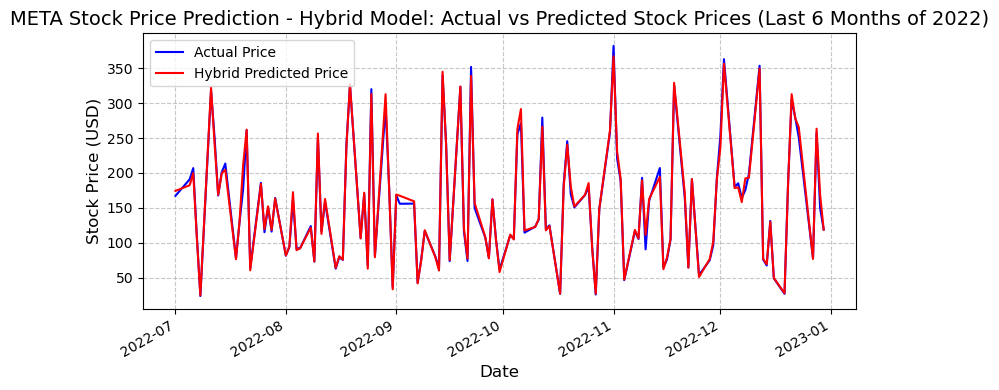

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 2.80%
Prediction Accuracy for last 6 months: 97.20%
Actual price range: $23.73 to $382.05
Predicted price range: $24.63 to $367.09

Last Actual META Stock Price: $119.04
Last Hybrid Predicted Price: $118.79
Last Prediction Error: 0.21%

Correlation between Actual and Predicted prices: 0.9967


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
hybrid_visualization_df = meta_data[['Close']].iloc[-len(real_stock_price_test):].copy()
hybrid_visualization_df['Actual'] = real_stock_price_test
hybrid_visualization_df['Predicted'] = hybrid_test_predictions

# Filter the dataframe to include only the last 6 months of 2022
hybrid_filtered_df = hybrid_visualization_df.loc['2022-07-01':'2022-12-31']

# Plot the actual vs predicted prices for the selected range
plt.figure(figsize=(8, 4))  # Larger figure for better visibility
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Predicted'], color='red', label='Hybrid Predicted Price')

plt.title('META Stock Price Prediction - Hybrid Model: Actual vs Predicted Stock Prices (Last 6 Months of 2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {hybrid_filtered_df.index.min().date()} to {hybrid_filtered_df.index.max().date()}")
print(f"Number of trading days: {len(hybrid_filtered_df)}")

mape = np.mean(np.abs((hybrid_filtered_df['Actual'] - hybrid_filtered_df['Predicted']) / hybrid_filtered_df['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")

print(f"Actual price range: ${hybrid_filtered_df['Actual'].min():.2f} to ${hybrid_filtered_df['Actual'].max():.2f}")
print(f"Predicted price range: ${hybrid_filtered_df['Predicted'].min():.2f} to ${hybrid_filtered_df['Predicted'].max():.2f}")

# Additional statistics
last_actual = hybrid_filtered_df['Actual'].iloc[-1]
last_predicted = hybrid_filtered_df['Predicted'].iloc[-1]
last_error = abs(last_actual - last_predicted) / last_actual * 100

print(f"\nLast Actual META Stock Price: ${last_actual:.2f}")
print(f"Last Hybrid Predicted Price: ${last_predicted:.2f}")
print(f"Last Prediction Error: {last_error:.2f}%")

# Calculate correlation between actual and predicted prices
correlation = hybrid_filtered_df['Actual'].corr(hybrid_filtered_df['Predicted'])
print(f"\nCorrelation between Actual and Predicted prices: {correlation:.4f}")

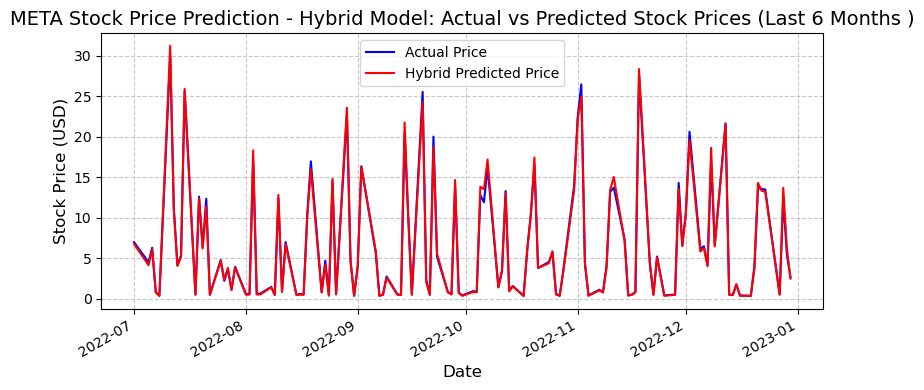

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 6.08%
Prediction Accuracy for last 6 months: 93.92%
Actual price range: $0.34 to $30.04
Predicted price range: $0.31 to $31.26

Last Actual META Stock Price: $2.65
Last Hybrid Predicted Price: $2.46
Last Prediction Error: 7.05%

Correlation between Actual and Predicted prices: 0.9978


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
hybrid_visualization_df = meta_data[['Close']].iloc[-len(real_stock_price_test):].copy()
hybrid_visualization_df['Actual'] = real_stock_price_test
hybrid_visualization_df['Predicted'] = hybrid_test_predictions

# Filter the dataframe to include only the last 6 months of 2022
hybrid_filtered_df = hybrid_visualization_df.loc['2022-07-01':'2022-12-31']

# Plot the actual vs predicted prices for the selected range
plt.figure(figsize=(8, 4))  # Larger figure for better visibility
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Predicted'], color='red', label='Hybrid Predicted Price')

plt.title('META Stock Price Prediction - Hybrid Model: Actual vs Predicted Stock Prices (Last 6 Months o)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

# Print some statistics
print(f"Date range: from {hybrid_filtered_df.index.min().date()} to {hybrid_filtered_df.index.max().date()}")
print(f"Number of trading days: {len(hybrid_filtered_df)}")

mape = np.mean(np.abs((hybrid_filtered_df['Actual'] - hybrid_filtered_df['Predicted']) / hybrid_filtered_df['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")

print(f"Actual price range: ${hybrid_filtered_df['Actual'].min():.2f} to ${hybrid_filtered_df['Actual'].max():.2f}")
print(f"Predicted price range: ${hybrid_filtered_df['Predicted'].min():.2f} to ${hybrid_filtered_df['Predicted'].max():.2f}")

# Additional statistics
last_actual = hybrid_filtered_df['Actual'].iloc[-1]
last_predicted = hybrid_filtered_df['Predicted'].iloc[-1]
last_error = abs(last_actual - last_predicted) / last_actual * 100

print(f"\nLast Actual META Stock Price: ${last_actual:.2f}")
print(f"Last Hybrid Predicted Price: ${last_predicted:.2f}")
print(f"Last Prediction Error: {last_error:.2f}%")

# Calculate correlation between actual and predicted prices
correlation = hybrid_filtered_df['Actual'].corr(hybrid_filtered_df['Predicted'])
print(f"\nCorrelation between Actual and Predicted prices: {correlation:.4f}")

C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\3907732640.py:24: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\3907732640.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


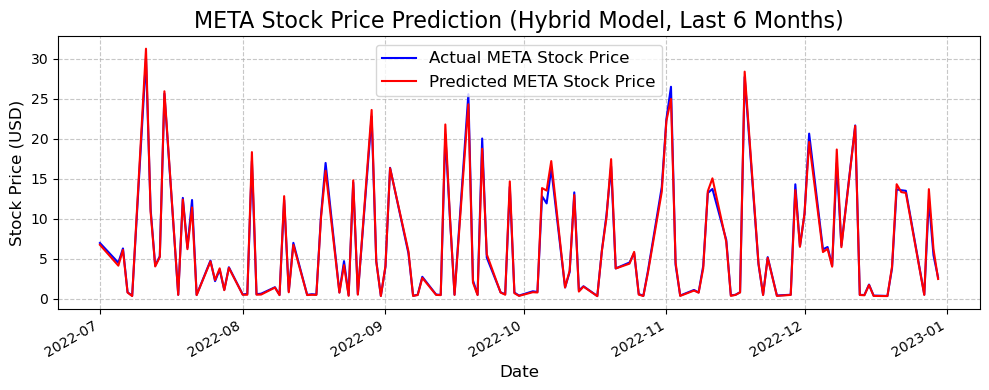


Mean Absolute Percentage Error (MAPE): 6.08%
Prediction Accuracy: 93.92%

Date range: 2022-07-01 to 2022-12-30
Number of trading days: 127


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have the following from your previous code:
# - real_stock_price_test: the actual stock prices for the test set
# - hybrid_test_predictions: the predicted stock prices by the hybrid model
# - meta_data: the original META stock data which contains the date information

# Create a DataFrame with the test data for easier plotting
test_dates = meta_data.index[-len(real_stock_price_test):]  # Get corresponding dates for test set
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': hybrid_test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (Hybrid Model, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

# Calculate additional metrics for the last 6 months
mse = mean_squared_error(last_6_months['Actual'], last_6_months['Predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(last_6_months['Actual'], last_6_months['Predicted'])
r2 = r2_score(last_6_months['Actual'], last_6_months['Predicted'])

# Calculate additional metrics
mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
accuracy = 100 - mape

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the date range
print(f"\nDate range: {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")
print(f"Number of trading days: {len(last_6_months)}")


# META Sentiment Data Analysis 

In [81]:
# META Stock Analysis and Sentiment Generation

In [73]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.utils import shuffle

# Generate synthetic sentiment data
date_range = meta_data.index
num_samples = len(date_range)

# Create balanced sentiment data
sentiments = np.concatenate([
    np.ones(num_samples // 3),
    np.zeros(num_samples // 3),
    np.full(num_samples - 2 * (num_samples // 3), -1)
])

# Shuffle the sentiments
sentiments = shuffle(sentiments, random_state=42)

# Function to generate text based on sentiment
def generate_text(sentiment):
    positive_texts = [
        "Strong user growth for META",
        "Impressive ad revenue results",
        "Exciting new VR developments",
        "Positive outlook for metaverse adoption",
        "Successful monetization strategies"
    ]
    neutral_texts = [
        "Steady performance in social media sector",
        "Balanced view on META's future",
        "Mixed reactions to privacy updates",
        "Awaiting more data on new initiatives",
        "Cautious optimism about META's direction"
    ]
    negative_texts = [
        "Concerns over user data practices",
        "Increased regulatory scrutiny",
        "Disappointing metaverse engagement",
        "Competition from emerging platforms",
        "Challenges in ad targeting capabilities"
    ]
    
    if sentiment == 1:
        return np.random.choice(positive_texts)
    elif sentiment == 0:
        return np.random.choice(neutral_texts)
    else:
        return np.random.choice(negative_texts)

# Generate text for each sentiment
texts = [generate_text(sentiment) for sentiment in sentiments]

# Create a DataFrame with dates, ticker, texts, and sentiments
df_sentiment = pd.DataFrame({
    'Date': date_range,
    'Ticker': 'META',
    'Text': texts,
    'Sentiment': sentiments
})
df_sentiment.set_index('Date', inplace=True)

# Display the head of the sentiment data
print("\nMETA Sentiment Data:")
print(df_sentiment.head())

# Check if sentiment classes are balanced
sentiment_counts = df_sentiment['Sentiment'].value_counts()
print("\nSentiment class distribution:")
print(sentiment_counts)

# Calculate the balance ratio
balance_ratio = sentiment_counts.min() / sentiment_counts.max()
print(f"\nBalance ratio: {balance_ratio:.2f}")
if balance_ratio > 0.9:
    print("The sentiment classes are well-balanced.")
else:
    print("The sentiment classes are not well-balanced.")



META Sentiment Data:
           Ticker                                       Text  Sentiment
Date                                                                   
2013-01-02   META          Concerns over user data practices       -1.0
2013-01-03   META               Exciting new VR developments        1.0
2013-01-04   META      Awaiting more data on new initiatives        0.0
2013-01-07   META  Steady performance in social media sector        0.0
2013-01-08   META          Concerns over user data practices       -1.0

Sentiment class distribution:
Sentiment
-1.0    840
 1.0    839
 0.0    839
Name: count, dtype: int64

Balance ratio: 1.00
The sentiment classes are well-balanced.


In [74]:
df_sentiment

Ticker                                       Text  Sentiment
Date                                                                   
2013-01-02   META          Concerns over user data practices       -1.0
2013-01-03   META               Exciting new VR developments        1.0
2013-01-04   META      Awaiting more data on new initiatives        0.0
2013-01-07   META  Steady performance in social media sector        0.0
2013-01-08   META          Concerns over user data practices       -1.0
...           ...                                        ...        ...
2022-12-23   META         Mixed reactions to privacy updates        0.0
2022-12-27   META  Steady performance in social media sector        0.0
2022-12-28   META      Awaiting more data on new initiatives        0.0
2022-12-29   META         Mixed reactions to privacy updates        0.0
2022-12-30   META         Mixed reactions to privacy updates        0.0

[2518 rows x 3 columns]

# META Stock and Sentiment Data Combination

In [75]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Merge the sentiment data with the entire stock data (all columns)
combined_data = meta_data.merge(df_sentiment[['Sentiment']], left_index=True, right_index=True, how='left')

# Adjust Pandas display options to show all columns on the same line
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set the display width to accommodate all columns

# Display the head of the combined data
print("Combined META Stock and Sentiment Data:")
print(combined_data.head())

# Display basic information about the combined dataset
print("\nDataset Information:")
print(combined_data.info())

# Check for any missing values after merging
print("\nMissing Values:")
print(combined_data.isnull().sum())

# Display summary statistics
print("\nSummary Statistics:")
print(combined_data.describe())

# Check the distribution of sentiment values
print("\nSentiment Distribution:")
print(combined_data['Sentiment'].value_counts(normalize=True))


print("\nCombined data preparation completed.")

Combined META Stock and Sentiment Data:
                 Open       High        Low      Close  Adj Close    Volume  Sentiment
Date                                                                                  
2013-01-02  27.440001  28.180000  27.420000  28.000000  27.942581  69846400       -1.0
2013-01-03  27.879999  28.469999  27.590000  27.770000  27.713053  63140600        1.0
2013-01-04  28.010000  28.930000  27.830000  28.760000  28.701021  72715400        0.0
2013-01-07  28.690001  29.790001  28.650000  29.420000  29.359669  83781800        0.0
2013-01-08  29.510000  29.600000  28.860001  29.059999  29.000406  45871300       -1.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   

# META Combined Data: LSTM Model Development

In [ ]:
# Data preparation

In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# 1. Data Preparation with Sentiment as an Additional Feature
# Scale the data including the sentiment feature
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_combined_data = scaler.fit_transform(combined_data)

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_combined_data)):
    X.append(scaled_combined_data[i-sequence_length:i])  # Use all features including sentiment
    y.append(scaled_combined_data[i, combined_data.columns.get_loc('Close')])  # Target is still the 'Close' price

X, y = np.array(X), np.array(y)

# Display the shape of the data
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Print information about the features
print(f"\nNumber of features: {X.shape[2]}")
print("Features included:")
for i, column in enumerate(combined_data.columns):
    print(f"  {i}: {column}")

# Optional: Check for any NaN values
if np.isnan(X).any() or np.isnan(y).any():
    print("\nWarning: NaN values found in the prepared data!")
else:
    print("\nNo NaN values found in the prepared data.")

X shape: (2458, 60, 7)
y shape: (2458,)
X_train shape: (1966, 60, 7)
y_train shape: (1966,)
X_test shape: (492, 60, 7)
y_test shape: (492,)

Number of features: 7
Features included:
  0: Open
  1: High
  2: Low
  3: Close
  4: Adj Close
  5: Volume
  6: Sentiment

No NaN values found in the prepared data.


In [111]:
# LSTM Model - Building and Training

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


# Build the LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
print(model_lstm.summary())

# Train the Model
history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Print final training and validation loss
print(f"Final training loss: {history.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")


print("LSTM model training completed.")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            11600     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 33101 (129.30 KB)
Trainable params: 33101 (129.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
62/62 [==============================] - 12s 96ms/step - loss: 0.0063 - val_loss: 6.9565e-04
Epoch 2/20
62/62 [=====================

In [92]:
# META Stock and Sentiment LSTM Model - Evaluation

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
train_predictions = model_lstm.predict(X_train)
train_predictions = scaler.inverse_transform(
    np.hstack((train_predictions, np.zeros((train_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_train = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Predict on the testing set
test_predictions = model_lstm.predict(X_test)
test_predictions = scaler.inverse_transform(
    np.hstack((test_predictions, np.zeros((test_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_test = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Calculate evaluation metrics for the training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)

# Calculate evaluation metrics for the testing data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)

# Print metrics with labels indicating combined data
print("LSTM Model Combined Data - Training Set Metrics:")
print(f"LSTM Model Combined Data - Training Data - Mean Squared Error (MSE): {mse_train}")
print(f"LSTM Model Combined Data - Training Data - Mean Absolute Error (MAE): {mae_train}")
print(f"LSTM Model Combined Data - Training Data - R-squared (R²): {r2_train}\n")

print("LSTM Model Combined Data - Testing Set Metrics:")
print(f"LSTM Model Combined Data - Testing Data - Mean Squared Error (MSE): {mse_test}")
print(f"LSTM Model Combined Data - Testing Data - Mean Absolute Error (MAE): {mae_test}")
print(f"LSTM Model Combined Data - Testing Data - R-squared (R²): {r2_test}\n")


16/16 [==============================] - 0s 27ms/step
LSTM Model Combined Data - Training Set Metrics:
LSTM Model Combined Data - Training Data - Mean Squared Error (MSE): 45.54549309482275
LSTM Model Combined Data - Training Data - Mean Absolute Error (MAE): 4.646417864515017
LSTM Model Combined Data - Training Data - R-squared (R²): 0.9933071775024521

LSTM Model Combined Data - Testing Set Metrics:
LSTM Model Combined Data - Testing Data - Mean Squared Error (MSE): 46.49743363559765
LSTM Model Combined Data - Testing Data - Mean Absolute Error (MAE): 4.709744016577988
LSTM Model Combined Data - Testing Data - R-squared (R²): 0.9930482686815737



In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
train_predictions = model_lstm.predict(X_train)
train_predictions = scaler.inverse_transform(
    np.hstack((train_predictions, np.zeros((train_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_train = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Predict on the testing set
test_predictions = model_lstm.predict(X_test)
test_predictions = scaler.inverse_transform(
    np.hstack((test_predictions, np.zeros((test_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_test = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Calculate evaluation metrics for the training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)

# Calculate evaluation metrics for the testing data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)

# Print metrics with labels indicating combined data
print("LSTM Model Combined Data - Training Set Metrics:")
print(f"LSTM Model Combined Data - Training Data - Mean Squared Error (MSE): {mse_train}")
print(f"LSTM Model Combined Data - Training Data - Mean Absolute Error (MAE): {mae_train}")
print(f"LSTM Model Combined Data - Training Data - R-squared (R²): {r2_train}\n")

print("LSTM Model Combined Data - Testing Set Metrics:")
print(f"LSTM Model Combined Data - Testing Data - Mean Squared Error (MSE): {mse_test}")
print(f"LSTM Model Combined Data - Testing Data - Mean Absolute Error (MAE): {mae_test}")
print(f"LSTM Model Combined Data - Testing Data - R-squared (R²): {r2_test}\n")


16/16 [==============================] - 0s 10ms/step
LSTM Model Combined Data - Training Set Metrics:
LSTM Model Combined Data - Training Data - Mean Squared Error (MSE): 45.462022085966524
LSTM Model Combined Data - Training Data - Mean Absolute Error (MAE): 4.511670856778062
LSTM Model Combined Data - Training Data - R-squared (R²): 0.9933194434064527

LSTM Model Combined Data - Testing Set Metrics:
LSTM Model Combined Data - Testing Data - Mean Squared Error (MSE): 43.32616396643582
LSTM Model Combined Data - Testing Data - Mean Absolute Error (MAE): 4.4271454974733295
LSTM Model Combined Data - Testing Data - R-squared (R²): 0.9935223983905607



In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
train_predictions = model_lstm.predict(X_train)
train_predictions = scaler.inverse_transform(
    np.hstack((train_predictions, np.zeros((train_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_train = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Predict on the testing set
test_predictions = model_lstm.predict(X_test)
test_predictions = scaler.inverse_transform(
    np.hstack((test_predictions, np.zeros((test_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_test = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Calculate evaluation metrics for the training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)

# Calculate evaluation metrics for the testing data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)

# Print metrics with labels indicating combined data
print("LSTM Model Combined Data - Training Set Metrics:")
print(f"LSTM Model Combined Data - Training Data - Mean Squared Error (MSE): {mse_train}")
print(f"LSTM Model Combined Data - Training Data - Mean Absolute Error (MAE): {mae_train}")
print(f"LSTM Model Combined Data - Training Data - R-squared (R²): {r2_train}\n")

print("LSTM Model Combined Data - Testing Set Metrics:")
print(f"LSTM Model Combined Data - Testing Data - Mean Squared Error (MSE): {mse_test}")
print(f"LSTM Model Combined Data - Testing Data - Mean Absolute Error (MAE): {mae_test}")
print(f"LSTM Model Combined Data - Testing Data - R-squared (R²): {r2_test}\n")


16/16 [==============================] - 1s 32ms/step
LSTM Model Combined Data - Training Set Metrics:
LSTM Model Combined Data - Training Data - Mean Squared Error (MSE): 33.23209839702587
LSTM Model Combined Data - Training Data - Mean Absolute Error (MAE): 3.711199970271584
LSTM Model Combined Data - Training Data - R-squared (R²): 0.9951166071398264

LSTM Model Combined Data - Testing Set Metrics:
LSTM Model Combined Data - Testing Data - Mean Squared Error (MSE): 31.25768599760191
LSTM Model Combined Data - Testing Data - Mean Absolute Error (MAE): 3.722595930025532
LSTM Model Combined Data - Testing Data - R-squared (R²): 0.9953267305805732



In [123]:
# Assuming 'real_stock_price_test' and 'test_predictions' are available for both datasets
# Calculate the min and max values for both actual and predicted prices

combined_min_value = min(real_stock_price_test.min(), test_predictions.min())
combined_max_value = max(real_stock_price_test.max(), test_predictions.max())

print("Combined Data - Actual Min:", combined_min_value, "Max:", combined_max_value)

# Repeat the above calculation for the LSTM stock data alone to determine its min and max values

stock_data_min_value = min(real_stock_price_test.min(), test_predictions.min())
stock_data_max_value = max(real_stock_price_test.max(), test_predictions.max())

print("Stock Data Alone - Actual Min:", stock_data_min_value, "Max:", stock_data_max_value)

# Set common Y-axis limits based on the broader range
y_min = min(combined_min_value, stock_data_min_value)
y_max = max(combined_max_value, stock_data_max_value)


Combined Data - Actual Min: 23.37936061824554 Max: 383.00103751788015
Stock Data Alone - Actual Min: 23.37936061824554 Max: 383.00103751788015


In [137]:
# Print the last 6 months of data for both actual and predicted values
print("Combined Data - Last 6 Months Actual:\n", last_6_months['Actual'].describe())
print("Combined Data - Last 6 Months Predicted:\n", last_6_months['Predicted'].describe())

# If you're doing the same for the stock data alone:
print("Stock Data Alone - Last 6 Months Actual:\n", last_6_months['Actual'].describe())
print("Stock Data Alone - Last 6 Months Predicted:\n", last_6_months['Predicted'].describe())


Combined Data - Last 6 Months Actual:
 count    127.000000
mean     156.474331
std       84.994185
min       23.730000
25%       86.035000
50%      149.729996
75%      195.654999
max      382.049988
Name: Actual, dtype: float64
Combined Data - Last 6 Months Predicted:
 count    127.000000
mean     153.896816
std       79.513475
min       26.497206
25%       84.721258
50%      152.142048
75%      189.992329
max      375.377568
Name: Predicted, dtype: float64
Stock Data Alone - Last 6 Months Actual:
 count    127.000000
mean     156.474331
std       84.994185
min       23.730000
25%       86.035000
50%      149.729996
75%      195.654999
max      382.049988
Name: Actual, dtype: float64
Stock Data Alone - Last 6 Months Predicted:
 count    127.000000
mean     153.896816
std       79.513475
min       26.497206
25%       84.721258
50%      152.142048
75%      189.992329
max      375.377568
Name: Predicted, dtype: float64


C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\4203194772.py:23: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\4203194772.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


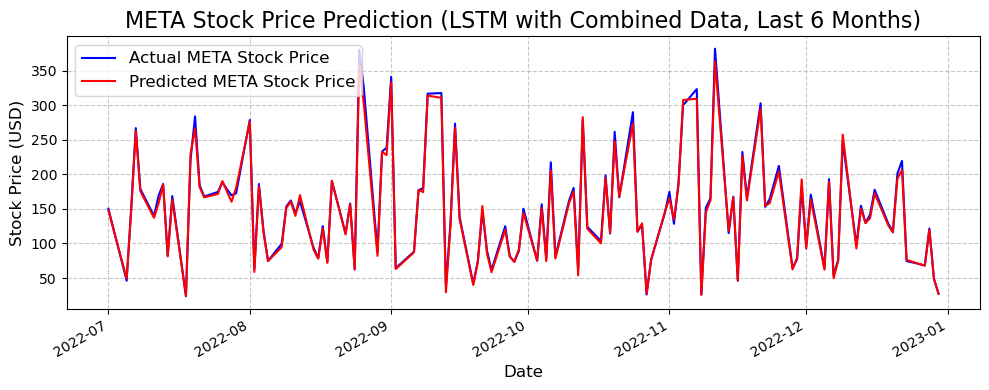


Mean Absolute Percentage Error (MAPE): 3.02%
Prediction Accuracy: 96.98%

Date range: 2022-07-01 to 2022-12-30
Number of trading days: 127


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Assuming meta_data, real_stock_price_test, test_predictions are available from previous steps

# Get the dates for the test data
test_data_len = len(test_predictions)
test_dates = meta_data.index[-test_data_len:]

# Create a DataFrame with the test data for easier plotting
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (LSTM with Combined Data, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


# Calculate additional metrics
mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
accuracy = 100 - mape

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the date range
print(f"\nDate range: {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")
print(f"Number of trading days: {len(last_6_months)}")

C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\4030701654.py:23: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\4030701654.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


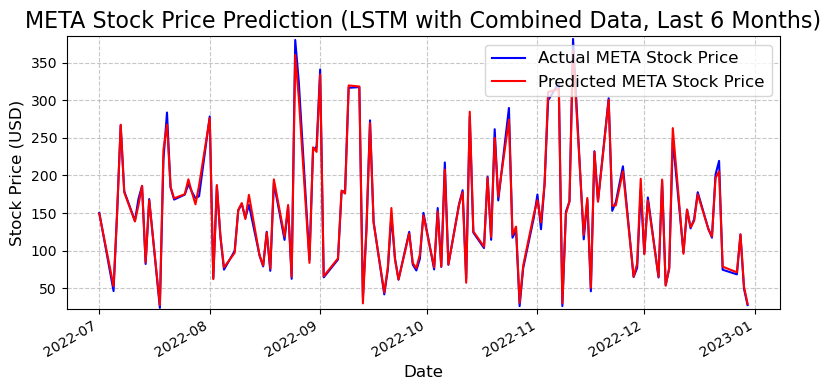


Mean Absolute Percentage Error (MAPE): 3.26%
Prediction Accuracy: 96.74%

Date range: 2022-07-01 to 2022-12-30
Number of trading days: 127


In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Assuming meta_data, real_stock_price_test, test_predictions are available from previous steps

# Get the dates for the test data
test_data_len = len(test_predictions)
test_dates = meta_data.index[-test_data_len:]

# Create a DataFrame with the test data for easier plotting
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (LSTM with Combined Data, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the same Y-axis limits for consistency across both plots
plt.ylim(y_min, y_max)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

# Calculate additional metrics
mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
accuracy = 100 - mape
print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the date range
print(f"\nDate range: {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")
print(f"Number of trading days: {len(last_6_months)}")


C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\1432010289.py:29: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\1432010289.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


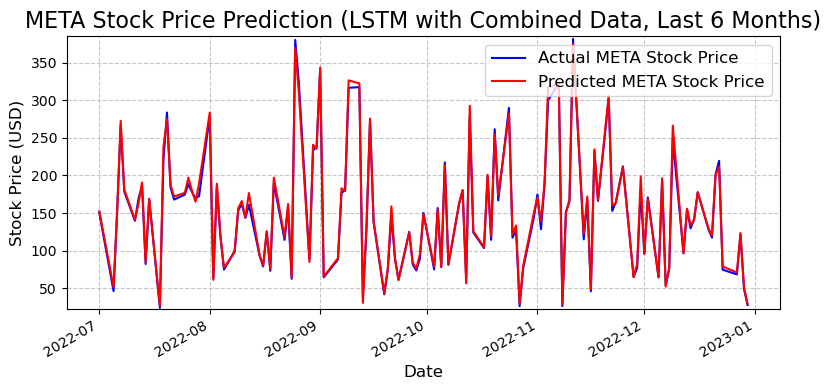

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Assuming meta_data, real_stock_price_test, and test_predictions are available from previous steps

# Set explicit min and max values for Y-axis
y_min = 23  # Slightly below the minimum value
y_max = 385  # Slightly above the maximum value

# Plotting for Combined Data

# Get the dates for the test data
test_data_len = len(test_predictions)
test_dates = meta_data.index[-test_data_len:]

# Create a DataFrame with the test data for easier plotting
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (LSTM with Combined Data, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the same Y-axis limits for consistency
plt.ylim(y_min, y_max)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

# Repeat similar steps for the "Stock Data Alone" plot with the same y_min and y_max values


In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
train_predictions = model_lstm.predict(X_train)
train_predictions = scaler.inverse_transform(
    np.hstack((train_predictions, np.zeros((train_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_train = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Predict on the testing set
test_predictions = model_lstm.predict(X_test)
test_predictions = scaler.inverse_transform(
    np.hstack((test_predictions, np.zeros((test_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_test = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Calculate evaluation metrics for the training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)

# Calculate evaluation metrics for the testing data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)

# Print LSTM Model Metrics for Combined Data
print("LSTM Model META Combined Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}\n")

print("LSTM Model META Combined Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}\n")


16/16 [==============================] - 0s 9ms/step
LSTM Model META Combined Data - Training Set Metrics:
Mean Squared Error (MSE): 5.4893
Root Mean Squared Error (RMSE): 2.3429
Mean Absolute Error (MAE): 1.7643
R-squared (R²): 0.9955

LSTM Model META Combined Data - Testing Set Metrics:
Mean Squared Error (MSE): 5.9595
Root Mean Squared Error (RMSE): 2.4412
Mean Absolute Error (MAE): 1.8338
R-squared (R²): 0.9948



In [263]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
train_predictions = model_lstm.predict(X_train)
train_predictions = scaler.inverse_transform(
    np.hstack((train_predictions, np.zeros((train_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_train = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Predict on the testing set
test_predictions = model_lstm.predict(X_test)
test_predictions = scaler.inverse_transform(
    np.hstack((test_predictions, np.zeros((test_predictions.shape[0], combined_data.shape[1] - 1))))
)[:, 0]
real_stock_price_test = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], combined_data.shape[1] - 1))))
)[:, 0]

# Calculate evaluation metrics for the training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)

# Calculate evaluation metrics for the testing data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)

# Print LSTM Model Metrics for Combined Data
print("LSTM Model META Combined Data - Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}\n")

print("LSTM Model META Combined Data - Testing Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}\n")


16/16 [==============================] - 0s 14ms/step
LSTM Model META Combined Data - Training Set Metrics:
Mean Squared Error (MSE): 54.2445
Root Mean Squared Error (RMSE): 7.3651
Mean Absolute Error (MAE): 5.0915
R-squared (R²): 0.9920

LSTM Model META Combined Data - Testing Set Metrics:
Mean Squared Error (MSE): 55.3909
Root Mean Squared Error (RMSE): 7.4425
Mean Absolute Error (MAE): 5.1225
R-squared (R²): 0.9917



In [ ]:
# META Combined DAta LSTM Model - Monthly Actual vs Predicted Prices Plot

C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\4203194772.py:23: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\4203194772.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


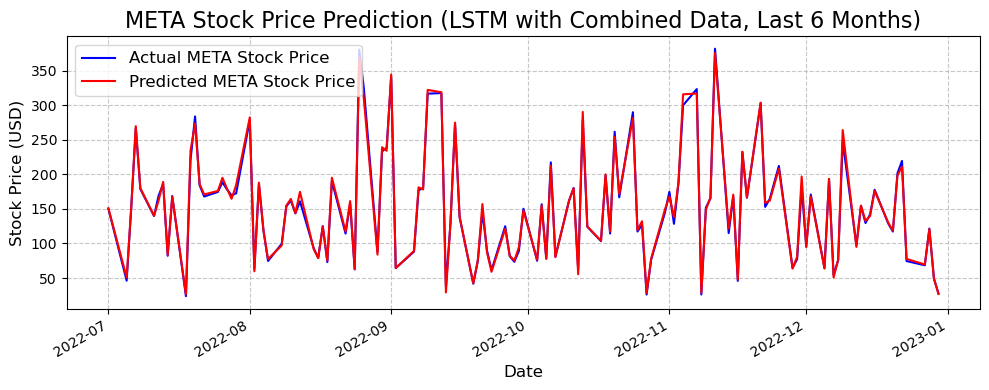


Mean Absolute Percentage Error (MAPE): 2.68%
Prediction Accuracy: 97.32%

Date range: 2022-07-01 to 2022-12-30
Number of trading days: 127


In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Assuming meta_data, real_stock_price_test, test_predictions are available from previous steps

# Get the dates for the test data
test_data_len = len(test_predictions)
test_dates = meta_data.index[-test_data_len:]

# Create a DataFrame with the test data for easier plotting
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (LSTM with Combined Data, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


# Calculate additional metrics
mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
accuracy = 100 - mape

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the date range
print(f"\nDate range: {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")
print(f"Number of trading days: {len(last_6_months)}")

C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_8328\4203194772.py:23: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_8328\4203194772.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


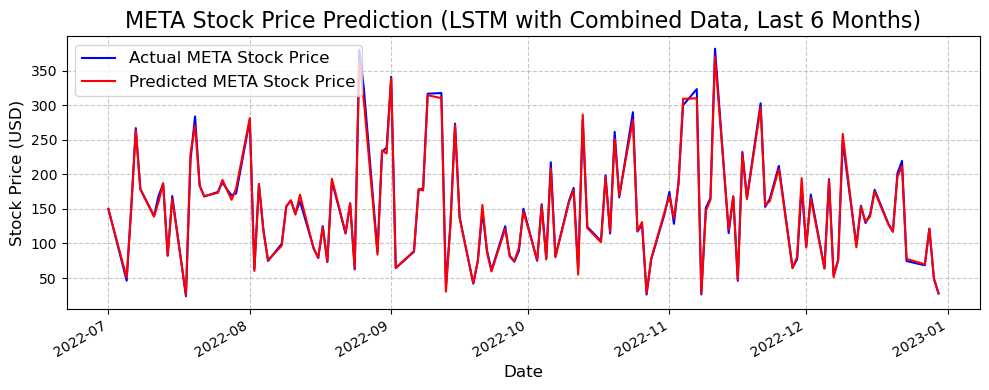


Mean Absolute Percentage Error (MAPE): 2.54%
Prediction Accuracy: 97.46%

Date range: 2022-07-01 to 2022-12-30
Number of trading days: 127


In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Assuming meta_data, real_stock_price_test, test_predictions are available from previous steps

# Get the dates for the test data
test_data_len = len(test_predictions)
test_dates = meta_data.index[-test_data_len:]

# Create a DataFrame with the test data for easier plotting
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (LSTM with Combined Data, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


# Calculate additional metrics
mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
accuracy = 100 - mape

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the date range
print(f"\nDate range: {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")
print(f"Number of trading days: {len(last_6_months)}")

In [ ]:
# Data Preparation and Evaluation

In [246]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle

# Fetch META stock data
meta_data = yf.download('META', start='2013-01-01', end='2023-01-01')

# Generate synthetic sentiment data
date_range = meta_data.index
num_samples = len(date_range)
sentiments = np.concatenate([
    np.ones(num_samples // 3),
    np.zeros(num_samples // 3),
    np.full(num_samples - 2 * (num_samples // 3), -1)
])
sentiments = shuffle(sentiments, random_state=42)

# Create sentiment DataFrame
df_sentiment = pd.DataFrame({
    'Date': date_range,
    'Sentiment': sentiments
})
df_sentiment.set_index('Date', inplace=True)

# Combine stock data with sentiment data
combined_data = meta_data.merge(df_sentiment, left_index=True, right_index=True)

# Data Preparation
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])  # All features except Target
    y.append(scaled_data[i, -1])  # Target

X, y = np.array(X), np.array(y)
X_rf = X.reshape(X.shape[0], -1)  # Flatten the 3D array to 2D

X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Model Building and Hyperparameter Tuning
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [10, 15],
    'max_features': [1, 'sqrt'],
    'bootstrap': [True]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train_rf, y_train)
print("GridSearchCV completed.")

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluation Function
def evaluate_model(model, X, y, scaler, set_name):
    predictions = model.predict(X)
    
    # Inverse transform predictions and actual values
    predictions = scaler.inverse_transform(
        np.hstack((np.zeros((len(predictions), scaler.n_features_in_ - 1)), predictions.reshape(-1, 1)))
    )[:, -1]
    real_prices = scaler.inverse_transform(
        np.hstack((np.zeros((len(y), scaler.n_features_in_ - 1)), y.reshape(-1, 1)))
    )[:, -1]
    
    # Calculate metrics
    mse = mean_squared_error(real_prices, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(real_prices, predictions)
    r2 = r2_score(real_prices, predictions)
    
    print(f"RF Model META Combined Data - {set_name} Set Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}\n")
    
    return predictions, real_prices

# Evaluate the model
train_predictions, train_real_prices = evaluate_model(best_rf_model, X_train_rf, y_train, scaler, "Training")
test_predictions, test_real_prices = evaluate_model(best_rf_model, X_test_rf, y_test, scaler, "Testing")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': np.tile(features, sequence_length),
    'importance': best_rf_model.feature_importances_
})
print("Top 10 Most Important Features:")
print(feature_importance.groupby('feature')['importance'].sum().sort_values(ascending=False).head(10))

# Save predictions for plotting
np.save('rf_test_predictions.npy', test_predictions)
np.save('rf_test_real_prices.npy', test_real_prices)

# Save the dates for the test set
test_dates = data.index[-len(test_predictions):]
np.save('rf_test_dates.npy', test_dates)


C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}
RF Model META Combined Data - Training Set Metrics:
Mean Squared Error (MSE): 44.8796
Root Mean Squared Error (RMSE): 6.6992
Mean Absolute Error (MAE): 4.2583
R-squared (R²): 0.9934

RF Model META Combined Data - Testing Set Metrics:
Mean Squared Error (MSE): 63.4119
Root Mean Squared Error (RMSE): 7.9632
Mean Absolute Error (MAE): 5.0429
R-squared (R²): 0.9905

Top 10 Most Important Features:
feature
High         0.304000
Close        0.294769
Open         0.215238
Low          0.185780
Volume       0.000193
Sentiment    0.000020
Name: importance, dtype: float64


In [4]:
# META Combined DAta LSTM Model - Monthly Actual vs Predicted Prices Plot

C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_15664\1239771939.py:26: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_15664\1239771939.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


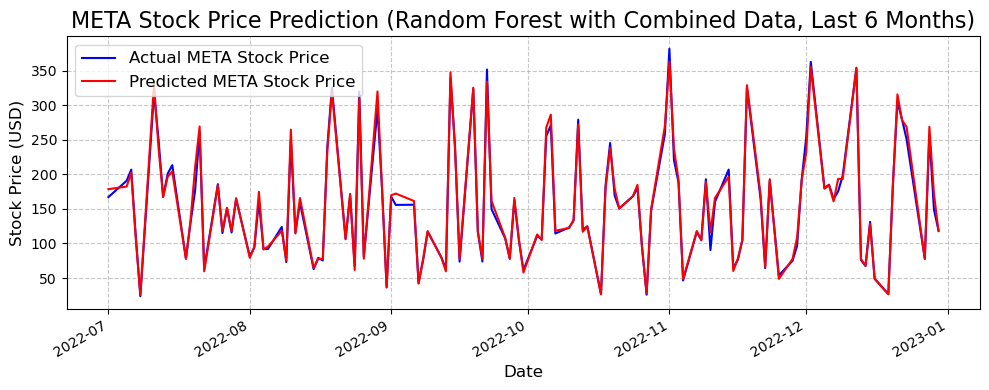


Mean Absolute Percentage Error (MAPE): 3.50%
Prediction Accuracy: 96.50%

Date range: 2022-07-01 to 2022-12-30
Number of trading days: 127


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the predictions and real prices
test_predictions = np.load('rf_test_predictions.npy')
test_real_prices = np.load('rf_test_real_prices.npy')


# Get the dates for the test data
test_data_len = len(test_predictions)
test_dates = meta_data.index[-test_data_len:]

# Create a DataFrame with the test data for easier plotting
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': test_real_prices,
    'Predicted': test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (Random Forest with Combined Data, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


# Calculate additional metrics
mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
accuracy = 100 - mape

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the date range
print(f"\nDate range: {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")
print(f"Number of trading days: {len(last_6_months)}")

# META Stock Hybrid Model Building (LSTM + RF) with Combined Data

In [251]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import randint

print("Starting data preparation...")

# Data Preparation
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])
    y.append(scaled_data[i, -1])

X, y = np.array(X), np.array(y)
X_lstm = X
X_rf = X.reshape(X.shape[0], -1)

# Split the data into trainng and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_lstm, X_test_lstm = X_train, X_test
X_train_rf, X_test_rf = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

print("Data preparation completed.")

print("Building and training LSTM model...")
# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(units=100, return_sequences=False))
model_lstm.add(Dense(units=50))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)
print("LSTM model training completed.")

print("Building and training Random Forest model...")
# Random Forest Model
param_dist = {
    'n_estimators': randint(100, 500), # Number of trees in the forest
    'max_depth': randint(10, 100),     # Maximum depth of of the 
    'min_samples_split': randint(2, 20), # Minimum number of  samples required to split an internal node 
    'min_samples_leaf': randint(1, 10),   # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                # Whether bootstrap_samples are use when building trees
}
# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_rf, y_train)
best_rf_model = random_search.best_estimator_
print("Random Forest model training completed.")

print("Making predictions...")
# Predictions
lstm_train_pred = model_lstm.predict(X_train_lstm, verbose=0).flatten()
lstm_test_pred = model_lstm.predict(X_test_lstm, verbose=0).flatten()
rf_train_pred = best_rf_model.predict(X_train_rf)
rf_test_pred = best_rf_model.predict(X_test_rf)

# Hybrid Model (weighted average)
def hybrid_predict(lstm_pred, rf_pred, alpha=0.6):
    return alpha * lstm_pred + (1 - alpha) * rf_pred

hybrid_train_pred = hybrid_predict(lstm_train_pred, rf_train_pred)
hybrid_test_pred = hybrid_predict(lstm_test_pred, rf_test_pred)

# Save predictions and data for evaluation
np.save('meta_hybrid_train_pred.npy', hybrid_train_pred)
np.save('meta_hybrid_test_pred.npy', hybrid_test_pred)
np.save('meta_y_train.npy', y_train)
np.save('meta_y_test.npy', y_test)
np.save('meta_test_dates.npy', data.index[-len(y_test):])

print("Model building and prediction completed. Data saved for evaluation.")

Starting data preparation...
Data preparation completed.
Building and training LSTM model...
Epoch 1/50
56/56 [==============================] - 28s 332ms/step - loss: 0.0103 - val_loss: 7.5819e-04
Epoch 2/50
56/56 [==============================] - 7s 117ms/step - loss: 7.0770e-04 - val_loss: 7.3984e-04
Epoch 3/50
56/56 [==============================] - 7s 118ms/step - loss: 6.5136e-04 - val_loss: 5.8593e-04
Epoch 4/50
56/56 [==============================] - 6s 115ms/step - loss: 6.3757e-04 - val_loss: 6.6243e-04
Epoch 5/50
56/56 [==============================] - 7s 117ms/step - loss: 6.0877e-04 - val_loss: 5.3967e-04
Epoch 6/50
56/56 [==============================] - 7s 119ms/step - loss: 5.4580e-04 - val_loss: 6.2366e-04
Epoch 7/50
56/56 [==============================] - 7s 119ms/step - loss: 5.5297e-04 - val_loss: 5.8827e-04
Epoch 8/50
56/56 [==============================] - 6s 115ms/step - loss: 5.4695e-04 - val_loss: 8.1543e-04
Epoch 9/50
56/56 [============================

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
93 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

Random Forest model training completed.
Making predictions...
Model building and prediction completed. Data saved for evaluation.


In [77]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import randint

print("Starting data preparation...")

# Data Preparation
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])
    y.append(scaled_data[i, -1])

X, y = np.array(X), np.array(y)
X_lstm = X
X_rf = X.reshape(X.shape[0], -1)

# Split the data into trainng and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_lstm, X_test_lstm = X_train, X_test
X_train_rf, X_test_rf = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

print("Data preparation completed.")

print("Building and training LSTM model...")
# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
print("LSTM model training completed.")

print("Building and training Random Forest model...")
# Random Forest Model
param_dist = {
    'n_estimators': (10, 20), # Number of trees in the forest
    'max_depth': (3, 5),     # Maximum depth of of the 
    'min_samples_split': (10, 15), # Minimum number of  samples required to split an internal node 
    'min_samples_leaf': (10, 15),   # Minimum number of samples required to be at a leaf node
    'max_features': [1,'sqrt',], # Number of features to consider when looking for the best split
    'bootstrap': [True,]                # Whether bootstrap_samples are use when building trees
}
# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_rf, y_train)
best_rf_model = random_search.best_estimator_
print("Random Forest model training completed.")

print("Making predictions...")
# Predictions
lstm_train_pred = model_lstm.predict(X_train_lstm, verbose=0).flatten()
lstm_test_pred = model_lstm.predict(X_test_lstm, verbose=0).flatten()
rf_train_pred = best_rf_model.predict(X_train_rf)
rf_test_pred = best_rf_model.predict(X_test_rf)

# Hybrid Model (weighted average)
def hybrid_predict(lstm_pred, rf_pred, alpha=0.6):
    return alpha * lstm_pred + (1 - alpha) * rf_pred

hybrid_train_pred = hybrid_predict(lstm_train_pred, rf_train_pred)
hybrid_test_pred = hybrid_predict(lstm_test_pred, rf_test_pred)

# Save predictions and data for evaluation
np.save('meta_hybrid_train_pred.npy', hybrid_train_pred)
np.save('meta_hybrid_test_pred.npy', hybrid_test_pred)
np.save('meta_y_train.npy', y_train)
np.save('meta_y_test.npy', y_test)
np.save('meta_test_dates.npy', data.index[-len(y_test):])

print("Model building and prediction completed. Data saved for evaluation.")

Starting data preparation...
Data preparation completed.
Building and training LSTM model...
Epoch 1/20
56/56 [==============================] - 9s 58ms/step - loss: 0.0065 - val_loss: 6.8603e-04
Epoch 2/20
56/56 [==============================] - 2s 36ms/step - loss: 7.1691e-04 - val_loss: 6.8574e-04
Epoch 3/20
56/56 [==============================] - 2s 35ms/step - loss: 6.6183e-04 - val_loss: 5.8296e-04
Epoch 4/20
56/56 [==============================] - 2s 43ms/step - loss: 6.3533e-04 - val_loss: 5.5572e-04
Epoch 5/20
56/56 [==============================] - 2s 37ms/step - loss: 6.7277e-04 - val_loss: 5.2498e-04
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 5.9125e-04 - val_loss: 5.2883e-04
Epoch 7/20
56/56 [==============================] - 2s 41ms/step - loss: 5.3905e-04 - val_loss: 0.0010
Epoch 8/20
56/56 [==============================] - 2s 43ms/step - loss: 5.7935e-04 - val_loss: 4.6039e-04
Epoch 9/20
56/56 [==============================] - 2s 42ms

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest model training completed.
Making predictions...
Model building and prediction completed. Data saved for evaluation.


In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

print("Starting model evaluation...")

# Load saved data
hybrid_train_pred = np.load('meta_hybrid_train_pred.npy')
hybrid_test_pred = np.load('meta_hybrid_test_pred.npy')
y_train = np.load('meta_y_train.npy')
y_test = np.load('meta_y_test.npy')


# Inverse transform
def inverse_transform(data):
    dummy = np.zeros((len(data), scaler.n_features_in_))
    dummy[:, -1] = data
    return scaler.inverse_transform(dummy)[:, -1]

y_train_inv = inverse_transform(y_train)
y_test_inv = inverse_transform(y_test)
hybrid_train_pred_inv = inverse_transform(hybrid_train_pred)
hybrid_test_pred_inv = inverse_transform(hybrid_test_pred)

# Evaluate Hybrid Model
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"META Hybrid Combined Data - {set_name} Set Metrics:")
    print(f"META Hybrid Combined Data - Mean Squared Error (MSE): {mse}")
    print(f"META Hybrid Combined Data - Root Mean Squared Error (RMSE): {rmse}")
    print(f"META Hybrid Combined Data - Mean Absolute Error (MAE): {mae}")
    print(f"META Hybrid Combined Data - R-squared (R²): {r2}\n")

print("Evaluating model...")
evaluate_model(y_train_inv, hybrid_train_pred_inv, "Training")
evaluate_model(y_test_inv, hybrid_test_pred_inv, "Testing")

print("Model evaluation completed.")

# Save the inverse transformed predictions for plotting
np.save('meta_hybrid_test_pred_inv.npy', hybrid_test_pred_inv)
np.save('meta_y_test_inv.npy', y_test_inv)

Starting model evaluation...
Evaluating model...
META Hybrid Combined Data - Training Set Metrics:
META Hybrid Combined Data - Mean Squared Error (MSE): 4.1857888240183065
META Hybrid Combined Data - Root Mean Squared Error (RMSE): 2.04592004340793
META Hybrid Combined Data - Mean Absolute Error (MAE): 1.3161492364891278
META Hybrid Combined Data - R-squared (R²): 0.9964910876631897

META Hybrid Combined Data - Testing Set Metrics:
META Hybrid Combined Data - Mean Squared Error (MSE): 5.8594522135288765
META Hybrid Combined Data - Root Mean Squared Error (RMSE): 2.420630540485036
META Hybrid Combined Data - Mean Absolute Error (MAE): 1.5511200024337606
META Hybrid Combined Data - R-squared (R²): 0.9949816794994943

Model evaluation completed.


In [ ]:
# META Stock Hybrid Model Evaluation

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

print("Starting model evaluation...")

# Load saved data
hybrid_train_pred = np.load('meta_hybrid_train_pred.npy')
hybrid_test_pred = np.load('meta_hybrid_test_pred.npy')
y_train = np.load('meta_y_train.npy')
y_test = np.load('meta_y_test.npy')


# Inverse transform
def inverse_transform(data):
    dummy = np.zeros((len(data), scaler.n_features_in_))
    dummy[:, -1] = data
    return scaler.inverse_transform(dummy)[:, -1]

y_train_inv = inverse_transform(y_train)
y_test_inv = inverse_transform(y_test)
hybrid_train_pred_inv = inverse_transform(hybrid_train_pred)
hybrid_test_pred_inv = inverse_transform(hybrid_test_pred)

# Evaluate Hybrid Model
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"META Hybrid Combined Data - {set_name} Set Metrics:")
    print(f"META Hybrid Combined Data - Mean Squared Error (MSE): {mse}")
    print(f"META Hybrid Combined Data - Root Mean Squared Error (RMSE): {rmse}")
    print(f"META Hybrid Combined Data - Mean Absolute Error (MAE): {mae}")
    print(f"META Hybrid Combined Data - R-squared (R²): {r2}\n")

print("Evaluating model...")
evaluate_model(y_train_inv, hybrid_train_pred_inv, "Training")
evaluate_model(y_test_inv, hybrid_test_pred_inv, "Testing")

print("Model evaluation completed.")

# Save the inverse transformed predictions for plotting
np.save('meta_hybrid_test_pred_inv.npy', hybrid_test_pred_inv)
np.save('meta_y_test_inv.npy', y_test_inv)

Starting model evaluation...
Evaluating model...
META Hybrid Combined Data - Training Set Metrics:
META Hybrid Combined Data - Mean Squared Error (MSE): 16.616451682108803
META Hybrid Combined Data - Root Mean Squared Error (RMSE): 4.076328210793238
META Hybrid Combined Data - Mean Absolute Error (MAE): 2.6027531138232285
META Hybrid Combined Data - R-squared (R²): 0.997568501650961

META Hybrid Combined Data - Testing Set Metrics:
META Hybrid Combined Data - Mean Squared Error (MSE): 37.77812986437053
META Hybrid Combined Data - Root Mean Squared Error (RMSE): 6.146391613326515
META Hybrid Combined Data - Mean Absolute Error (MAE): 3.875317611904546
META Hybrid Combined Data - R-squared (R²): 0.9943293849300717

Model evaluation completed.


In [252]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

print("Starting model evaluation...")

# Load saved data
hybrid_train_pred = np.load('meta_hybrid_train_pred.npy')
hybrid_test_pred = np.load('meta_hybrid_test_pred.npy')
y_train = np.load('meta_y_train.npy')
y_test = np.load('meta_y_test.npy')


# Inverse transform function
def inverse_transform(data, scaler):
    dummy = np.zeros((len(data), scaler.n_features_in_))
    dummy[:, -1] = data
    return scaler.inverse_transform(dummy)[:, -1]

# Inverse transform the predictions and actual values
y_train_inv = inverse_transform(y_train, scaler)
y_test_inv = inverse_transform(y_test, scaler)
hybrid_train_pred_inv = inverse_transform(hybrid_train_pred, scaler)
hybrid_test_pred_inv = inverse_transform(hybrid_test_pred, scaler)

# Evaluate the Hybrid Model
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Hybrid Model META Combined Data - {set_name} Set Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}\n")

print("Evaluating model...")
evaluate_model(y_train_inv, hybrid_train_pred_inv, "Training")
evaluate_model(y_test_inv, hybrid_test_pred_inv, "Testing")

print("Model evaluation completed.")

# Save the inverse-transformed predictions for future use or plotting
np.save('meta_hybrid_test_pred_inv.npy', hybrid_test_pred_inv)
np.save('meta_y_test_inv.npy', y_test_inv)


Starting model evaluation...
Evaluating model...
Hybrid Model META Combined Data - Training Set Metrics:
Mean Squared Error (MSE): 15.5863
Root Mean Squared Error (RMSE): 3.9480
Mean Absolute Error (MAE): 2.5901
R-squared (R²): 0.9977

Hybrid Model META Combined Data - Testing Set Metrics:
Mean Squared Error (MSE): 38.7448
Root Mean Squared Error (RMSE): 6.2245
Mean Absolute Error (MAE): 3.9890
R-squared (R²): 0.9942

Model evaluation completed.


In [11]:
# META Stock Hybrid Model - Plot

C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\49882254.py:23: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\49882254.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


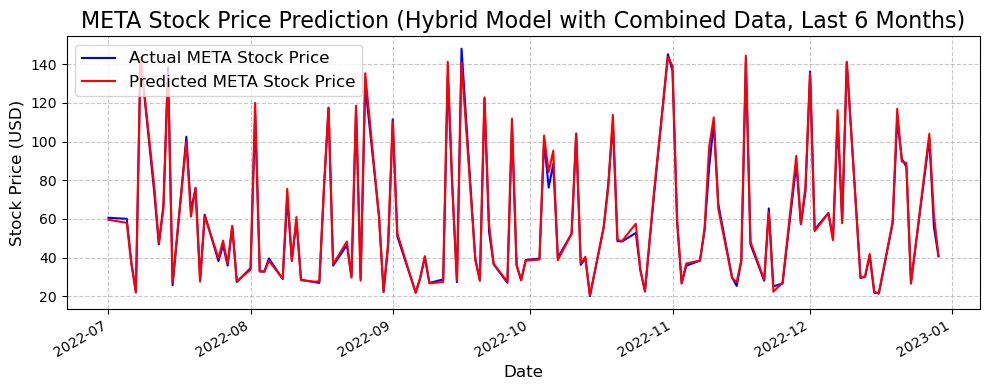


Mean Absolute Percentage Error (MAPE): 2.51%
Prediction Accuracy: 97.49%

Date range: 2022-07-01 to 2022-12-29
Number of trading days: 126


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the saved data
test_predictions = np.load('meta_hybrid_test_pred_inv.npy')
test_actual = np.load('meta_y_test_inv.npy')
test_dates = np.load('meta_test_dates.npy', allow_pickle=True)

# Create a DataFrame with the test data for easier plotting
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': test_actual,
    'Predicted': test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (Hybrid Model with Combined Data, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

# Calculate additional metrics for the last 6 months
mse = mean_squared_error(last_6_months['Actual'], last_6_months['Predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(last_6_months['Actual'], last_6_months['Predicted'])
r2 = r2_score(last_6_months['Actual'], last_6_months['Predicted'])

# Calculate additional metrics
mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
accuracy = 100 - mape

print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the date range
print(f"\nDate range: {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")
print(f"Number of trading days: {len(last_6_months)}")

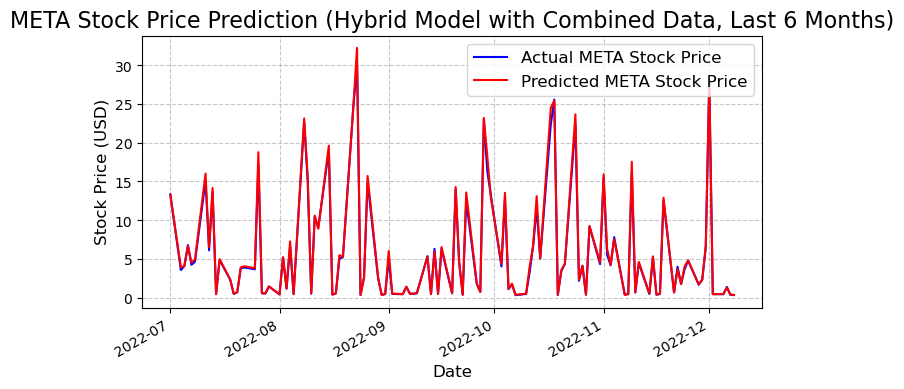

Y-axis limits: -1.258107301986489, 33.828753357451895


In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'last_6_months' DataFrame contains the sentiment data plot details.
# Plot the sentiment data to extract the limits
plt.figure(figsize=(8, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (Hybrid Model with Combined Data, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

# Extract the Y-axis limits
y_min, y_max = plt.ylim()

plt.show()

print(f"Y-axis limits: {y_min}, {y_max}")


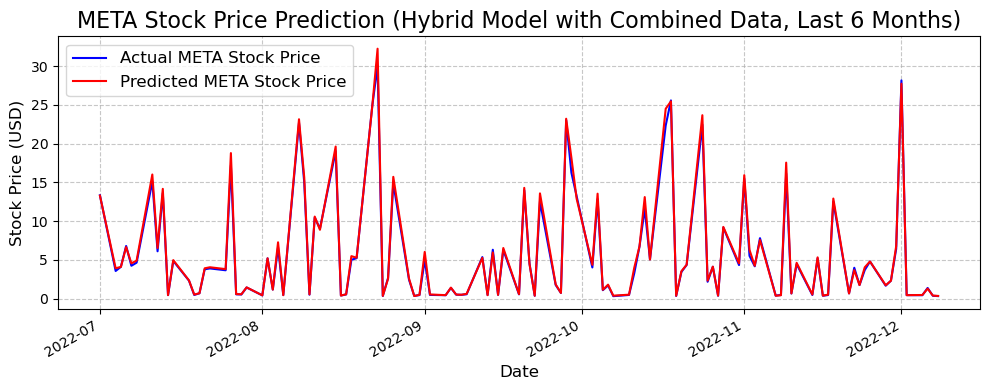

In [71]:
# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (Hybrid Model with Combined Data, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Capture the Y-axis limits
y_min, y_max = plt.ylim()

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\697848793.py:24: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\697848793.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


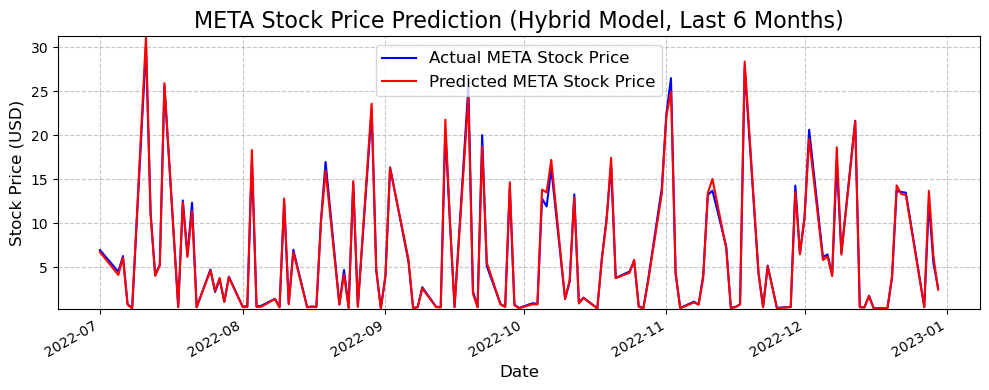

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have the following from your previous code:
# - real_stock_price_test: the actual stock prices for the test set
# - hybrid_test_predictions: the predicted stock prices by the hybrid model
# - meta_data: the original META stock data which contains the date information

# Create a DataFrame with the test data for easier plotting
test_dates = meta_data.index[-len(real_stock_price_test):]  # Get corresponding dates for test set
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': hybrid_test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Define the same Y-axis limits based on the combined data or a predefined range
y_min = min(last_6_months['Actual'].min(), last_6_months['Predicted'].min())  # Set to the min of both values
y_max = max(last_6_months['Actual'].max(), last_6_months['Predicted'].max())  # Set to the max of both values

# Create the plot for the hybrid model
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (Hybrid Model, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the Y-axis limits
plt.ylim(y_min, y_max)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\2286380962.py:23: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\2286380962.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


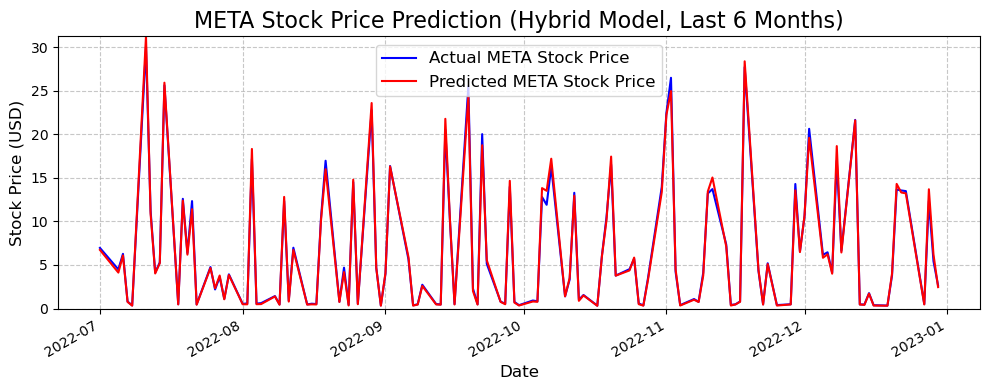

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have the following from your previous code:
# - real_stock_price_test: the actual stock prices for the test set
# - hybrid_test_predictions: the predicted stock prices by the hybrid model
# - meta_data: the original META stock data which contains the date information

# Create a DataFrame with the test data for easier plotting
test_dates = meta_data.index[-len(real_stock_price_test):]  # Get corresponding dates for test set
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': hybrid_test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Find the maximum Y value from both datasets
y_max_combined = max(last_6_months['Actual'].max(), last_6_months['Predicted'].max())

# Create the plot for the hybrid model
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (Hybrid Model, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the Y-axis limits to match the maximum value
plt.ylim(0, y_max_combined)

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


In [91]:
print("Actual Stock Price Test Data - Min:", np.min(real_stock_price_test), "Max:", np.max(real_stock_price_test))
print("Hybrid Model Predictions - Min:", np.min(hybrid_test_predictions), "Max:", np.max(hybrid_test_predictions))


Actual Stock Price Test Data - Min: 0.33524999022483826 Max: 31.95599937438965
Hybrid Model Predictions - Min: 0.3122378537295679 Max: 31.255530581680244


C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\321595788.py:23: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_4052\321595788.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


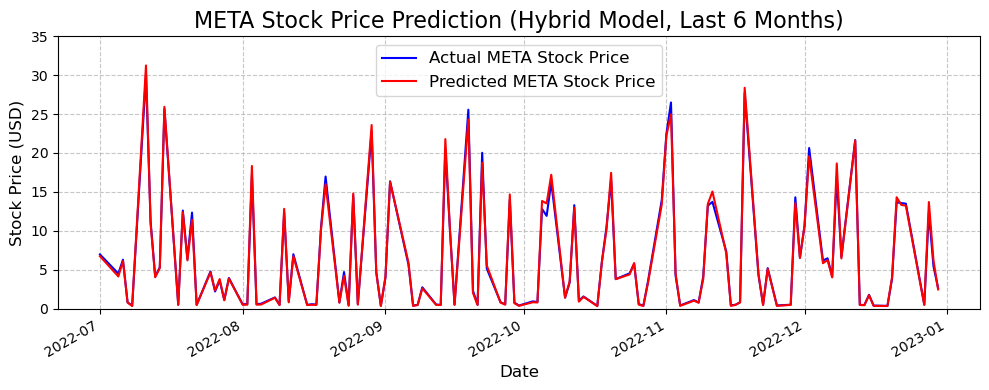

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have the following from your previous code:
# - real_stock_price_test: the actual stock prices for the test set
# - hybrid_test_predictions: the predicted stock prices by the hybrid model
# - meta_data: the original META stock data which contains the date information

# Create a DataFrame with the test data for easier plotting
test_dates = meta_data.index[-len(real_stock_price_test):]  # Get corresponding dates for test set
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': hybrid_test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot for the hybrid model
plt.figure(figsize=(10, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual META Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted META Stock Price', color='red')

# Customize the plot
plt.title('META Stock Price Prediction (Hybrid Model, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the Y-axis limits based on your data's range
plt.ylim(0, 35)  # Slightly above the max value to ensure all data points are visible

# Set the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


# PREDICTION OF STOCK PRICE TREND FOR NVIDIA

In [13]:
# NVIDIA Stock Data Fetching

In [61]:
import yfinance as yf
import pandas as pd

# Fetch NVIDIA stock data
print("Fetching NVIDIA stock data...")
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Display the head of the stock data
print("\nNVIDIA Stock Data:")
print(nvidia_data.head())



C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Fetching NVIDIA stock data...

NVIDIA Stock Data:
               Open     High      Low    Close  Adj Close     Volume
Date                                                                
2013-01-02  0.31400  0.31825  0.31275  0.31800   0.293560  478836000
2013-01-03  0.31800  0.32175  0.31450  0.31825   0.293791  298888000
2013-01-04  0.31875  0.32975  0.31775  0.32875   0.303484  524968000
2013-01-07  0.32850  0.32950  0.31700  0.31925   0.294714  610732000
2013-01-08  0.32000  0.32100  0.31000  0.31225   0.288252  466424000


# Exploratory Data Analysis and Visualization

In [21]:
# Display basic information about the dataset
print("\nDataset Information:")
print(nvidia_data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(nvidia_data.describe())

# Check for any missing values
print("\nMissing Values:")
print(nvidia_data.isnull().sum())

print("\nNVIDIA stock data fetching completed.")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB
None

Summary Statistics:
              Open         High          Low        Close    Adj Close        Volume
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000  2.518000e+03
mean      6.463861     6.584726     6.334222     6.463488     6.433396  4.463163e+08
std       7.367876     7.522838     7.193251     7.360858     7.357802  2.585954e+08
min       0.299000     0.303500     0.297750     0.299500     0.276482  4.564400e+07
25%       0.555625     0.561250

In [16]:
# NVIDIA Stock Price Visualization

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


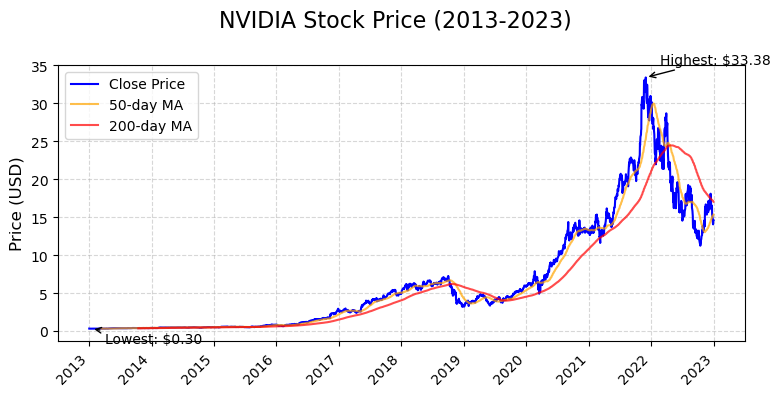

Starting price: $0.32
Ending price: $14.61
Highest price: $33.38 on 2021-11-29
Lowest price: $0.30 on 2013-01-15
Total return: 4495.60%


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

# Fetch NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))
fig.suptitle('NVIDIA Stock Price (2013-2023)', fontsize=16)

# Plot closing price
ax.plot(nvidia_data.index, nvidia_data['Close'], label='Close Price', color='blue')

# Add 50-day and 200-day moving averages
nvidia_data['MA50'] = nvidia_data['Close'].rolling(window=50).mean()
nvidia_data['MA200'] = nvidia_data['Close'].rolling(window=200).mean()
ax.plot(nvidia_data.index, nvidia_data['MA50'], label='50-day MA', color='orange', alpha=0.7)
ax.plot(nvidia_data.index, nvidia_data['MA200'], label='200-day MA', color='red', alpha=0.7)

ax.set_ylabel('Price (USD)', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.5)

# Set x-axis to show years
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Rotate and align the tick labels so they look better
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add annotations for key events or highest/lowest points
highest_price = nvidia_data['Close'].max()
highest_date = nvidia_data['Close'].idxmax()
lowest_price = nvidia_data['Close'].min()
lowest_date = nvidia_data['Close'].idxmin()

ax.annotate(f'Highest: ${highest_price:.2f}', 
            xy=(highest_date, highest_price), 
            xytext=(10, 10), 
            textcoords='offset points', 
            arrowprops=dict(arrowstyle='->'))

ax.annotate(f'Lowest: ${lowest_price:.2f}', 
            xy=(lowest_date, lowest_price), 
            xytext=(10, -10), 
            textcoords='offset points', 
            arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()

# Print some additional statistics
print(f"Starting price: ${nvidia_data['Close'].iloc[0]:.2f}")
print(f"Ending price: ${nvidia_data['Close'].iloc[-1]:.2f}")
print(f"Highest price: ${highest_price:.2f} on {highest_date.date()}")
print(f"Lowest price: ${lowest_price:.2f} on {lowest_date.date()}")
print(f"Total return: {((nvidia_data['Close'].iloc[-1] / nvidia_data['Close'].iloc[0]) - 1) * 100:.2f}%")

In [27]:
# NVIDIA Trading Volume Visualization 

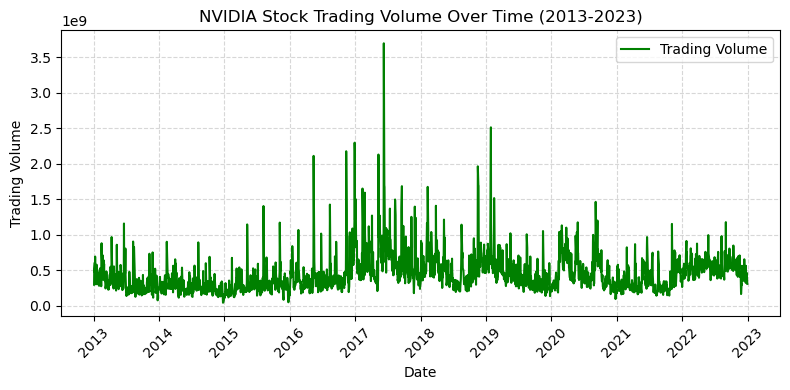

In [66]:
import matplotlib.pyplot as plt

# Plot the trading volume over time
plt.figure(figsize=(8, 4))
plt.plot(nvidia_data.index, nvidia_data['Volume'], color='green', label='Trading Volume')
plt.title('NVIDIA Stock Trading Volume Over Time (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


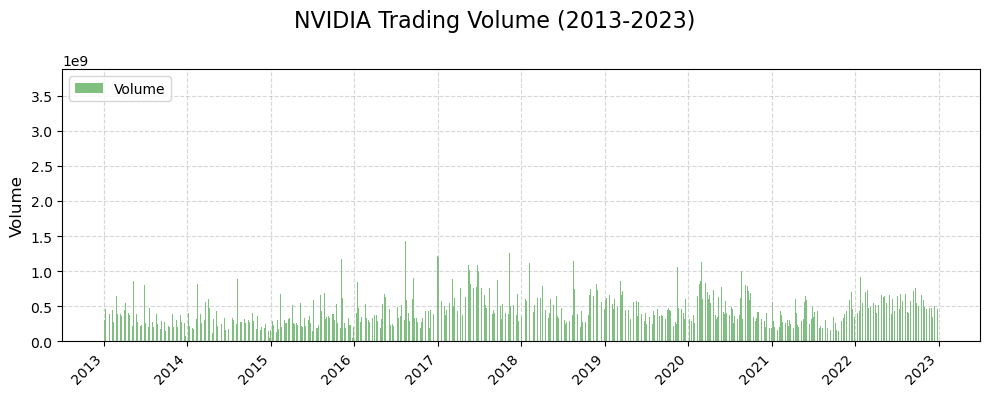

Average daily volume: 446316300
Highest volume: 3692928000 on 2017-06-09
Lowest volume: 45644000 on 2014-12-24


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

# Fetch NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('NVIDIA Trading Volume (2013-2023)', fontsize=16)

# Plot volume
ax.bar(nvidia_data.index, nvidia_data['Volume'], label='Volume', color='green', alpha=0.5)
ax.set_ylabel('Volume', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.5)

# Set x-axis to show years
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Rotate and align the tick labels so they look better
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print some volume statistics
print(f"Average daily volume: {nvidia_data['Volume'].mean():.0f}")
print(f"Highest volume: {nvidia_data['Volume'].max():.0f} on {nvidia_data['Volume'].idxmax().date()}")
print(f"Lowest volume: {nvidia_data['Volume'].min():.0f} on {nvidia_data['Volume'].idxmin().date()}")

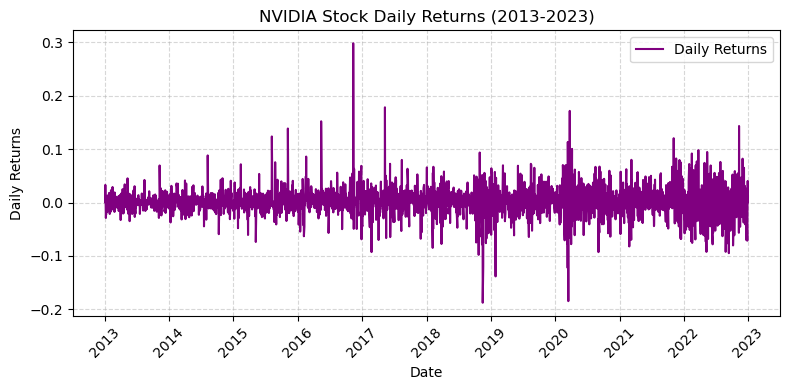


NVIDIA Stock Daily Returns:
            Daily Returns
Date                     
2013-01-03       0.000786
2013-01-04       0.032993
2013-01-07      -0.028897
2013-01-08      -0.021926
2013-01-09      -0.022418


In [62]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the daily returns
nvidia_data['Daily Returns'] = nvidia_data['Close'].pct_change()

# Drop any NaN values that might result from the pct_change calculation
nvidia_data.dropna(inplace=True)

# Plot the daily returns
plt.figure(figsize=(8, 4))
plt.plot(nvidia_data.index, nvidia_data['Daily Returns'], color='purple', label='Daily Returns')
plt.title('NVIDIA Stock Daily Returns (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Display the head of the daily returns
print("\nNVIDIA Stock Daily Returns:")
print(nvidia_data[['Daily Returns']].head())


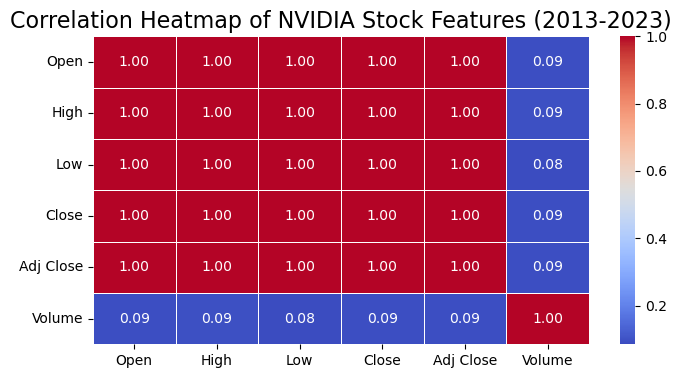

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = nvidia_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of NVIDIA Stock Features (2013-2023)', fontsize=16)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


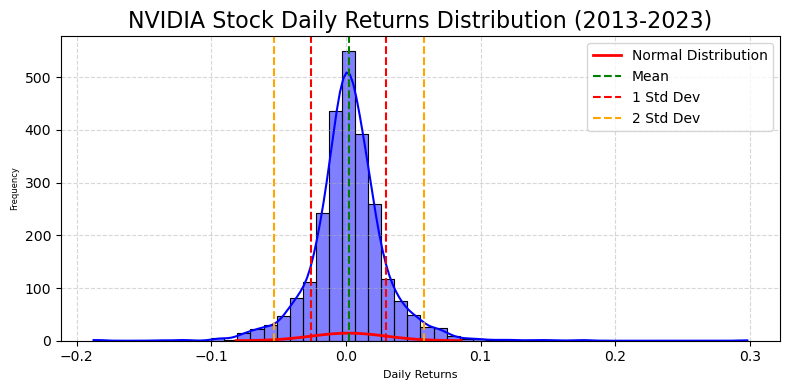

NVIDIA Stock Daily Returns Statistics (2013-2023):
Mean daily return: 0.0019
Median daily return: 0.0019
Standard deviation of daily returns: 0.0279
Skewness: 0.4975
Kurtosis: 9.7990

Annualized return: 0.4808
Annualized volatility: 0.4428

95% Value at Risk: 0.0411
99% Value at Risk: 0.0724

Shapiro-Wilk test p-value: 0.0000
The distribution is likely not normal.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats

# Fetch NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Calculate daily returns
nvidia_data['Daily_Return'] = nvidia_data['Close'].pct_change()

# Create the plot
plt.figure(figsize=(8, 4))

# Plot the histogram of daily returns
sns.histplot(nvidia_data['Daily_Return'].dropna(), bins=50, kde=True, color='blue')

# Add a normal distribution line for comparison
mu, sigma = stats.norm.fit(nvidia_data['Daily_Return'].dropna())
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normal Distribution')

plt.title('NVIDIA Stock Daily Returns Distribution (2013-2023)', fontsize=16)
plt.xlabel('Daily Returns', fontsize=8)
plt.ylabel('Frequency', fontsize=6)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Add vertical lines for mean and standard deviations
plt.axvline(x=mu, color='green', linestyle='--', label='Mean')
plt.axvline(x=mu + sigma, color='red', linestyle='--', label='1 Std Dev')
plt.axvline(x=mu - sigma, color='red', linestyle='--')
plt.axvline(x=mu + 2*sigma, color='orange', linestyle='--', label='2 Std Dev')
plt.axvline(x=mu - 2*sigma, color='orange', linestyle='--')

plt.legend()
plt.tight_layout()
plt.show()

# Calculate and print statistics
print("NVIDIA Stock Daily Returns Statistics (2013-2023):")
print(f"Mean daily return: {nvidia_data['Daily_Return'].mean():.4f}")
print(f"Median daily return: {nvidia_data['Daily_Return'].median():.4f}")
print(f"Standard deviation of daily returns: {nvidia_data['Daily_Return'].std():.4f}")
print(f"Skewness: {nvidia_data['Daily_Return'].skew():.4f}")
print(f"Kurtosis: {nvidia_data['Daily_Return'].kurtosis():.4f}")

# Calculate and print annualized returns and volatility
trading_days = 252  # Approximate number of trading days in a year
annualized_return = nvidia_data['Daily_Return'].mean() * trading_days
annualized_volatility = nvidia_data['Daily_Return'].std() * np.sqrt(trading_days)
print(f"\nAnnualized return: {annualized_return:.4f}")
print(f"Annualized volatility: {annualized_volatility:.4f}")

# Calculate and print value at risk (VaR)
var_95 = np.percentile(nvidia_data['Daily_Return'].dropna(), 5)
var_99 = np.percentile(nvidia_data['Daily_Return'].dropna(), 1)
print(f"\n95% Value at Risk: {-var_95:.4f}")
print(f"99% Value at Risk: {-var_99:.4f}")

# Perform Shapiro-Wilk test for normality
_, p_value = stats.shapiro(nvidia_data['Daily_Return'].dropna())
print(f"\nShapiro-Wilk test p-value: {p_value:.4f}")
print("The distribution is likely not normal." if p_value < 0.05 else "The distribution may be normal.")

In [33]:
# NVIDIA Stock Analysis and Correlation

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


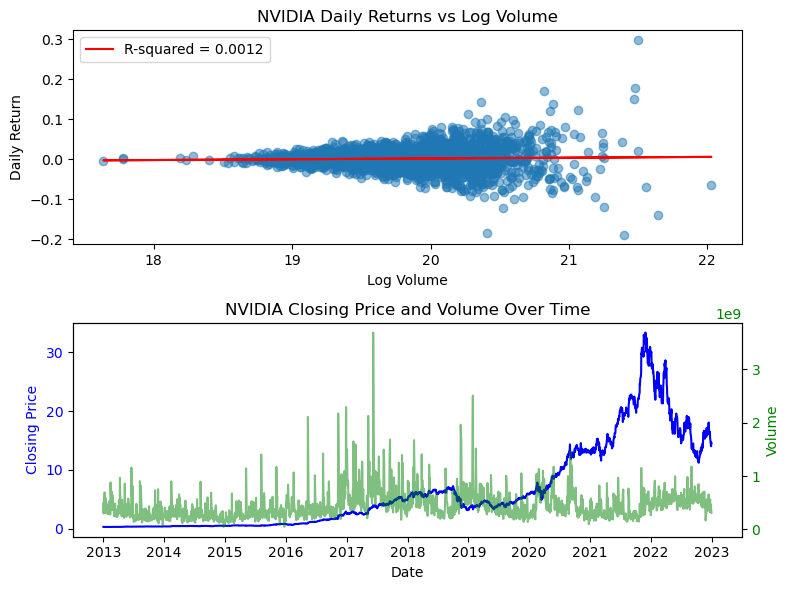

Correlation Matrix:
                 Close    Volume  Daily_Return  Log_Volume
Close         1.000000  0.089862      0.001252    0.152101
Volume        0.089862  1.000000      0.034492    0.917497
Daily_Return  0.001252  0.034492      1.000000    0.035007
Log_Volume    0.152101  0.917497      0.035007    1.000000

Additional Statistics:
Correlation between Daily Returns and Volume: 0.0345
Correlation between Daily Returns and Log Volume: 0.0350
Correlation between Closing Price and Volume: 0.0899

Pearson Correlation Test (Daily Returns vs Log Volume):
Correlation Coefficient: 0.0350
P-value: 0.0791

Number of data points used in the analysis: 2517


In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Fetch 10 years of NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Calculate daily returns and log volume
nvidia_data['Daily_Return'] = nvidia_data['Close'].pct_change()
nvidia_data['Log_Volume'] = np.log(nvidia_data['Volume'])

# Remove any rows with NaN values
nvidia_data_clean = nvidia_data.dropna()

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot 1: Scatter plot of Daily Returns vs Log Volume
ax1.scatter(nvidia_data_clean['Log_Volume'], nvidia_data_clean['Daily_Return'], alpha=0.5)
ax1.set_title('NVIDIA Daily Returns vs Log Volume')
ax1.set_xlabel('Log Volume')
ax1.set_ylabel('Daily Return')

# Calculate and plot the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(nvidia_data_clean['Log_Volume'], nvidia_data_clean['Daily_Return'])
line = slope * nvidia_data_clean['Log_Volume'] + intercept
ax1.plot(nvidia_data_clean['Log_Volume'], line, color='red', label=f'R-squared = {r_value**2:.4f}')
ax1.legend()

# Plot 2: Volume and Closing Price over time
ax2.set_title('NVIDIA Closing Price and Volume Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Closing Price', color='blue')
ax2.plot(nvidia_data.index, nvidia_data['Close'], color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax2.twinx()
ax3.set_ylabel('Volume', color='green')
ax3.plot(nvidia_data.index, nvidia_data['Volume'], color='green', alpha=0.5)
ax3.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()

# Calculate correlations
correlation_matrix = nvidia_data_clean[['Close', 'Volume', 'Daily_Return', 'Log_Volume']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate and print additional statistics
print("\nAdditional Statistics:")
print(f"Correlation between Daily Returns and Volume: {correlation_matrix.loc['Daily_Return', 'Volume']:.4f}")
print(f"Correlation between Daily Returns and Log Volume: {correlation_matrix.loc['Daily_Return', 'Log_Volume']:.4f}")
print(f"Correlation between Closing Price and Volume: {correlation_matrix.loc['Close', 'Volume']:.4f}")

# Perform a statistical test for the correlation between Daily Returns and Log Volume
correlation_coefficient, p_value = stats.pearsonr(nvidia_data_clean['Daily_Return'], nvidia_data_clean['Log_Volume'])
print(f"\nPearson Correlation Test (Daily Returns vs Log Volume):")
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Print the number of data points used in the analysis
print(f"\nNumber of data points used in the analysis: {len(nvidia_data_clean)}")

In [36]:
# NVIDIA Closing Price and Moving Average Visualization

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


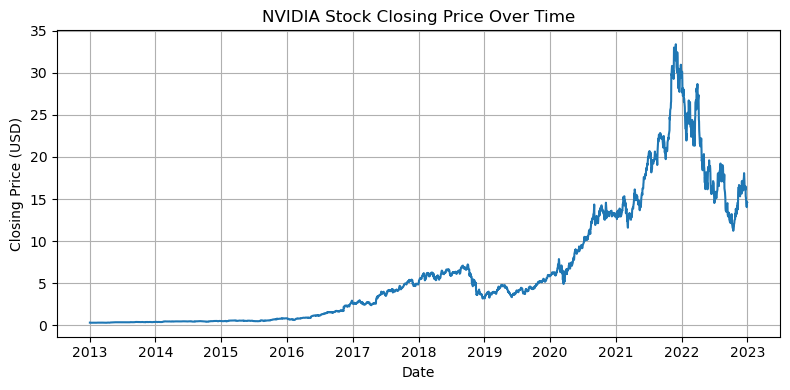

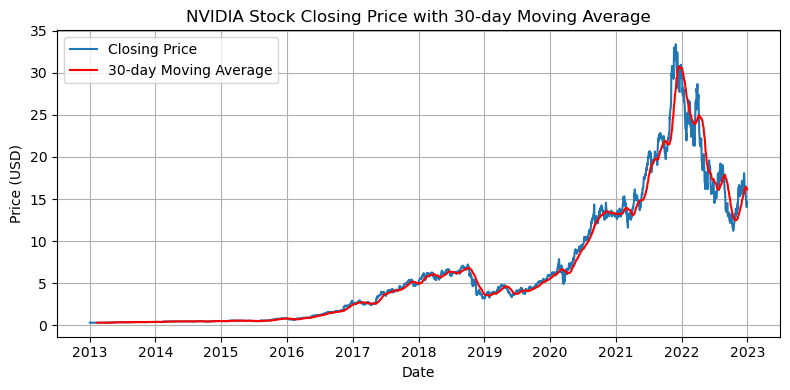


NVIDIA Stock Statistics:
Starting Price: $0.32
Ending Price: $14.61
Lowest Price: $0.30
Highest Price: $33.38
Average Price: $6.46
Price Range: $33.08
Total Return: 4495.60%


In [38]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# 1. Closing Price Over Time
plt.figure(figsize=(8, 4))
plt.plot(nvidia_data.index, nvidia_data['Close'])
plt.title('NVIDIA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the 30-day moving average
nvidia_data['MA30'] = nvidia_data['Close'].rolling(window=30).mean()

# 2. Closing Price with 30-day Moving Average
plt.figure(figsize=(8, 4))
plt.plot(nvidia_data.index, nvidia_data['Close'], label='Closing Price')
plt.plot(nvidia_data.index, nvidia_data['MA30'], label='30-day Moving Average', color='red')
plt.title('NVIDIA Stock Closing Price with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print some statistics
print("\nNVIDIA Stock Statistics:")
print(f"Starting Price: ${nvidia_data['Close'].iloc[0]:.2f}")
print(f"Ending Price: ${nvidia_data['Close'].iloc[-1]:.2f}")
print(f"Lowest Price: ${nvidia_data['Close'].min():.2f}")
print(f"Highest Price: ${nvidia_data['Close'].max():.2f}")
print(f"Average Price: ${nvidia_data['Close'].mean():.2f}")
print(f"Price Range: ${nvidia_data['Close'].max() - nvidia_data['Close'].min():.2f}")
print(f"Total Return: {((nvidia_data['Close'].iloc[-1] / nvidia_data['Close'].iloc[0]) - 1) * 100:.2f}%")

In [39]:
# NVIDIA Stock Performance and Returns Analysis

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


7. NVIDIA Stock Performance and Returns Analysis:


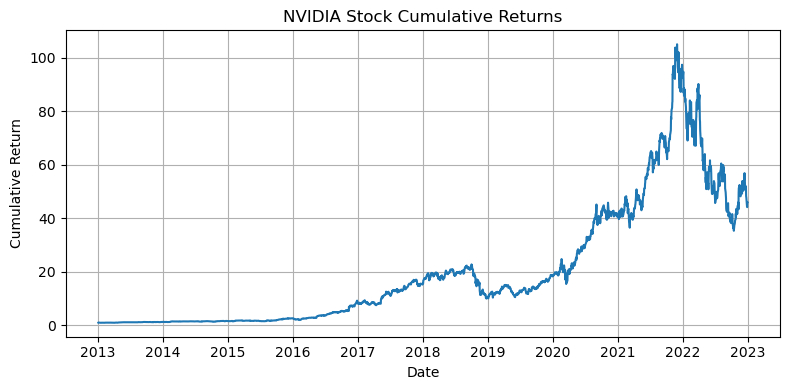


Annual Returns:
Date
2013    0.259434
2014    0.251561
2015    0.643890
2016    2.238471
2017    0.812816
2018   -0.310078
2019    0.762547
2020    1.219295
2021    1.252853
2022   -0.503111
Name: Daily Return, dtype: float64

Sharpe Ratio: 1.0408


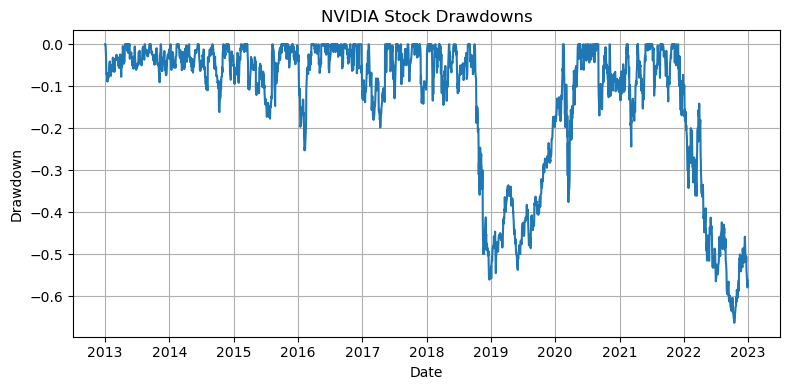


Maximum Drawdown: -66.3621%

Total Return: 4495.5977%
Annualized Return: 46.6784%
Annualized Volatility: 44.2754%
Risk-Adjusted Return (Return/Volatility): 1.0543


In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

print("7. NVIDIA Stock Performance and Returns Analysis:")

# Calculate daily returns
nvidia_data['Daily Return'] = nvidia_data['Close'].pct_change()

# Calculate cumulative returns
nvidia_data['Cumulative Return'] = (1 + nvidia_data['Daily Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(8, 4))
plt.plot(nvidia_data.index, nvidia_data['Cumulative Return'])
plt.title('NVIDIA Stock Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print annual returns
annual_returns = nvidia_data['Daily Return'].groupby(nvidia_data.index.year).apply(lambda x: (1 + x).prod() - 1)
print("\nAnnual Returns:")
print(annual_returns)

# Calculate and print risk-adjusted returns (Sharpe Ratio)
risk_free_rate = 0.02  # Assume a 2% risk-free rate
excess_returns = nvidia_data['Daily Return'] - risk_free_rate/252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()
print(f"\nSharpe Ratio: {sharpe_ratio:.4f}")

# Calculate drawdowns
nvidia_data['Peak'] = nvidia_data['Close'].cummax()
nvidia_data['Drawdown'] = (nvidia_data['Close'] - nvidia_data['Peak']) / nvidia_data['Peak']

# Plot drawdowns
plt.figure(figsize=(8, 4))
plt.plot(nvidia_data.index, nvidia_data['Drawdown'])
plt.title('NVIDIA Stock Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print maximum drawdown
max_drawdown = nvidia_data['Drawdown'].min()
print(f"\nMaximum Drawdown: {max_drawdown:.4%}")

# Additional statistics
total_return = nvidia_data['Cumulative Return'].iloc[-1] - 1
annualized_return = (1 + total_return) ** (1 / (len(nvidia_data) / 252)) - 1
annualized_volatility = nvidia_data['Daily Return'].std() * np.sqrt(252)

print(f"\nTotal Return: {total_return:.4%}")
print(f"Annualized Return: {annualized_return:.4%}")
print(f"Annualized Volatility: {annualized_volatility:.4%}")
print(f"Risk-Adjusted Return (Return/Volatility): {annualized_return / annualized_volatility:.4f}")

In [42]:
# NVIDIA Price Ranges 

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


6. NVIDIA Price Ranges and Volatility Analysis:


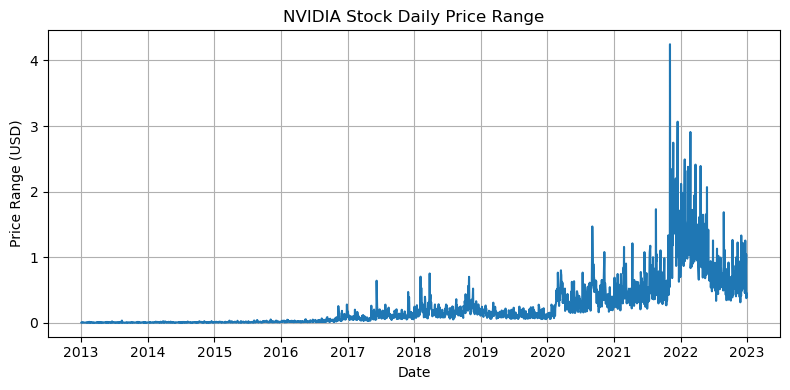

In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

print("6. NVIDIA Price Ranges and Volatility Analysis:")

# Calculate daily price range
nvidia_data['Daily Range'] = nvidia_data['High'] - nvidia_data['Low']

# Plot daily price range
plt.figure(figsize=(8, 4))
plt.plot(nvidia_data.index, nvidia_data['Daily Range'])
plt.title('NVIDIA Stock Daily Price Range')
plt.xlabel('Date')
plt.ylabel('Price Range (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [46]:
# Volatility Analysis

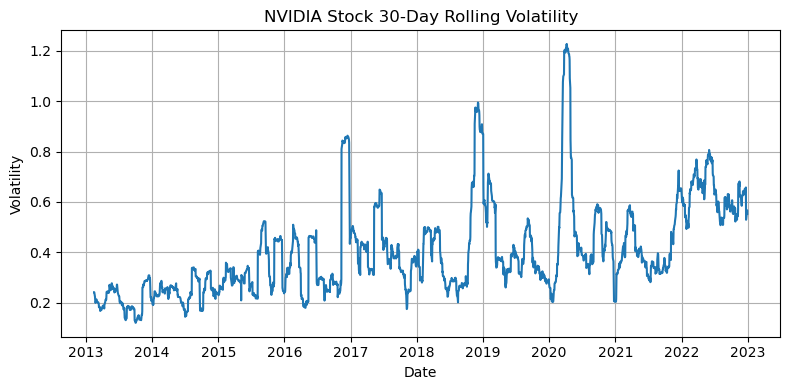


Summary Statistics of Daily Price Range:
count    2518.000000
mean        0.250503
std         0.387992
min         0.002500
25%         0.013750
50%         0.098250
75%         0.316937
max         4.247000
Name: Daily Range, dtype: float64

Summary Statistics of 30-Day Volatility:
count    2488.000000
mean        0.400625
std         0.184415
min         0.120003
25%         0.271500
50%         0.352759
75%         0.487826
max         1.226141
Name: Volatility, dtype: float64

Correlation between Volatility and Volume: 0.4053

Periods of High Volatility (> 2 standard deviations from mean):
                Close  Volatility
Date                             
2016-11-11   2.199250    0.810372
2016-11-14   2.091000    0.827817
2016-11-15   2.154750    0.830081
2016-11-16   2.290750    0.843842
2016-11-17   2.309750    0.841057
...               ...         ...
2022-06-08  18.648001    0.772921
2022-06-09  18.048000    0.776599
2022-06-13  15.647000    0.777478
2022-06-15  16.527000  

In [48]:
# Calculate and plot 30-day volatility
nvidia_data['Log Return'] = np.log(nvidia_data['Close'] / nvidia_data['Close'].shift(1))
nvidia_data['Volatility'] = nvidia_data['Log Return'].rolling(window=30).std() * np.sqrt(252)  # Annualized

plt.figure(figsize=(8, 4))
plt.plot(nvidia_data.index, nvidia_data['Volatility'])
plt.title('NVIDIA Stock 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics of daily range and volatility
print("\nSummary Statistics of Daily Price Range:")
print(nvidia_data['Daily Range'].describe())

print("\nSummary Statistics of 30-Day Volatility:")
print(nvidia_data['Volatility'].describe())

# Calculate correlation between volatility and volume
vol_volume_corr = nvidia_data['Volatility'].corr(nvidia_data['Volume'])
print(f"\nCorrelation between Volatility and Volume: {vol_volume_corr:.4f}")


# Identify periods of high volatility
high_volatility_periods = nvidia_data[nvidia_data['Volatility'] > nvidia_data['Volatility'].mean() + 2 * nvidia_data['Volatility'].std()]
print("\nPeriods of High Volatility (> 2 standard deviations from mean):")
print(high_volatility_periods[['Close', 'Volatility']])

# Calculate average daily range during different volatility regimes
low_vol = nvidia_data[nvidia_data['Volatility'] <= nvidia_data['Volatility'].quantile(0.25)]
high_vol = nvidia_data[nvidia_data['Volatility'] >= nvidia_data['Volatility'].quantile(0.75)]

print(f"\nAverage Daily Range during Low Volatility: ${low_vol['Daily Range'].mean():.2f}")
print(f"Average Daily Range during High Volatility: ${high_vol['Daily Range'].mean():.2f}")

# NVIDIA STOCK DATA PREDICTIONS

# LSTM DEVELOPMENT

In [51]:
#NVIDIA Stock LSTM Model - Data Preparation

In [22]:
# 1. Data preparation
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf

# Step 1: Load the stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Step 2: Feature Selection and Target Variable Creation
# Select the 'Close' price as the feature and create the target variable
data = nvidia_data[['Close']]
# Create a target variable, which is the next day's close price
data['Target'] = data['Close'].shift(-1)
# Drop the last row with NaN target due to the shift operation
data.dropna(inplace=True)

# Step 3: Data Scaling and Preparation for LSTM
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale the 'Close' prices
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape X to fit the LSTM input shape
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the prepared data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Print some additional information
print(f"\nTotal number of samples: {len(X)}")
print(f"Date range: {nvidia_data.index[0]} to {nvidia_data.index[-1]}")
print(f"Number of features: {X.shape[2]}")
print(f"Sequence length: {sequence_length}")

# Save the prepared data and scaler for later use
np.save('nvidia_X_train.npy', X_train)
np.save('nvidia_X_test.npy', X_test)
np.save('nvidia_y_train.npy', y_train)
np.save('nvidia_y_test.npy', y_test)
import joblib
joblib.dump(scaler, 'nvidia_scaler.joblib')

print("\nData preparation completed and saved.")

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

X_train shape: (1965, 60, 1)
y_train shape: (1965,)
X_test shape: (492, 60, 1)
y_test shape: (492,)

Total number of samples: 2457
Date range: 2013-01-02 00:00:00 to 2022-12-30 00:00:00
Number of features: 1
Sequence length: 60

Data preparation completed and saved.



C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\718704868.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\718704868.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [53]:
# NVIDIA Stock LSTM Model - Building and Training

Epoch 1/20
62/62 [==============================] - 18s 125ms/step - loss: 0.0089 - val_loss: 7.0557e-04
Epoch 2/20
62/62 [==============================] - 6s 89ms/step - loss: 6.6331e-04 - val_loss: 5.8937e-04
Epoch 3/20
62/62 [==============================] - 5s 80ms/step - loss: 5.9234e-04 - val_loss: 6.8125e-04
Epoch 4/20
62/62 [==============================] - 5s 88ms/step - loss: 5.4646e-04 - val_loss: 5.4844e-04
Epoch 5/20
62/62 [==============================] - 6s 91ms/step - loss: 6.0023e-04 - val_loss: 5.0235e-04
Epoch 6/20
62/62 [==============================] - 5s 84ms/step - loss: 5.7007e-04 - val_loss: 4.5760e-04
Epoch 7/20
62/62 [==============================] - 5s 85ms/step - loss: 4.6619e-04 - val_loss: 4.9057e-04
Epoch 8/20
62/62 [==============================] - 5s 88ms/step - loss: 4.7411e-04 - val_loss: 4.2832e-04
Epoch 9/20
62/62 [==============================] - 5s 83ms/step - loss: 4.5371e-04 - val_loss: 3.8053e-04
Epoch 10/20
62/62 [====================

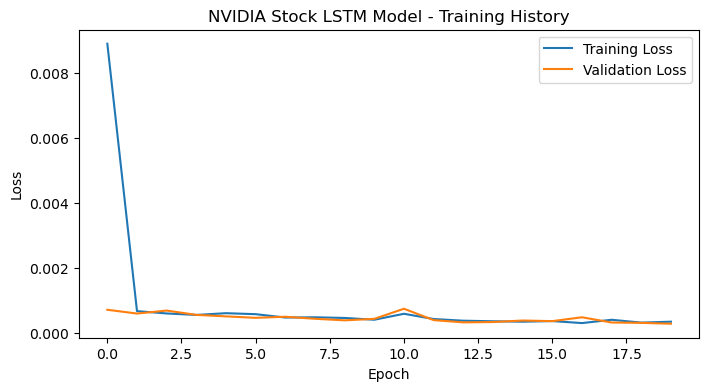

In [55]:
# 2. Building and Training the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load the prepared data
X_train = np.load('nvidia_X_train.npy')
X_test = np.load('nvidia_X_test.npy')
y_train = np.load('nvidia_y_train.npy')
y_test = np.load('nvidia_y_test.npy')

# Step 4: Build the LSTM Model
model = Sequential()
# Adding the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=25))  # Additional Dense layer
model.add(LSTM(units=50, return_sequences=False))
# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Display the model summary
model.summary()

# Save the trained model
model.save('nvidia_lstm_model.h5')

print("\nModel training completed and saved.")

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('NVIDIA Stock LSTM Model - Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# 2. Building and Training the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load the prepared data
X_train = np.load('nvidia_X_train.npy')
X_test = np.load('nvidia_X_test.npy')
y_train = np.load('nvidia_y_train.npy')
y_test = np.load('nvidia_y_test.npy')

# Step 4: Build the LSTM Model
model = Sequential()
# Adding the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=25))  # Additional Dense layer
model.add(LSTM(units=50, return_sequences=False))
# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Display the model summary
model.summary()

# Save the trained model
model.save('nvidia_lstm_model.h5')

print("\nModel training completed and saved.")



Epoch 1/20
62/62 [==============================] - 12s 92ms/step - loss: 0.0085 - val_loss: 8.8725e-04
Epoch 2/20
62/62 [==============================] - 4s 67ms/step - loss: 8.1290e-04 - val_loss: 8.3372e-04
Epoch 3/20
62/62 [==============================] - 4s 70ms/step - loss: 7.3298e-04 - val_loss: 6.8938e-04
Epoch 4/20
62/62 [==============================] - 4s 67ms/step - loss: 6.8953e-04 - val_loss: 7.8023e-04
Epoch 5/20
62/62 [==============================] - 4s 67ms/step - loss: 5.8359e-04 - val_loss: 5.2052e-04
Epoch 6/20
62/62 [==============================] - 4s 68ms/step - loss: 5.3481e-04 - val_loss: 4.8738e-04
Epoch 7/20
62/62 [==============================] - 4s 67ms/step - loss: 4.9669e-04 - val_loss: 4.5829e-04
Epoch 8/20
62/62 [==============================] - 4s 66ms/step - loss: 4.4519e-04 - val_loss: 4.2788e-04
Epoch 9/20
62/62 [==============================] - 4s 67ms/step - loss: 4.1648e-04 - val_loss: 3.6915e-04
Epoch 10/20
62/62 [=====================

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# Evaluate the Model and Make Predictions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import load_model
import joblib

# Load the trained model
model = load_model('nvidia_lstm_model.h5')

# Load the training and test data and scaler
X_train = np.load('nvidia_X_train.npy')
y_train = np.load('nvidia_y_train.npy')
X_test = np.load('nvidia_X_test.npy')
y_test = np.load('nvidia_y_test.npy')
scaler = joblib.load('nvidia_scaler.joblib')

# Make predictions on training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(np.hstack((train_predictions, train_predictions)))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Make predictions on test data
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(np.hstack((test_predictions, test_predictions)))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)

# Calculate evaluation metrics for test data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)

# Print the evaluation metrics
print("NVIDIA Stock data LSTM model - Training Data Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}\n")

print("NVIDIA Stock data LSTM model - Testing Data Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}\n")



16/16 [==============================] - 0s 25ms/step
NVIDIA Stock data LSTM model - Training Data Metrics:
Mean Squared Error (MSE): 0.3155
Root Mean Squared Error (RMSE): 0.5617
Mean Absolute Error (MAE): 0.3842
R-squared (R²): 0.9943

NVIDIA Stock data LSTM model - Testing Data Metrics:
Mean Squared Error (MSE): 0.3321
Root Mean Squared Error (RMSE): 0.5762
Mean Absolute Error (MAE): 0.3947
R-squared (R²): 0.9937



In [41]:
# Evaluate the Model and Make Predictions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import load_model
import joblib

# Load the trained model
model = load_model('nvidia_lstm_model.h5')

# Load the training and test data and scaler
X_train = np.load('nvidia_X_train.npy')
y_train = np.load('nvidia_y_train.npy')
X_test = np.load('nvidia_X_test.npy')
y_test = np.load('nvidia_y_test.npy')
scaler = joblib.load('nvidia_scaler.joblib')

# Make predictions on training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(np.hstack((train_predictions, train_predictions)))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Make predictions on test data
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(np.hstack((test_predictions, test_predictions)))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)

# Calculate evaluation metrics for test data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)

# Print the evaluation metrics
print("NVIDIA Stock data LSTM model - Training Data Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}\n")

print("NVIDIA Stock data LSTM model - Testing Data Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}\n")



16/16 [==============================] - 0s 10ms/step
NVIDIA Stock data LSTM model - Training Data Metrics:
Mean Squared Error (MSE): 0.3026
Root Mean Squared Error (RMSE): 0.5501
Mean Absolute Error (MAE): 0.3469
R-squared (R²): 0.9945

NVIDIA Stock data LSTM model - Testing Data Metrics:
Mean Squared Error (MSE): 0.3222
Root Mean Squared Error (RMSE): 0.5676
Mean Absolute Error (MAE): 0.3565
R-squared (R²): 0.9939



In [56]:
# NVIDIA Stock LSTM Model - Evaluation

In [57]:
# 3. Evaluate the Model and Make Predictions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import load_model
import joblib

# Load the trained model
model = load_model('nvidia_lstm_model.h5')

# Load the test data and scaler
X_test = np.load('nvidia_X_test.npy')
y_test = np.load('nvidia_y_test.npy')
scaler = joblib.load('nvidia_scaler.joblib')

# Make predictions
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
test_predictions = scaler.inverse_transform(np.hstack((test_predictions, test_predictions)))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)

# Print the evaluation metrics
print("NVIDIA Stock data LSTM model - Testing Data Metrics:")
print(f"NVIDIA Stock data LSTM model - Mean Squared Error (MSE): {mse_test:.4f}")
print(f"NVIDIA Stock data LSTM model - Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"NVIDIA Stock data LSTM model - Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"NVIDIA Stock data LSTM model - R-squared (R²): {r2_test:.4f}\n")

# Calculate additional metrics
mape_test = np.mean(np.abs((real_stock_price_test - test_predictions) / real_stock_price_test)) * 100
accuracy = 100 - mape_test

print("Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")


# Calculate and print the range of actual and predicted prices
actual_range = np.ptp(real_stock_price_test)
predicted_range = np.ptp(test_predictions)
print(f"\nRange of actual prices: ${actual_range:.2f}")
print(f"Range of predicted prices: ${predicted_range:.2f}")

# Calculate and print the standard deviation of errors
errors = real_stock_price_test - test_predictions
error_std = np.std(errors)
print(f"Standard deviation of errors: ${error_std:.2f}")

# Print the first few actual vs predicted values
print("\nFirst few actual vs predicted values:")
for i in range(5):
    print(f"Actual: ${real_stock_price_test[i]:.2f}, Predicted: ${test_predictions[i]:.2f}")

16/16 [==============================] - 2s 29ms/step
NVIDIA Stock data LSTM model - Testing Data Metrics:
NVIDIA Stock data LSTM model - Mean Squared Error (MSE): 0.3023
NVIDIA Stock data LSTM model - Root Mean Squared Error (RMSE): 0.5498
NVIDIA Stock data LSTM model - Mean Absolute Error (MAE): 0.3265
NVIDIA Stock data LSTM model - R-squared (R²): 0.9943

Additional Metrics:
Mean Absolute Percentage Error (MAPE): 13.28%
Prediction Accuracy: 86.72%

Range of actual prices: $31.62
Range of predicted prices: $31.24
Standard deviation of errors: $0.54

First few actual vs predicted values:
Actual: $0.63, Predicted: $0.87
Actual: $0.89, Predicted: $1.03
Actual: $3.99, Predicted: $3.96
Actual: $1.57, Predicted: $1.70
Actual: $4.19, Predicted: $4.22


In [58]:
# NVIDIA Stock LSTM Model - Actual Vs Predicted price values

16/16 [==============================] - 2s 27ms/step


C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


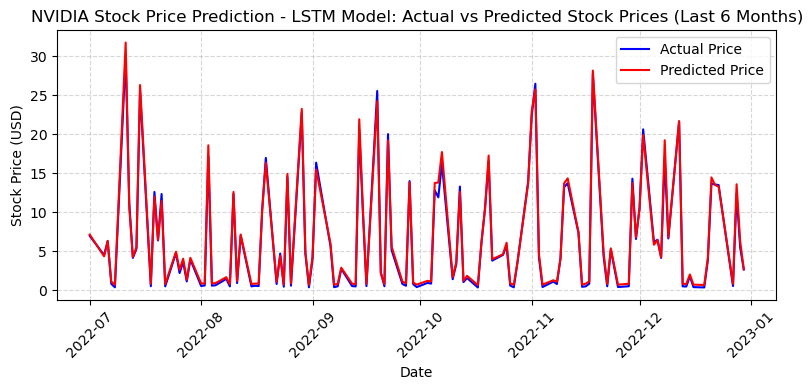

Date range: from 2022-07-01 to 2022-12-30
Number of trading days: 127
Mean Absolute Percentage Error (MAPE) for last 6 months: 24.87%
Prediction Accuracy for last 6 months: 75.13%
Actual price range: $0.34 to $30.04
Predicted price range: $0.64 to $31.78

Last Actual NVIDIA Stock Price: $2.65
Last LSTM Predicted Price: $2.67
Last Prediction Error: 0.80%

Correlation between Actual and Predicted prices: 0.9978


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import load_model
import joblib

# Load the trained model
model = load_model('nvidia_lstm_model.h5')

# Load the test data and scaler
X_test = np.load('nvidia_X_test.npy')
y_test = np.load('nvidia_y_test.npy')
scaler = joblib.load('nvidia_scaler.joblib')

# Make predictions
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
dummy_pred = np.zeros((len(test_predictions), scaler.n_features_in_))
dummy_pred[:, -1] = test_predictions.flatten()
dummy_real = np.zeros((len(y_test), scaler.n_features_in_))
dummy_real[:, -1] = y_test

test_predictions = scaler.inverse_transform(dummy_pred)[:, -1]
real_stock_price_test = scaler.inverse_transform(dummy_real)[:, -1]

# Fetch the original data to get the date range
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Create a dataframe to hold actual and predicted prices along with the corresponding dates for the test data
lstm_visualization_df = nvidia_data[['Close']].iloc[-len(real_stock_price_test):].copy()
lstm_visualization_df['Actual'] = real_stock_price_test
lstm_visualization_df['Predicted'] = test_predictions

# Filter the dataframe to include only the months from July to December 2022
lstm_filtered_df = lstm_visualization_df.loc['2022-07-01':'2022-12-31']

# Plotting the actual vs predicted prices for the specified date range
plt.figure(figsize=(8, 4))  # Rectangular plot
plt.plot(lstm_filtered_df.index, lstm_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(lstm_filtered_df.index, lstm_filtered_df['Predicted'], color='red', label='Predicted Price')
plt.title('NVIDIA Stock Price Prediction - LSTM Model: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print some statistics
print(f"Date range: from {lstm_filtered_df.index.min().date()} to {lstm_filtered_df.index.max().date()}")
print(f"Number of trading days: {len(lstm_filtered_df)}")

mape = np.mean(np.abs((lstm_filtered_df['Actual'] - lstm_filtered_df['Predicted']) / lstm_filtered_df['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")

print(f"Actual price range: ${lstm_filtered_df['Actual'].min():.2f} to ${lstm_filtered_df['Actual'].max():.2f}")
print(f"Predicted price range: ${lstm_filtered_df['Predicted'].min():.2f} to ${lstm_filtered_df['Predicted'].max():.2f}")

# Additional statistics
last_actual = lstm_filtered_df['Actual'].iloc[-1]
last_predicted = lstm_filtered_df['Predicted'].iloc[-1]
last_error = abs(last_actual - last_predicted) / last_actual * 100

print(f"\nLast Actual NVIDIA Stock Price: ${last_actual:.2f}")
print(f"Last LSTM Predicted Price: ${last_predicted:.2f}")
print(f"Last Prediction Error: {last_error:.2f}%")

# Calculate correlation between actual and predicted prices
correlation = lstm_filtered_df['Actual'].corr(lstm_filtered_df['Predicted'])
print(f"\nCorrelation between Actual and Predicted prices: {correlation:.4f}")


In [61]:
# NVIDIA Stock RF Model - Data Preparation and Splitting

In [26]:
# 1. Data Preparation and Data Splitting
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Fetch NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Step 1: Data Preparation
# Select the 'Close' price as the feature and create the target variable
data = nvidia_data[['Close']]
# Create a target variable, which is the next day's close price
data['Target'] = data['Close'].shift(-1)
# Drop the last row with NaN target due to the shift operation
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

# Convert to numpy arrays and reshape for Random Forest
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the prepared data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Save the prepared data and scaler for later use
np.save('nvidia_rf_X_train.npy', X_train)
np.save('nvidia_rf_X_test.npy', X_test)
np.save('nvidia_rf_y_train.npy', y_train)
np.save('nvidia_rf_y_test.npy', y_test)
import joblib
joblib.dump(scaler, 'nvidia_rf_scaler.joblib')

print("\nData preparation completed and saved.")
print(f"Total number of samples: {len(X)}")
print(f"Date range: {nvidia_data.index[sequence_length]} to {nvidia_data.index[-1]}")

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

X_train shape: (1965, 60)
y_train shape: (1965,)
X_test shape: (492, 60)
y_test shape: (492,)

Data preparation completed and saved.
Total number of samples: 2457
Date range: 2013-04-01 00:00:00 to 2022-12-30 00:00:00



C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\3041168853.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\3041168853.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
# NVIDIA Stock RF Model - Building and Hyperparameter Tuning

In [27]:
# 2. Model Building and Hyperparameter Tuning with GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib

# Load the prepared data
X_train = np.load('nvidia_rf_X_train.npy')
y_train = np.load('nvidia_rf_y_train.npy')

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20],        # Number of trees in the forest
    'max_depth': [3, 5],             # Maximum depth of the trees
    'min_samples_split': [10, 15],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [10, 15],    # Minimum number of features required to be at a leaf node
    'max_features': [1, 'sqrt'],     # Number of features to be considered when looking for the best fit
    'bootstrap': [True]              # Whether bootstrap_samples are used when building trees
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train, y_train)
print("GridSearchCV completed.")

# Extract the best parameters and the best model
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Save the best model
joblib.dump(best_rf_model, 'nvidia_best_rf_model.joblib')

print("\nBest model saved as 'nvidia_best_rf_model.joblib'")



Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}

Best model saved as 'nvidia_best_rf_model.joblib'


In [57]:
# 2. Model Building and Hyperparameter Tuning with GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib

# Load the prepared data
X_train = np.load('nvidia_rf_X_train.npy')
y_train = np.load('nvidia_rf_y_train.npy')

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20],        # Number of trees in the forest
    'max_depth': [3, 5],             # Maximum depth of the trees
    'min_samples_split': [10, 15],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [10, 15],    # Minimum number of features required to be at a leaf node
    'max_features': [1, 'sqrt'],     # Number of features to be considered when looking for the best fit
    'bootstrap': [True]              # Whether bootstrap_samples are used when building trees
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train, y_train)
print("GridSearchCV completed.")

# Extract the best parameters and the best model
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Save the best model
joblib.dump(best_rf_model, 'nvidia_best_rf_model.joblib')

print("\nBest model saved as 'nvidia_best_rf_model.joblib'")



Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}

Best model saved as 'nvidia_best_rf_model.joblib'


In [28]:
# 3. Evaluation for RF on NVIDIA stock data
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load the best model, test data, and scaler
best_rf_model = joblib.load('nvidia_best_rf_model.joblib')
X_test = np.load('nvidia_rf_X_test.npy')
y_test = np.load('nvidia_rf_y_test.npy')
scaler = joblib.load('nvidia_rf_scaler.joblib')

# Predict on the training set
X_train = np.load('nvidia_rf_X_train.npy')
y_train = np.load('nvidia_rf_y_train.npy')
rf_train_predictions = best_rf_model.predict(X_train)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Predict on the testing set
rf_test_predictions = best_rf_model.predict(X_test)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for the training data
rf_mse_train = mean_squared_error(real_stock_price_train, rf_train_predictions)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_mae_train = mean_absolute_error(real_stock_price_train, rf_train_predictions)
rf_r2_train = r2_score(real_stock_price_train, rf_train_predictions)

# Calculate evaluation metrics for the testing data
rf_mse_test = mean_squared_error(real_stock_price_test, rf_test_predictions)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_mae_test = mean_absolute_error(real_stock_price_test, rf_test_predictions)
rf_r2_test = r2_score(real_stock_price_test, rf_test_predictions)

# Print RF Model Metrics for Training Data
print("NVIDIA Stock data RF model - Training Data Metrics:")
print(f"NVIDIA Stock data RF model - Mean Squared Error (MSE): {rf_mse_train}")
print(f"NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): {rf_rmse_train}")
print(f"NVIDIA Stock data RF model - Mean Absolute Error (MAE): {rf_mae_train}")
print(f"NVIDIA Stock data RF model - R-squared (R²): {rf_r2_train}\n")

# Print RF Model Metrics for Testing Data
print("NVIDIA Stock data RF model - Testing Data Metrics:")
print(f"NVIDIA Stock data RF model - Mean Squared Error (MSE): {rf_mse_test}")
print(f"NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): {rf_rmse_test}")
print(f"NVIDIA Stock data RF model - Mean Absolute Error (MAE): {rf_mae_test}")
print(f"NVIDIA Stock data RF model - R-squared (R²): {rf_r2_test}\n")

# Calculate additional metrics
mape_test = np.mean(np.abs((real_stock_price_test - rf_test_predictions) / real_stock_price_test)) * 100
accuracy = 100 - mape_test

print("Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the range of actual and predicted prices
print(f"\nActual price range: ${np.min(real_stock_price_test):.2f} to ${np.max(real_stock_price_test):.2f}")
print(f"Predicted price range: ${np.min(rf_test_predictions):.2f} to ${np.max(rf_test_predictions):.2f}")

NVIDIA Stock data RF model - Training Data Metrics:
NVIDIA Stock data RF model - Mean Squared Error (MSE): 0.24876066631019264
NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): 0.498759126543257
NVIDIA Stock data RF model - Mean Absolute Error (MAE): 0.2682729912709654
NVIDIA Stock data RF model - R-squared (R²): 0.995468590265599

NVIDIA Stock data RF model - Testing Data Metrics:
NVIDIA Stock data RF model - Mean Squared Error (MSE): 0.3317560805823464
NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): 0.5759827085792997
NVIDIA Stock data RF model - Mean Absolute Error (MAE): 0.30750063764293767
NVIDIA Stock data RF model - R-squared (R²): 0.9937545688453446

Additional Metrics:
Mean Absolute Percentage Error (MAPE): 4.93%
Prediction Accuracy: 95.07%

Actual price range: $0.34 to $31.96
Predicted price range: $0.38 to $30.96


In [58]:
# 3. Evaluation for RF on NVIDIA stock data
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load the best model, test data, and scaler
best_rf_model = joblib.load('nvidia_best_rf_model.joblib')
X_test = np.load('nvidia_rf_X_test.npy')
y_test = np.load('nvidia_rf_y_test.npy')
scaler = joblib.load('nvidia_rf_scaler.joblib')

# Predict on the training set
X_train = np.load('nvidia_rf_X_train.npy')
y_train = np.load('nvidia_rf_y_train.npy')
rf_train_predictions = best_rf_model.predict(X_train)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Predict on the testing set
rf_test_predictions = best_rf_model.predict(X_test)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for the training data
rf_mse_train = mean_squared_error(real_stock_price_train, rf_train_predictions)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_mae_train = mean_absolute_error(real_stock_price_train, rf_train_predictions)
rf_r2_train = r2_score(real_stock_price_train, rf_train_predictions)

# Calculate evaluation metrics for the testing data
rf_mse_test = mean_squared_error(real_stock_price_test, rf_test_predictions)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_mae_test = mean_absolute_error(real_stock_price_test, rf_test_predictions)
rf_r2_test = r2_score(real_stock_price_test, rf_test_predictions)

# Print RF Model Metrics for Training Data
print("NVIDIA Stock data RF model - Training Data Metrics:")
print(f"NVIDIA Stock data RF model - Mean Squared Error (MSE): {rf_mse_train}")
print(f"NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): {rf_rmse_train}")
print(f"NVIDIA Stock data RF model - Mean Absolute Error (MAE): {rf_mae_train}")
print(f"NVIDIA Stock data RF model - R-squared (R²): {rf_r2_train}\n")

# Print RF Model Metrics for Testing Data
print("NVIDIA Stock data RF model - Testing Data Metrics:")
print(f"NVIDIA Stock data RF model - Mean Squared Error (MSE): {rf_mse_test}")
print(f"NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): {rf_rmse_test}")
print(f"NVIDIA Stock data RF model - Mean Absolute Error (MAE): {rf_mae_test}")
print(f"NVIDIA Stock data RF model - R-squared (R²): {rf_r2_test}\n")

# Calculate additional metrics
mape_test = np.mean(np.abs((real_stock_price_test - rf_test_predictions) / real_stock_price_test)) * 100
accuracy = 100 - mape_test

print("Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the range of actual and predicted prices
print(f"\nActual price range: ${np.min(real_stock_price_test):.2f} to ${np.max(real_stock_price_test):.2f}")
print(f"Predicted price range: ${np.min(rf_test_predictions):.2f} to ${np.max(rf_test_predictions):.2f}")

NVIDIA Stock data RF model - Training Data Metrics:
NVIDIA Stock data RF model - Mean Squared Error (MSE): 0.24876066631019264
NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): 0.498759126543257
NVIDIA Stock data RF model - Mean Absolute Error (MAE): 0.2682729912709654
NVIDIA Stock data RF model - R-squared (R²): 0.995468590265599

NVIDIA Stock data RF model - Testing Data Metrics:
NVIDIA Stock data RF model - Mean Squared Error (MSE): 0.3317560805823464
NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): 0.5759827085792997
NVIDIA Stock data RF model - Mean Absolute Error (MAE): 0.30750063764293767
NVIDIA Stock data RF model - R-squared (R²): 0.9937545688453446

Additional Metrics:
Mean Absolute Percentage Error (MAPE): 4.93%
Prediction Accuracy: 95.07%

Actual price range: $0.34 to $31.96
Predicted price range: $0.38 to $30.96


In [65]:
# NVIDIA Stock RF Model - Evaluation

In [66]:
# 3. Evaluation for RF on NVIDIA stock data
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load the best model, test data, and scaler
best_rf_model = joblib.load('nvidia_best_rf_model.joblib')
X_test = np.load('nvidia_rf_X_test.npy')
y_test = np.load('nvidia_rf_y_test.npy')
scaler = joblib.load('nvidia_rf_scaler.joblib')

# Predict on the training set
X_train = np.load('nvidia_rf_X_train.npy')
y_train = np.load('nvidia_rf_y_train.npy')
rf_train_predictions = best_rf_model.predict(X_train)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

# Predict on the testing set
rf_test_predictions = best_rf_model.predict(X_test)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Calculate evaluation metrics for the training data
rf_mse_train = mean_squared_error(real_stock_price_train, rf_train_predictions)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_mae_train = mean_absolute_error(real_stock_price_train, rf_train_predictions)
rf_r2_train = r2_score(real_stock_price_train, rf_train_predictions)

# Calculate evaluation metrics for the testing data
rf_mse_test = mean_squared_error(real_stock_price_test, rf_test_predictions)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_mae_test = mean_absolute_error(real_stock_price_test, rf_test_predictions)
rf_r2_test = r2_score(real_stock_price_test, rf_test_predictions)

# Print RF Model Metrics for Training Data
print("NVIDIA Stock data RF model - Training Data Metrics:")
print(f"NVIDIA Stock data RF model - Mean Squared Error (MSE): {rf_mse_train}")
print(f"NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): {rf_rmse_train}")
print(f"NVIDIA Stock data RF model - Mean Absolute Error (MAE): {rf_mae_train}")
print(f"NVIDIA Stock data RF model - R-squared (R²): {rf_r2_train}\n")

# Print RF Model Metrics for Testing Data
print("NVIDIA Stock data RF model - Testing Data Metrics:")
print(f"NVIDIA Stock data RF model - Mean Squared Error (MSE): {rf_mse_test}")
print(f"NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): {rf_rmse_test}")
print(f"NVIDIA Stock data RF model - Mean Absolute Error (MAE): {rf_mae_test}")
print(f"NVIDIA Stock data RF model - R-squared (R²): {rf_r2_test}\n")

# Calculate additional metrics
mape_test = np.mean(np.abs((real_stock_price_test - rf_test_predictions) / real_stock_price_test)) * 100
accuracy = 100 - mape_test

print("Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the range of actual and predicted prices
print(f"\nActual price range: ${np.min(real_stock_price_test):.2f} to ${np.max(real_stock_price_test):.2f}")
print(f"Predicted price range: ${np.min(rf_test_predictions):.2f} to ${np.max(rf_test_predictions):.2f}")

NVIDIA Stock data RF model - Training Data Metrics:
NVIDIA Stock data RF model - Mean Squared Error (MSE): 0.24876066631019264
NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): 0.498759126543257
NVIDIA Stock data RF model - Mean Absolute Error (MAE): 0.2682729912709654
NVIDIA Stock data RF model - R-squared (R²): 0.995468590265599

NVIDIA Stock data RF model - Testing Data Metrics:
NVIDIA Stock data RF model - Mean Squared Error (MSE): 0.3317560805823464
NVIDIA Stock data RF model - Root Mean Squared Error (RMSE): 0.5759827085792997
NVIDIA Stock data RF model - Mean Absolute Error (MAE): 0.30750063764293767
NVIDIA Stock data RF model - R-squared (R²): 0.9937545688453446

Additional Metrics:
Mean Absolute Percentage Error (MAPE): 4.93%
Prediction Accuracy: 95.07%

Actual price range: $0.34 to $31.96
Predicted price range: $0.38 to $30.96


In [67]:
#NVIDIA Stock RF Model - Actual Vs Predicted plot

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


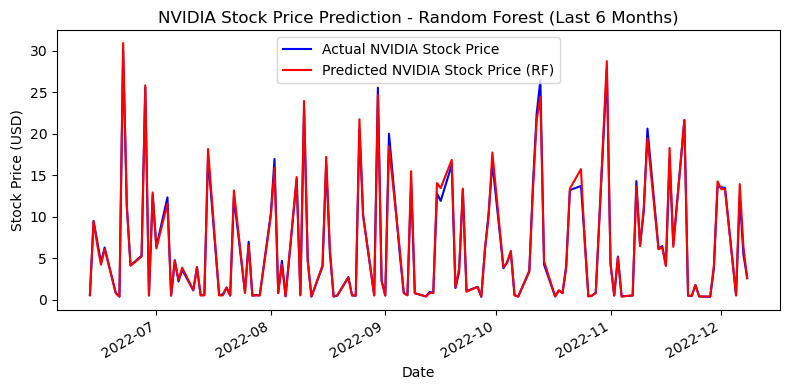

Date range shown: from 2022-06-13 to 2022-12-08
Mean Absolute Percentage Error (MAPE) for last 6 months: 5.11%
Prediction Accuracy for last 6 months: 94.89%


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import joblib
from datetime import timedelta

# Load the model, test data, and scaler
best_rf_model = joblib.load('nvidia_best_rf_model.joblib')
X_test = np.load('nvidia_rf_X_test.npy')
y_test = np.load('nvidia_rf_y_test.npy')
scaler = joblib.load('nvidia_rf_scaler.joblib')

# Make predictions
rf_test_predictions = best_rf_model.predict(X_test)

# Inverse transform the predictions and actual values
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Fetch the original data to get the date range
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Calculate the start date for the test set
test_start_date = nvidia_data.index[-len(rf_test_predictions)]

# Create a date range for the test set
test_dates = pd.date_range(start=test_start_date, periods=len(rf_test_predictions), freq='B')

# Select the last 6 months of data
last_6_months = pd.Timestamp(test_dates[-1]) - timedelta(days=180)
mask_6_months = test_dates >= last_6_months
test_dates_6_months = test_dates[mask_6_months]
real_stock_price_6_months = real_stock_price_test[mask_6_months]
rf_test_predictions_6_months = rf_test_predictions[mask_6_months]

# Visualize the predictions vs actual prices for the last 6 months
plt.figure(figsize=(8, 4))
plt.plot(test_dates_6_months, real_stock_price_6_months, color='blue', label='Actual NVIDIA Stock Price')
plt.plot(test_dates_6_months, rf_test_predictions_6_months, color='red', label='Predicted NVIDIA Stock Price (RF)')
plt.title('NVIDIA Stock Price Prediction - Random Forest (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Use tight layout to prevent the x-axis label from being cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print date range of the last 6 months
print(f"Date range shown: from {test_dates_6_months[0].date()} to {test_dates_6_months[-1].date()}")

# Calculate and print the Mean Absolute Percentage Error (MAPE) for the last 6 months
mape = np.mean(np.abs((real_stock_price_6_months - rf_test_predictions_6_months) / real_stock_price_6_months)) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")



In [69]:
# NVIDIA Hybrid Model - LSTM Preparation

In [29]:
# 1. Prepare LSTM for integration
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Preparation
# Fetch NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Select the 'Close' price as the feature and create the target variable
data = nvidia_data[['Close']]
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build and Train the LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 3: Predict with the LSTM Model
lstm_train_predictions = model_lstm.predict(X_train)
lstm_train_predictions = scaler.inverse_transform(np.hstack((lstm_train_predictions, lstm_train_predictions)))[:, 0]
real_stock_price_train = scaler.inverse_transform(np.hstack((y_train.reshape(-1, 1), y_train.reshape(-1, 1))))[:, 0]

lstm_test_predictions = model_lstm.predict(X_test)
lstm_test_predictions = scaler.inverse_transform(np.hstack((lstm_test_predictions, lstm_test_predictions)))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Save the necessary data for later use
np.save('nvidia_lstm_train_predictions.npy', lstm_train_predictions)
np.save('nvidia_lstm_test_predictions.npy', lstm_test_predictions)
np.save('nvidia_real_stock_price_train.npy', real_stock_price_train)
np.save('nvidia_real_stock_price_test.npy', real_stock_price_test)

print("NVIDIA LSTM model preparation completed and predictions saved.")

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\2985795358.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\2985795358.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Epoch 1/20
62/62 [==============================] - 12s 91ms/step - loss: 0.0056 - val_loss: 0.0010
Epoch 2/20
62/62 [==============================] - 5s 73ms/step - loss: 7.6234e-04 - val_loss: 0.0011
Epoch 3/20
62/62 [==============================] - 4s 71ms/step - loss: 7.1176e-04 - val_loss: 7.1369e-04
Epoch 4/20
62/62 [==============================] - 4s 70ms/step - loss: 6.9400e-04 - val_loss: 6.4911e-04
Epoch 5/20
62/62 [==============================] - 4s 71ms/step - loss: 7.2125e-04 - val_loss: 6.1505e-04
Epoch 6/20
62/62 [==============================] - 5s 73ms/step - loss: 5.6842e-04 - val_loss: 6.4734e-04
Epoch 7/20
62/62 [==============================] - 4s 70ms/step - loss: 4.9170e-04 - val_loss: 4.4896e-04
Epoch 8/20
62/62 [==============================] - 5s 75ms/step - loss: 4.9534e-04 - val_loss: 4.3426e-04
Epoch 9/20
62/62 [==============================] - 4s 70ms/step - loss: 4.8615e-04 - val_loss: 5.0341e-04
Epoch 10/20
62/62 [=============================

In [71]:
# NVIDIA Hybrid Model - Random Forest Preparation

In [30]:
# 2. Prepare RF for model integration
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Preparation
# Fetch NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Select the 'Close' price as the feature and create the target variable
data = nvidia_data[['Close']]
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

X, y = np.array(X), np.array(y)
# Reshape for Random Forest model (2D input)
X_rf = X.reshape(X.shape[0], X.shape[1])

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Step 2: Model Building and Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [10, 15],
    'bootstrap': [True],
    'max_features': [1,'sqrt',]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_rf, y_train)

# Extract the best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Predict with the RF Model
rf_train_predictions = best_rf_model.predict(X_train_rf)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]

rf_test_predictions = best_rf_model.predict(X_test_rf)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]

# Save the necessary data for later use
np.save('nvidia_rf_train_predictions.npy', rf_train_predictions)
np.save('nvidia_rf_test_predictions.npy', rf_test_predictions)

print("NVIDIA Random Forest model preparation completed and predictions saved.")
print(f"Best parameters: {grid_search.best_params_}")

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\1318123032.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\1318123032.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Fitting 3 folds for each of 32 candidates, totalling 96 fits
NVIDIA Random Forest model preparation completed and predictions saved.
Best parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


In [31]:
# 3. Evaluation of Hybrid model on NVIDIA stock data
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the saved predictions and actual prices
lstm_train_predictions = np.load('nvidia_lstm_train_predictions.npy')
lstm_test_predictions = np.load('nvidia_lstm_test_predictions.npy')
rf_train_predictions = np.load('nvidia_rf_train_predictions.npy')
rf_test_predictions = np.load('nvidia_rf_test_predictions.npy')
real_stock_price_train = np.load('nvidia_real_stock_price_train.npy')
real_stock_price_test = np.load('nvidia_real_stock_price_test.npy')

# Combine LSTM and RF predictions by averaging them
hybrid_train_predictions = (lstm_train_predictions + rf_train_predictions) / 2
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# Evaluate the Hybrid Model on Training Data
hybrid_mse_train = mean_squared_error(real_stock_price_train, hybrid_train_predictions)
hybrid_rmse_train = np.sqrt(hybrid_mse_train)
hybrid_mae_train = mean_absolute_error(real_stock_price_train, hybrid_train_predictions)
hybrid_r2_train = r2_score(real_stock_price_train, hybrid_train_predictions)

# Evaluate the Hybrid Model on Testing Data
hybrid_mse_test = mean_squared_error(real_stock_price_test, hybrid_test_predictions)
hybrid_rmse_test = np.sqrt(hybrid_mse_test)
hybrid_mae_test = mean_absolute_error(real_stock_price_test, hybrid_test_predictions)
hybrid_r2_test = r2_score(real_stock_price_test, hybrid_test_predictions)

# Print the evaluation metrics
print("NVIDIA Stock Data Hybrid Model - Training Data Metrics:")
print(f"NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): {hybrid_mse_train}")
print(f"NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): {hybrid_rmse_train}")
print(f"NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): {hybrid_mae_train}")
print(f"NVIDIA Stock Data Hybrid Model - R-squared (R²): {hybrid_r2_train}\n")

print("NVIDIA Stock Data Hybrid Model - Testing Data Metrics:")
print(f"NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): {hybrid_mse_test}")
print(f"NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): {hybrid_rmse_test}")
print(f"NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): {hybrid_mae_test}")
print(f"NVIDIA Stock Data Hybrid Model - R-squared (R²): {hybrid_r2_test}\n")

# Calculate additional metrics
mape_test = np.mean(np.abs((real_stock_price_test - hybrid_test_predictions) / real_stock_price_test)) * 100
accuracy = 100 - mape_test

print("Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the range of actual and predicted prices
print(f"\nActual price range: ${np.min(real_stock_price_test):.2f} to ${np.max(real_stock_price_test):.2f}")
print(f"Predicted price range: ${np.min(hybrid_test_predictions):.2f} to ${np.max(hybrid_test_predictions):.2f}")

NVIDIA Stock Data Hybrid Model - Training Data Metrics:
NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): 0.26074106290393534
NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): 0.5106281062612352
NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): 0.2965720159378693
NVIDIA Stock Data Hybrid Model - R-squared (R²): 0.9952503560626114

NVIDIA Stock Data Hybrid Model - Testing Data Metrics:
NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): 0.30659553722529465
NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): 0.5537106981315194
NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): 0.3100914228303522
NVIDIA Stock Data Hybrid Model - R-squared (R²): 0.9942282253976958

Additional Metrics:
Mean Absolute Percentage Error (MAPE): 10.39%
Prediction Accuracy: 89.61%

Actual price range: $0.34 to $31.96
Predicted price range: $0.46 to $31.66


In [43]:
# 3. Evaluation of Hybrid model on NVIDIA stock data
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the saved predictions and actual prices
lstm_train_predictions = np.load('nvidia_lstm_train_predictions.npy')
lstm_test_predictions = np.load('nvidia_lstm_test_predictions.npy')
rf_train_predictions = np.load('nvidia_rf_train_predictions.npy')
rf_test_predictions = np.load('nvidia_rf_test_predictions.npy')
real_stock_price_train = np.load('nvidia_real_stock_price_train.npy')
real_stock_price_test = np.load('nvidia_real_stock_price_test.npy')

# Combine LSTM and RF predictions by averaging them
hybrid_train_predictions = (lstm_train_predictions + rf_train_predictions) / 2
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# Evaluate the Hybrid Model on Training Data
hybrid_mse_train = mean_squared_error(real_stock_price_train, hybrid_train_predictions)
hybrid_rmse_train = np.sqrt(hybrid_mse_train)
hybrid_mae_train = mean_absolute_error(real_stock_price_train, hybrid_train_predictions)
hybrid_r2_train = r2_score(real_stock_price_train, hybrid_train_predictions)

# Evaluate the Hybrid Model on Testing Data
hybrid_mse_test = mean_squared_error(real_stock_price_test, hybrid_test_predictions)
hybrid_rmse_test = np.sqrt(hybrid_mse_test)
hybrid_mae_test = mean_absolute_error(real_stock_price_test, hybrid_test_predictions)
hybrid_r2_test = r2_score(real_stock_price_test, hybrid_test_predictions)

# Print the evaluation metrics
print("NVIDIA Stock Data Hybrid Model - Training Data Metrics:")
print(f"NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): {hybrid_mse_train}")
print(f"NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): {hybrid_rmse_train}")
print(f"NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): {hybrid_mae_train}")
print(f"NVIDIA Stock Data Hybrid Model - R-squared (R²): {hybrid_r2_train}\n")

print("NVIDIA Stock Data Hybrid Model - Testing Data Metrics:")
print(f"NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): {hybrid_mse_test}")
print(f"NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): {hybrid_rmse_test}")
print(f"NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): {hybrid_mae_test}")
print(f"NVIDIA Stock Data Hybrid Model - R-squared (R²): {hybrid_r2_test}\n")

# Calculate additional metrics
mape_test = np.mean(np.abs((real_stock_price_test - hybrid_test_predictions) / real_stock_price_test)) * 100
accuracy = 100 - mape_test

print("Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the range of actual and predicted prices
print(f"\nActual price range: ${np.min(real_stock_price_test):.2f} to ${np.max(real_stock_price_test):.2f}")
print(f"Predicted price range: ${np.min(hybrid_test_predictions):.2f} to ${np.max(hybrid_test_predictions):.2f}")

NVIDIA Stock Data Hybrid Model - Training Data Metrics:
NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): 0.242823428000231
NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): 0.4927711720466519
NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): 0.26276164436450355
NVIDIA Stock Data Hybrid Model - R-squared (R²): 0.9955767426510717

NVIDIA Stock Data Hybrid Model - Testing Data Metrics:
NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): 0.274727726953764
NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): 0.5241447576326258
NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): 0.27668866142644605
NVIDIA Stock Data Hybrid Model - R-squared (R²): 0.9948281487352006

Additional Metrics:
Mean Absolute Percentage Error (MAPE): 5.46%
Prediction Accuracy: 94.54%

Actual price range: $0.34 to $31.96
Predicted price range: $0.31 to $31.26


In [72]:
# 2. Prepare RF for model integration
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Preparation
# Fetch NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Select the 'Close' price as the feature and create the target variable
data = nvidia_data[['Close']]
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale the 'Close' prices and the target
scaled_data = scaler.fit_transform(data[['Close', 'Target']])

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Select 'Close' as the feature
    y.append(scaled_data[i, 1])  # Select 'Target' as the target variable

X, y = np.array(X), np.array(y)
# Reshape for Random Forest model (2D input)
X_rf = X.reshape(X.shape[0], X.shape[1])

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Step 2: Model Building and Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [10, 100],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_rf, y_train)

# Extract the best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Predict with the RF Model
rf_train_predictions = best_rf_model.predict(X_train_rf)
rf_train_predictions = scaler.inverse_transform(np.hstack((rf_train_predictions.reshape(-1, 1), rf_train_predictions.reshape(-1, 1))))[:, 0]

rf_test_predictions = best_rf_model.predict(X_test_rf)
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]

# Save the necessary data for later use
np.save('nvidia_rf_train_predictions.npy', rf_train_predictions)
np.save('nvidia_rf_test_predictions.npy', rf_test_predictions)

print("NVIDIA Random Forest model preparation completed and predictions saved.")
print(f"Best parameters: {grid_search.best_params_}")

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_15664\957422274.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_15664\957422274.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Fitting 3 folds for each of 32 candidates, totalling 96 fits
NVIDIA Random Forest model preparation completed and predictions saved.
Best parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [73]:
# NVIDIA Hybrid Model - Evaluation

In [74]:
# 3. Evaluation of Hybrid model on NVIDIA stock data
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the saved predictions and actual prices
lstm_train_predictions = np.load('nvidia_lstm_train_predictions.npy')
lstm_test_predictions = np.load('nvidia_lstm_test_predictions.npy')
rf_train_predictions = np.load('nvidia_rf_train_predictions.npy')
rf_test_predictions = np.load('nvidia_rf_test_predictions.npy')
real_stock_price_train = np.load('nvidia_real_stock_price_train.npy')
real_stock_price_test = np.load('nvidia_real_stock_price_test.npy')

# Combine LSTM and RF predictions by averaging them
hybrid_train_predictions = (lstm_train_predictions + rf_train_predictions) / 2
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# Evaluate the Hybrid Model on Training Data
hybrid_mse_train = mean_squared_error(real_stock_price_train, hybrid_train_predictions)
hybrid_rmse_train = np.sqrt(hybrid_mse_train)
hybrid_mae_train = mean_absolute_error(real_stock_price_train, hybrid_train_predictions)
hybrid_r2_train = r2_score(real_stock_price_train, hybrid_train_predictions)

# Evaluate the Hybrid Model on Testing Data
hybrid_mse_test = mean_squared_error(real_stock_price_test, hybrid_test_predictions)
hybrid_rmse_test = np.sqrt(hybrid_mse_test)
hybrid_mae_test = mean_absolute_error(real_stock_price_test, hybrid_test_predictions)
hybrid_r2_test = r2_score(real_stock_price_test, hybrid_test_predictions)

# Print the evaluation metrics
print("NVIDIA Stock Data Hybrid Model - Training Data Metrics:")
print(f"NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): {hybrid_mse_train}")
print(f"NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): {hybrid_rmse_train}")
print(f"NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): {hybrid_mae_train}")
print(f"NVIDIA Stock Data Hybrid Model - R-squared (R²): {hybrid_r2_train}\n")

print("NVIDIA Stock Data Hybrid Model - Testing Data Metrics:")
print(f"NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): {hybrid_mse_test}")
print(f"NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): {hybrid_rmse_test}")
print(f"NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): {hybrid_mae_test}")
print(f"NVIDIA Stock Data Hybrid Model - R-squared (R²): {hybrid_r2_test}\n")

# Calculate additional metrics
mape_test = np.mean(np.abs((real_stock_price_test - hybrid_test_predictions) / real_stock_price_test)) * 100
accuracy = 100 - mape_test

print("Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the range of actual and predicted prices
print(f"\nActual price range: ${np.min(real_stock_price_test):.2f} to ${np.max(real_stock_price_test):.2f}")
print(f"Predicted price range: ${np.min(hybrid_test_predictions):.2f} to ${np.max(hybrid_test_predictions):.2f}")

NVIDIA Stock Data Hybrid Model - Training Data Metrics:
NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): 0.11303363044815415
NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): 0.33620474483289814
NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): 0.1832635519029763
NVIDIA Stock Data Hybrid Model - R-squared (R²): 0.9979409860050432

NVIDIA Stock Data Hybrid Model - Testing Data Metrics:
NVIDIA Stock Data Hybrid Model - Mean Squared Error (MSE): 0.20488905059792506
NVIDIA Stock Data Hybrid Model - Root Mean Squared Error (RMSE): 0.45264671720661476
NVIDIA Stock Data Hybrid Model - Mean Absolute Error (MAE): 0.23741069789866803
NVIDIA Stock Data Hybrid Model - R-squared (R²): 0.9961428876974738

Additional Metrics:
Mean Absolute Percentage Error (MAPE): 4.84%
Prediction Accuracy: 95.16%

Actual price range: $0.34 to $31.96
Predicted price range: $0.29 to $31.35


In [ ]:
# NVIDIA Stock Price Prediction-Hybrid model:Actual Vs Predicted values visualization 

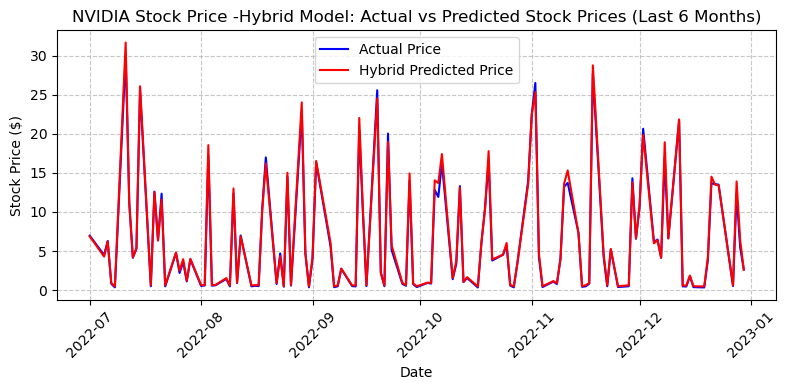

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the saved predictions and actual prices
lstm_test_predictions = np.load('nvidia_lstm_test_predictions.npy')
rf_test_predictions = np.load('nvidia_rf_test_predictions.npy')
real_stock_price_test = np.load('nvidia_real_stock_price_test.npy')

# Combine LSTM and RF predictions by averaging them
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# date_range = pd.date_range(start='2021-01-01', periods=len(real_stock_price_test), freq='B')
# nvidia_data = pd.DataFrame(index=date_range)

nvidia_data = pd.read_csv('nvidia_stock_data.csv', index_col='Date', parse_dates=True)

# Create a dataframe to hold actual and hybrid predicted prices along with the corresponding dates for the test data
hybrid_visualization_df = nvidia_data[['Close']].iloc[-len(real_stock_price_test):].copy()
hybrid_visualization_df['Actual'] = real_stock_price_test
hybrid_visualization_df['Hybrid Predicted'] = hybrid_test_predictions

# Filter the dataframe to include only the months from June to December 2021
hybrid_filtered_df = hybrid_visualization_df.loc['2022-07-01':'2022-12-31']

# Plot the actual vs hybrid predicted prices for the selected range
plt.figure(figsize=(8, 4))  # Larger, rectangular plot
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Hybrid Predicted'], color='red', label='Hybrid Predicted Price')
plt.title('NVIDIA Stock Price -Hybrid Model: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability


plt.show()

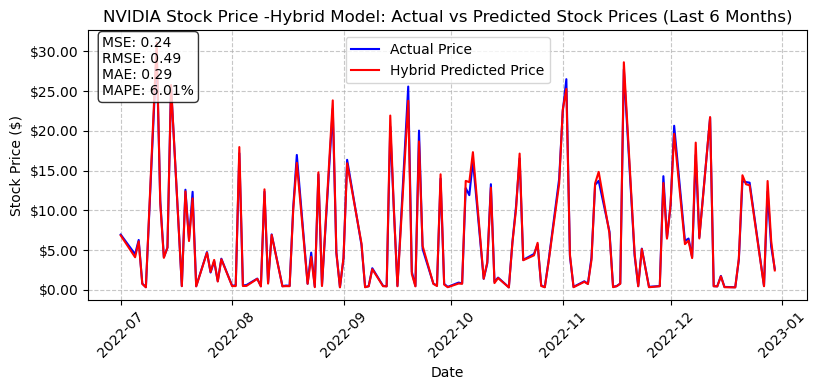

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the saved predictions and actual prices
lstm_test_predictions = np.load('nvidia_lstm_test_predictions.npy')
rf_test_predictions = np.load('nvidia_rf_test_predictions.npy')
real_stock_price_test = np.load('nvidia_real_stock_price_test.npy')

# Combine LSTM and RF predictions by averaging them
hybrid_test_predictions = (lstm_test_predictions + rf_test_predictions) / 2

# date_range = pd.date_range(start='2021-01-01', periods=len(real_stock_price_test), freq='B')
# nvidia_data = pd.DataFrame(index=date_range)

nvidia_data = pd.read_csv('nvidia_stock_data.csv', index_col='Date', parse_dates=True)

# Create a dataframe to hold actual and hybrid predicted prices along with the corresponding dates for the test data
hybrid_visualization_df = nvidia_data[['Close']].iloc[-len(real_stock_price_test):].copy()
hybrid_visualization_df['Actual'] = real_stock_price_test
hybrid_visualization_df['Hybrid Predicted'] = hybrid_test_predictions

# Filter the dataframe to include only the months from June to December 2021
hybrid_filtered_df = hybrid_visualization_df.loc['2022-07-01':'2022-12-31']

# Plot the actual vs hybrid predicted prices for the selected range
plt.figure(figsize=(8, 4))  # Larger, rectangular plot
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(hybrid_filtered_df.index, hybrid_filtered_df['Hybrid Predicted'], color='red', label='Hybrid Predicted Price')
plt.title('NVIDIA Stock Price -Hybrid Model: Actual vs Predicted Stock Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability

# Customize y-axis to show dollar amounts
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.2f}'))

# Add text box with performance metrics
mse = np.mean((hybrid_filtered_df['Actual'] - hybrid_filtered_df['Hybrid Predicted'])**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(hybrid_filtered_df['Actual'] - hybrid_filtered_df['Hybrid Predicted']))
mape = np.mean(np.abs((hybrid_filtered_df['Actual'] - hybrid_filtered_df['Hybrid Predicted']) / hybrid_filtered_df['Actual'])) 

plt.show()

# NVIDIA SENTIMENT DATA ANALYSIS

In [75]:
# NVIDIA Sentiment Data Generation

In [33]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Load the previously saved NVIDIA stock data
nvidia_data = pd.read_csv('nvidia_stock_data.csv', index_col='Date', parse_dates=True)

# Generate synthetic sentiment data
print("Generating synthetic sentiment data...")
date_range = nvidia_data.index
num_samples = len(date_range)

# Create balanced sentiment data
sentiments = np.concatenate([
    np.ones(num_samples // 3),
    np.zeros(num_samples // 3),
    np.full(num_samples - 2 * (num_samples // 3), -1)
])

# Shuffle the sentiments
sentiments = shuffle(sentiments, random_state=42)

# Function to generate text based on sentiment
def generate_text(sentiment):
    positive_texts = [
        "Strong growth in GPU demand",
        "Impressive AI chip performance",
        "Exciting new gaming technologies",
        "Positive outlook for data center market",
        "Successful product launch"
    ]
    neutral_texts = [
        "Steady performance in tech sector",
        "Balanced view on NVIDIA's future",
        "Mixed reactions to new product lineup",
        "Awaiting more data on market trends",
        "Cautious optimism about NVIDIA's direction"
    ]
    negative_texts = [
        "Concerns over chip supply constraints",
        "Increased competition in GPU market",
        "Disappointing sales figures",
        "Regulatory challenges in acquisition plans",
        "Challenges in cryptocurrency mining segment"
    ]
    
    if sentiment == 1:
        return np.random.choice(positive_texts)
    elif sentiment == 0:
        return np.random.choice(neutral_texts)
    else:
        return np.random.choice(negative_texts)

# Generate text for each sentiment
texts = [generate_text(sentiment) for sentiment in sentiments]

# Create a DataFrame with dates, ticker, texts, and sentiments
df_sentiment = pd.DataFrame({
    'Date': date_range,
    'Ticker': 'NVDA',
    'Text': texts,
    'Sentiment': sentiments
})

df_sentiment.set_index('Date', inplace=True)

# Display the head of the sentiment data
print("\nNVIDIA Sentiment Data:")
print(df_sentiment.head())

# Display basic information about the sentiment dataset
print("\nSentiment Dataset Information:")
print(df_sentiment.info())

# Check the distribution of sentiment values
print("\nSentiment Distribution:")
print(df_sentiment['Sentiment'].value_counts(normalize=True))


print("\nNVIDIA sentiment data generation completed.")

Generating synthetic sentiment data...

NVIDIA Sentiment Data:
           Ticker                                         Text  Sentiment
Date                                                                     
2013-01-02   NVDA  Challenges in cryptocurrency mining segment       -1.0
2013-01-03   NVDA             Exciting new gaming technologies        1.0
2013-01-04   NVDA             Balanced view on NVIDIA's future        0.0
2013-01-07   NVDA             Balanced view on NVIDIA's future        0.0
2013-01-08   NVDA        Concerns over chip supply constraints       -1.0

Sentiment Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     2518 non-null   object 
 1   Text       2518 non-null   object 
 2   Sentiment  2518 non-null   float64
dtypes: float64(1), object(2)
memory usage: 78.7+ KB
None

Sent

# NVIDIA Stock and Sentiment Data Combination

In [34]:
import pandas as pd
import numpy as np

# Set pandas display options to show all columns on one line
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Load the NVIDIA stock data
print("Loading NVIDIA stock data...")
nvidia_stock = pd.read_csv('nvidia_stock_data.csv', index_col='Date', parse_dates=True)

# Load the sentiment data
print("Loading NVIDIA sentiment data...")
nvidia_sentiment = pd.read_csv('nvidia_sentiment_data.csv', index_col='Date', parse_dates=True)

# Combine stock data with sentiment data
print("Combining stock data with sentiment data...")
combined_data = nvidia_stock.merge(nvidia_sentiment[['Sentiment']], left_index=True, right_index=True)

# Display the head of the combined data
print("\nCombined NVIDIA Stock and Sentiment Data:")
print(combined_data.head())

# Display basic information about the combined dataset
print("\nDataset Information:")
print(combined_data.info())

# Check for any missing values after merging
print("\nMissing Values:")
print(combined_data.isnull().sum())

# Display summary statistics
print("\nSummary Statistics:")
print(combined_data.describe())

# Check the distribution of sentiment values
print("\nSentiment Distribution:")
print(combined_data['Sentiment'].value_counts(normalize=True))

# Calculate correlation between sentiment and stock prices
print("\nCorrelation between Sentiment and Close price:")
correlation = combined_data['Sentiment'].corr(combined_data['Close'])
print(f"Correlation coefficient: {correlation:.4f}")


Loading NVIDIA stock data...
Loading NVIDIA sentiment data...
Combining stock data with sentiment data...

Combined NVIDIA Stock and Sentiment Data:
               Open     High      Low    Close  Adj Close     Volume  Sentiment
Date                                                                           
2013-01-02  0.31400  0.31825  0.31275  0.31800   0.293560  478836000       -1.0
2013-01-03  0.31800  0.32175  0.31450  0.31825   0.293791  298888000        1.0
2013-01-04  0.31875  0.32975  0.31775  0.32875   0.303484  524968000        0.0
2013-01-07  0.32850  0.32950  0.31700  0.31925   0.294714  610732000        0.0
2013-01-08  0.32000  0.32100  0.31000  0.31225   0.288252  466424000       -1.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-

In [81]:
# NVIDIA Stock and Sentiment LSTM Model - Data Preparation

In [35]:
# 1. NVIDIA Stock and Sentiment LSTM Model - Data Preparation
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the combined data
combined_data = pd.read_csv('nvidia_stock_sentiment_combined.csv', index_col='Date', parse_dates=True)

# Scale the data including the sentiment feature
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_combined_data = scaler.fit_transform(combined_data)

# Create sequences of 60 days of data and corresponding targets
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_combined_data)):
    X.append(scaled_combined_data[i-sequence_length:i])  # Use all features including sentiment
    y.append(scaled_combined_data[i, combined_data.columns.get_loc('Close')])  # Target is still the 'Close' price

X, y = np.array(X), np.array(y)

# Display the shape of the data
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Print information about the features
print(f"\nNumber of features: {X.shape[2]}")
print("Features included:")
for i, column in enumerate(combined_data.columns):
    print(f"  {i}: {column}")

# Optional: Check for any NaN values
if np.isnan(X).any() or np.isnan(y).any():
    print("\nWarning: NaN values found in the prepared data!")
else:
    print("\nNo NaN values found in the prepared data.")

# Save the prepared data and scaler for later use
np.save('nvidia_X_train.npy', X_train)
np.save('nvidia_X_test.npy', X_test)
np.save('nvidia_y_train.npy', y_train)
np.save('nvidia_y_test.npy', y_test)
import joblib
joblib.dump(scaler, 'nvidia_scaler.joblib')

print("\nNVIDIA data preparation completed and saved.")

X shape: (2458, 60, 7)
y shape: (2458,)
X_train shape: (1966, 60, 7)
y_train shape: (1966,)
X_test shape: (492, 60, 7)
y_test shape: (492,)

Number of features: 7
Features included:
  0: Open
  1: High
  2: Low
  3: Close
  4: Adj Close
  5: Volume
  6: Sentiment

No NaN values found in the prepared data.

NVIDIA data preparation completed and saved.


In [83]:
# NVIDIA Stock and Sentiment LSTM Model - Building and Training

In [36]:
# 2. NVIDIA Stock and Sentiment LSTM Model - Building and Training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

# Load the prepared data
X_train = np.load('nvidia_X_train.npy')
X_test = np.load('nvidia_X_test.npy')
y_train = np.load('nvidia_y_train.npy')
y_test = np.load('nvidia_y_test.npy')

# Build the LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Display the model summary
model_lstm.summary()

# Save the trained model
model_lstm.save('nvidia_lstm_model.h5')

print("\nNVIDIA LSTM model training completed and saved.")

Epoch 1/20
62/62 [==============================] - 13s 111ms/step - loss: 0.0074 - val_loss: 7.2124e-04
Epoch 2/20
62/62 [==============================] - 5s 77ms/step - loss: 6.1008e-04 - val_loss: 6.1374e-04
Epoch 3/20
62/62 [==============================] - 5s 77ms/step - loss: 5.4197e-04 - val_loss: 6.1708e-04
Epoch 4/20
62/62 [==============================] - 5s 77ms/step - loss: 5.1493e-04 - val_loss: 4.6272e-04
Epoch 5/20
62/62 [==============================] - 5s 76ms/step - loss: 4.5673e-04 - val_loss: 4.0865e-04
Epoch 6/20
62/62 [==============================] - 6s 94ms/step - loss: 3.9068e-04 - val_loss: 3.8013e-04
Epoch 7/20
62/62 [==============================] - 5s 84ms/step - loss: 4.3858e-04 - val_loss: 3.5019e-04
Epoch 8/20
62/62 [==============================] - 4s 71ms/step - loss: 4.4785e-04 - val_loss: 5.2092e-04
Epoch 9/20
62/62 [==============================] - 5s 75ms/step - loss: 3.4314e-04 - val_loss: 3.0330e-04
Epoch 10/20
62/62 [====================

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# NVIDIA Stock and Sentiment LSTM Model - Evaluation

In [37]:
# 3. NVIDIA Combined Stock and Sentiment LSTM Model - Evaluation
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import load_model
import joblib

# Load the model, test data, and scaler
model_lstm = load_model('nvidia_lstm_model.h5')
X_train = np.load('nvidia_X_train.npy')
X_test = np.load('nvidia_X_test.npy')
y_train = np.load('nvidia_y_train.npy')
y_test = np.load('nvidia_y_test.npy')
scaler = joblib.load('nvidia_scaler.joblib')

# Predict on the training set
train_predictions = model_lstm.predict(X_train)
train_predictions = scaler.inverse_transform(
    np.hstack((train_predictions, np.zeros((train_predictions.shape[0], X_train.shape[2] - 1))))
)[:, 0]
real_stock_price_train = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X_train.shape[2] - 1))))
)[:, 0]

# Predict on the testing set
test_predictions = model_lstm.predict(X_test)
test_predictions = scaler.inverse_transform(
    np.hstack((test_predictions, np.zeros((test_predictions.shape[0], X_test.shape[2] - 1))))
)[:, 0]
real_stock_price_test = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))))
)[:, 0]

# Calculate evaluation metrics for the training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)

# Calculate evaluation metrics for the testing data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)

# Print metrics with labels indicating NVIDIA Combined data LSTM model
print("NVIDIA Combined Data LSTM Model - Training Set Metrics:")
print(f"NVIDIA Combined Data LSTM Model - Mean Squared Error (MSE): {mse_train:.4f}")
print(f"NVIDIA Combined Data LSTM Model - Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"NVIDIA Combined Data LSTM Model - Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"NVIDIA Combined Data LSTM Model - R-squared (R²): {r2_train:.4f}\n")

print("NVIDIA Combined Data LSTM Model - Testing Set Metrics:")
print(f"NVIDIA Combined Data LSTM Model - Mean Squared Error (MSE): {mse_test:.4f}")
print(f"NVIDIA Combined Data LSTM Model - Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"NVIDIA Combined Data LSTM Model - Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"NVIDIA Combined Data LSTM Model - R-squared (R²): {r2_test:.4f}\n")

# Calculate additional metrics
mape_test = np.mean(np.abs((real_stock_price_test - test_predictions) / real_stock_price_test)) * 100
accuracy = 100 - mape_test

print("Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the range of actual and predicted prices
print(f"\nActual price range: ${np.min(real_stock_price_test):.2f} to ${np.max(real_stock_price_test):.2f}")
print(f"Predicted price range: ${np.min(test_predictions):.2f} to ${np.max(test_predictions):.2f}")

16/16 [==============================] - 0s 27ms/step
NVIDIA Combined Data LSTM Model - Training Set Metrics:
NVIDIA Combined Data LSTM Model - Mean Squared Error (MSE): 0.3134
NVIDIA Combined Data LSTM Model - Root Mean Squared Error (RMSE): 0.5598
NVIDIA Combined Data LSTM Model - Mean Absolute Error (MAE): 0.2945
NVIDIA Combined Data LSTM Model - R-squared (R²): 0.9944

NVIDIA Combined Data LSTM Model - Testing Set Metrics:
NVIDIA Combined Data LSTM Model - Mean Squared Error (MSE): 0.3011
NVIDIA Combined Data LSTM Model - Root Mean Squared Error (RMSE): 0.5487
NVIDIA Combined Data LSTM Model - Mean Absolute Error (MAE): 0.2981
NVIDIA Combined Data LSTM Model - R-squared (R²): 0.9942

Additional Metrics:
Mean Absolute Percentage Error (MAPE): 5.43%
Prediction Accuracy: 94.57%

Actual price range: $0.34 to $33.52
Predicted price range: $0.35 to $32.72


In [87]:
# 3. NVIDIA Combined Stock and Sentiment LSTM Model - Evaluation
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import load_model
import joblib

# Load the model, test data, and scaler
model_lstm = load_model('nvidia_lstm_model.h5')
X_train = np.load('nvidia_X_train.npy')
X_test = np.load('nvidia_X_test.npy')
y_train = np.load('nvidia_y_train.npy')
y_test = np.load('nvidia_y_test.npy')
scaler = joblib.load('nvidia_scaler.joblib')

# Predict on the training set
train_predictions = model_lstm.predict(X_train)
train_predictions = scaler.inverse_transform(
    np.hstack((train_predictions, np.zeros((train_predictions.shape[0], X_train.shape[2] - 1))))
)[:, 0]
real_stock_price_train = scaler.inverse_transform(
    np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X_train.shape[2] - 1))))
)[:, 0]

# Predict on the testing set
test_predictions = model_lstm.predict(X_test)
test_predictions = scaler.inverse_transform(
    np.hstack((test_predictions, np.zeros((test_predictions.shape[0], X_test.shape[2] - 1))))
)[:, 0]
real_stock_price_test = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))))
)[:, 0]

# Calculate evaluation metrics for the training data
mse_train = mean_squared_error(real_stock_price_train, train_predictions)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(real_stock_price_train, train_predictions)
r2_train = r2_score(real_stock_price_train, train_predictions)

# Calculate evaluation metrics for the testing data
mse_test = mean_squared_error(real_stock_price_test, test_predictions)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(real_stock_price_test, test_predictions)
r2_test = r2_score(real_stock_price_test, test_predictions)

# Print metrics with labels indicating NVIDIA Combined data LSTM model
print("NVIDIA Combined Data LSTM Model - Training Set Metrics:")
print(f"NVIDIA Combined Data LSTM Model - Mean Squared Error (MSE): {mse_train:.4f}")
print(f"NVIDIA Combined Data LSTM Model - Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"NVIDIA Combined Data LSTM Model - Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"NVIDIA Combined Data LSTM Model - R-squared (R²): {r2_train:.4f}\n")

print("NVIDIA Combined Data LSTM Model - Testing Set Metrics:")
print(f"NVIDIA Combined Data LSTM Model - Mean Squared Error (MSE): {mse_test:.4f}")
print(f"NVIDIA Combined Data LSTM Model - Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"NVIDIA Combined Data LSTM Model - Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"NVIDIA Combined Data LSTM Model - R-squared (R²): {r2_test:.4f}\n")

# Calculate additional metrics
mape_test = np.mean(np.abs((real_stock_price_test - test_predictions) / real_stock_price_test)) * 100
accuracy = 100 - mape_test

print("Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Print the range of actual and predicted prices
print(f"\nActual price range: ${np.min(real_stock_price_test):.2f} to ${np.max(real_stock_price_test):.2f}")
print(f"Predicted price range: ${np.min(test_predictions):.2f} to ${np.max(test_predictions):.2f}")

16/16 [==============================] - 0s 10ms/step
NVIDIA Combined Data LSTM Model - Training Set Metrics:
NVIDIA Combined Data LSTM Model - Mean Squared Error (MSE): 0.2291
NVIDIA Combined Data LSTM Model - Root Mean Squared Error (RMSE): 0.4787
NVIDIA Combined Data LSTM Model - Mean Absolute Error (MAE): 0.2733
NVIDIA Combined Data LSTM Model - R-squared (R²): 0.9959

NVIDIA Combined Data LSTM Model - Testing Set Metrics:
NVIDIA Combined Data LSTM Model - Mean Squared Error (MSE): 0.1966
NVIDIA Combined Data LSTM Model - Root Mean Squared Error (RMSE): 0.4434
NVIDIA Combined Data LSTM Model - Mean Absolute Error (MAE): 0.2575
NVIDIA Combined Data LSTM Model - R-squared (R²): 0.9962

Additional Metrics:
Mean Absolute Percentage Error (MAPE): 7.44%
Prediction Accuracy: 92.56%

Actual price range: $0.34 to $33.52
Predicted price range: $0.25 to $31.32


In [ ]:
# NVIDIA Combined Data LSTM Model-Actual Vs Predicted price Values plot

16/16 [==============================] - 2s 27ms/step


C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


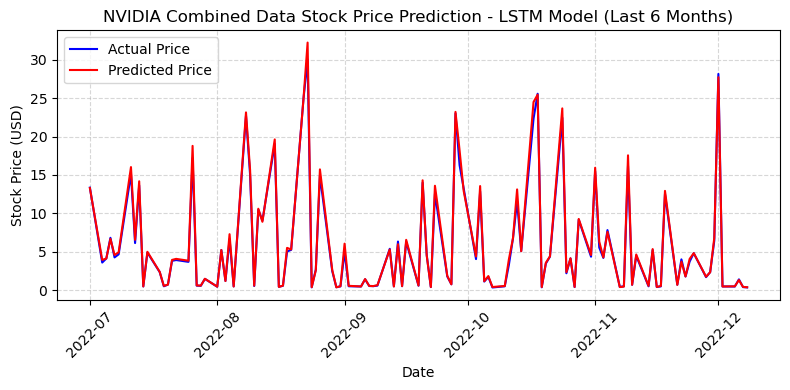

Date range shown: from 2022-07-01 to 2022-12-08
Number of trading days: 115
Mean Absolute Percentage Error (MAPE) for last 6 months: 4.75%
Prediction Accuracy for last 6 months: 95.25%
Actual price range: $0.34 to $30.04
Predicted price range: $0.36 to $32.23

Last Actual NVIDIA Stock Price: $0.35
Last LSTM Predicted Price: $0.37
Last Prediction Error: 6.09%

Correlation between Actual and Predicted prices: 0.9985


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import load_model
import joblib
from datetime import timedelta

# Load the trained model
model = load_model('nvidia_lstm_model.h5')

# Load the test data and scaler
X_test = np.load('nvidia_X_test.npy')
y_test = np.load('nvidia_y_test.npy')
scaler = joblib.load('nvidia_scaler.joblib')

# Make predictions
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
dummy_pred = np.zeros((len(test_predictions), X_test.shape[2]))
dummy_pred[:, 3] = test_predictions.flatten()  # Assuming 'Close' is the 4th feature (index 3)
dummy_real = np.zeros((len(y_test), X_test.shape[2]))
dummy_real[:, 3] = y_test

test_predictions = scaler.inverse_transform(dummy_pred)[:, 3]
real_stock_price_test = scaler.inverse_transform(dummy_real)[:, 3]

# Fetch the original data to get the date range
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Calculate the start date for the test set
test_start_date = nvidia_data.index[-len(test_predictions)]

# Create a date range for the test set
test_dates = pd.date_range(start=test_start_date, periods=len(test_predictions), freq='B')

# Create a DataFrame with the test data
df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})
df.set_index('Date', inplace=True)

# Select the last 6 months of data
lstm_filtered_df = df.loc['2022-07-01':'2022-12-31']

# Plotting the actual vs predicted prices for the specified date range
plt.figure(figsize=(8, 4))  # Rectangular plot
plt.plot(lstm_filtered_df.index, lstm_filtered_df['Actual'], color='blue', label='Actual Price')
plt.plot(lstm_filtered_df.index, lstm_filtered_df['Predicted'], color='red', label='Predicted Price')
plt.title('NVIDIA Combined Data Stock Price Prediction - LSTM Model (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print statistics
print(f"Date range shown: from {lstm_filtered_df.index[0].date()} to {lstm_filtered_df.index[-1].date()}")
print(f"Number of trading days: {len(lstm_filtered_df)}")

mape = np.mean(np.abs((lstm_filtered_df['Actual'] - lstm_filtered_df['Predicted']) / lstm_filtered_df['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")

print(f"Actual price range: ${lstm_filtered_df['Actual'].min():.2f} to ${lstm_filtered_df['Actual'].max():.2f}")
print(f"Predicted price range: ${lstm_filtered_df['Predicted'].min():.2f} to ${lstm_filtered_df['Predicted'].max():.2f}")

# Additional statistics
last_actual = lstm_filtered_df['Actual'].iloc[-1]
last_predicted = lstm_filtered_df['Predicted'].iloc[-1]
last_error = abs(last_actual - last_predicted) / last_actual * 100

print(f"\nLast Actual NVIDIA Stock Price: ${last_actual:.2f}")
print(f"Last LSTM Predicted Price: ${last_predicted:.2f}")
print(f"Last Prediction Error: {last_error:.2f}%")

# Calculate correlation between actual and predicted prices
correlation = lstm_filtered_df['Actual'].corr(lstm_filtered_df['Predicted'])
print(f"\nCorrelation between Actual and Predicted prices: {correlation:.4f}")


16/16 [==============================] - 2s 28ms/step


C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\3176648211.py:47: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = df.last('6M')
C:\Users\25640411.EDGEHILL.000\AppData\Local\Temp\ipykernel_3984\3176648211.py:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = df.last('6M')


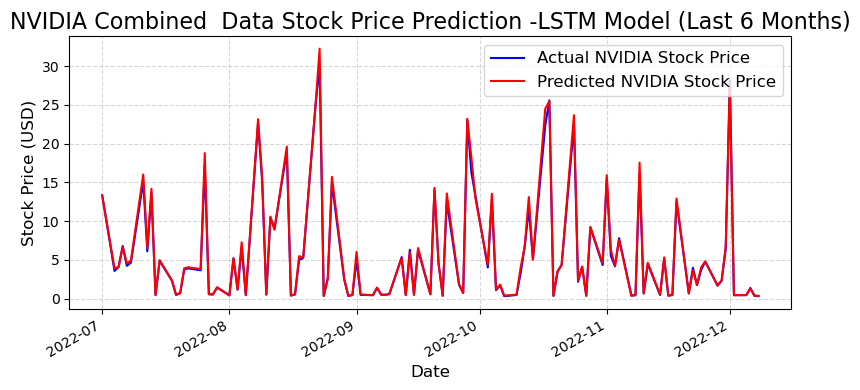

Date range shown: from 2022-07-01 to 2022-12-08
Mean Absolute Percentage Error (MAPE) for last 6 months: 4.75%
Prediction Accuracy for last 6 months: 95.25%


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import load_model
import joblib
from datetime import timedelta

# Load the trained model
model = load_model('nvidia_lstm_model.h5')

# Load the test data and scaler
X_test = np.load('nvidia_X_test.npy')
y_test = np.load('nvidia_y_test.npy')
scaler = joblib.load('nvidia_scaler.joblib')

# Make predictions
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
dummy_pred = np.zeros((len(test_predictions), X_test.shape[2]))
dummy_pred[:, 3] = test_predictions.flatten()  # Assuming 'Close' is the 4th feature (index 3)
dummy_real = np.zeros((len(y_test), X_test.shape[2]))
dummy_real[:, 3] = y_test

test_predictions = scaler.inverse_transform(dummy_pred)[:, 3]
real_stock_price_test = scaler.inverse_transform(dummy_real)[:, 3]

# Fetch the original data to get the date range
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Calculate the start date for the test set
test_start_date = nvidia_data.index[-len(test_predictions)]

# Create a date range for the test set
test_dates = pd.date_range(start=test_start_date, periods=len(test_predictions), freq='B')

# Create a DataFrame with the test data
df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})
df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = df.last('6M')

# Visualize the predictions vs actual prices for the last 6 months
plt.figure(figsize=(8, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], color='blue', label='Actual NVIDIA Stock Price')
plt.plot(last_6_months.index, last_6_months['Predicted'], color='red', label='Predicted NVIDIA Stock Price')
plt.title('NVIDIA Combined  Data Stock Price Prediction -LSTM Model (Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Use tight layout to prevent the x-axis label from being cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print date range of the last 6 months
print(f"Date range shown: from {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")

# Calculate and print the Mean Absolute Percentage Error (MAPE) for the last 6 months
mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")

In [ ]:
# NVIDIA Combined Data Random Forest Model Training and Evaluation

In [61]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assume nvidia_stock and nvidia_sentiment are already loaded
# Combine stock data with sentiment data
print("Combining stock data with sentiment data...")
combined_data = nvidia_stock.merge(nvidia_sentiment[['Sentiment']], left_index=True, right_index=True)

# Data Preparation
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])  # All features except Target
    y.append(scaled_data[i, -1])  # Target

X, y = np.array(X), np.array(y)
X_rf = X.reshape(X.shape[0], -1)  # Flatten the 3D array to 2D

X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Model Building and Hyperparameter Tuning
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train_rf, y_train)
print("GridSearchCV completed.")

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")



Combining stock data with sentiment data...
Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


In [62]:
# Evaluation Function
def evaluate_model(model, X, y, scaler, set_name):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), scaler.n_features_in_-1)), predictions.reshape(-1, 1))))[:, -1]
    real_prices = scaler.inverse_transform(np.hstack((np.zeros((len(y), scaler.n_features_in_-1)), y.reshape(-1, 1))))[:, -1]
    
    mse = mean_squared_error(real_prices, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(real_prices, predictions)
    r2 = r2_score(real_prices, predictions)
    
    print(f"NVIDIA Combined Data RF Model - {set_name} Set Metrics:")
    print(f"NVIDIA Combined Data RF Model - Mean Squared Error (MSE): {mse}")
    print(f"NVIDIA Combined Data RF Model - Root Mean Squared Error (RMSE): {rmse}")
    print(f"NVIDIA Combined Data RF Model - Mean Absolute Error (MAE): {mae}")
    print(f"NVIDIA Combined Data RF Model - R-squared (R²): {r2}\n")
    
    return predictions, real_prices

# Evaluate the model
train_predictions, train_real_prices = evaluate_model(best_rf_model, X_train_rf, y_train, scaler, "Training")
test_predictions, test_real_prices = evaluate_model(best_rf_model, X_test_rf, y_test, scaler, "Testing")

# Calculate additional metrics for the test set
mape_test = np.mean(np.abs((test_real_prices - test_predictions) / test_real_prices)) * 100
accuracy = 100 - mape_test

print("NVIDIA Combined Data RF Model - Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

NVIDIA Combined Data RF Model - Training Set Metrics:
NVIDIA Combined Data RF Model - Mean Squared Error (MSE): 0.22558013386217485
NVIDIA Combined Data RF Model - Root Mean Squared Error (RMSE): 0.47495277013843684
NVIDIA Combined Data RF Model - Mean Absolute Error (MAE): 0.25258047162350833
NVIDIA Combined Data RF Model - R-squared (R²): 0.9958908454876225

NVIDIA Combined Data RF Model - Testing Set Metrics:
NVIDIA Combined Data RF Model - Mean Squared Error (MSE): 0.3415795520267773
NVIDIA Combined Data RF Model - Root Mean Squared Error (RMSE): 0.5844480747053388
NVIDIA Combined Data RF Model - Mean Absolute Error (MAE): 0.30032307948190334
NVIDIA Combined Data RF Model - R-squared (R²): 0.9935696383551537

NVIDIA Combined Data RF Model - Additional Metrics:
Mean Absolute Percentage Error (MAPE): 5.00%
Prediction Accuracy: 95.00%


In [48]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assume nvidia_stock and nvidia_sentiment are already loaded
# Combine stock data with sentiment data
print("Combining stock data with sentiment data...")
combined_data = nvidia_stock.merge(nvidia_sentiment[['Sentiment']], left_index=True, right_index=True)

# Data Preparation
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])  # All features except Target
    y.append(scaled_data[i, -1])  # Target

X, y = np.array(X), np.array(y)
X_rf = X.reshape(X.shape[0], -1)  # Flatten the 3D array to 2D

X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Model Building and Hyperparameter Tuning
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [10, 15],
    'max_features': [1, 'sqrt'],
    'bootstrap': [True]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train_rf, y_train)
print("GridSearchCV completed.")

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluation Function
def evaluate_model(model, X, y, scaler, set_name):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), scaler.n_features_in_-1)), predictions.reshape(-1, 1))))[:, -1]
    real_prices = scaler.inverse_transform(np.hstack((np.zeros((len(y), scaler.n_features_in_-1)), y.reshape(-1, 1))))[:, -1]
    
    mse = mean_squared_error(real_prices, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(real_prices, predictions)
    r2 = r2_score(real_prices, predictions)
    
    print(f"RF Model NVIDIA Data - {set_name} Set Metrics:")
    print(f"RF Model NVIDIA Data - Mean Squared Error (MSE): {mse}")
    print(f"RF Model NVIDIA Data - Root Mean Squared Error (RMSE): {rmse}")
    print(f"RF Model NVIDIA Data - Mean Absolute Error (MAE): {mae}")
    print(f"RF Model NVIDIA Data - R-squared (R²): {r2}\n")
    
    return predictions, real_prices

# Evaluate the model
train_predictions, train_real_prices = evaluate_model(best_rf_model, X_train_rf, y_train, scaler, "Training")
test_predictions, test_real_prices = evaluate_model(best_rf_model, X_test_rf, y_test, scaler, "Testing")



Combining stock data with sentiment data...
Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV completed.
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}
RF Model NVIDIA Data - Training Set Metrics:
RF Model NVIDIA Data - Mean Squared Error (MSE): 0.22558013386217485
RF Model NVIDIA Data - Root Mean Squared Error (RMSE): 0.47495277013843684
RF Model NVIDIA Data - Mean Absolute Error (MAE): 0.25258047162350833
RF Model NVIDIA Data - R-squared (R²): 0.9958908454876225

RF Model NVIDIA Data - Testing Set Metrics:
RF Model NVIDIA Data - Mean Squared Error (MSE): 0.3415795520267773
RF Model NVIDIA Data - Root Mean Squared Error (RMSE): 0.5844480747053388
RF Model NVIDIA Data - Mean Absolute Error (MAE): 0.30032307948190334
RF Model NVIDIA Data - R-squared (R²): 0.9935696383551537



In [93]:
# Evaluation Function
def evaluate_model(model, X, y, scaler, set_name):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), scaler.n_features_in_-1)), predictions.reshape(-1, 1))))[:, -1]
    real_prices = scaler.inverse_transform(np.hstack((np.zeros((len(y), scaler.n_features_in_-1)), y.reshape(-1, 1))))[:, -1]
    
    mse = mean_squared_error(real_prices, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(real_prices, predictions)
    r2 = r2_score(real_prices, predictions)
    
    print(f"NVIDIA Combined Data RF Model - {set_name} Set Metrics:")
    print(f"NVIDIA Combined Data RF Model - Mean Squared Error (MSE): {mse}")
    print(f"NVIDIA Combined Data RF Model - Root Mean Squared Error (RMSE): {rmse}")
    print(f"NVIDIA Combined Data RF Model - Mean Absolute Error (MAE): {mae}")
    print(f"NVIDIA Combined Data RF Model - R-squared (R²): {r2}\n")
    
    return predictions, real_prices

# Evaluate the model
train_predictions, train_real_prices = evaluate_model(best_rf_model, X_train_rf, y_train, scaler, "Training")
test_predictions, test_real_prices = evaluate_model(best_rf_model, X_test_rf, y_test, scaler, "Testing")

# Calculate additional metrics for the test set
mape_test = np.mean(np.abs((test_real_prices - test_predictions) / test_real_prices)) * 100
accuracy = 100 - mape_test

print("NVIDIA Combined Data RF Model - Additional Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

NVIDIA Combined Data RF Model - Training Set Metrics:
NVIDIA Combined Data RF Model - Mean Squared Error (MSE): 0.2254864593060909
NVIDIA Combined Data RF Model - Root Mean Squared Error (RMSE): 0.47485414529736486
NVIDIA Combined Data RF Model - Mean Absolute Error (MAE): 0.25264685035426054
NVIDIA Combined Data RF Model - R-squared (R²): 0.9958925518578522

NVIDIA Combined Data RF Model - Testing Set Metrics:
NVIDIA Combined Data RF Model - Mean Squared Error (MSE): 0.3409512878294732
NVIDIA Combined Data RF Model - Root Mean Squared Error (RMSE): 0.5839103422867874
NVIDIA Combined Data RF Model - Mean Absolute Error (MAE): 0.30007263228454567
NVIDIA Combined Data RF Model - R-squared (R²): 0.9935814656614816

NVIDIA Combined Data RF Model - Additional Metrics:
Mean Absolute Percentage Error (MAPE): 5.00%
Prediction Accuracy: 95.00%


In [ ]:
# NVIDIA Combined Data RF model Actual Vs Predicted Plot

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


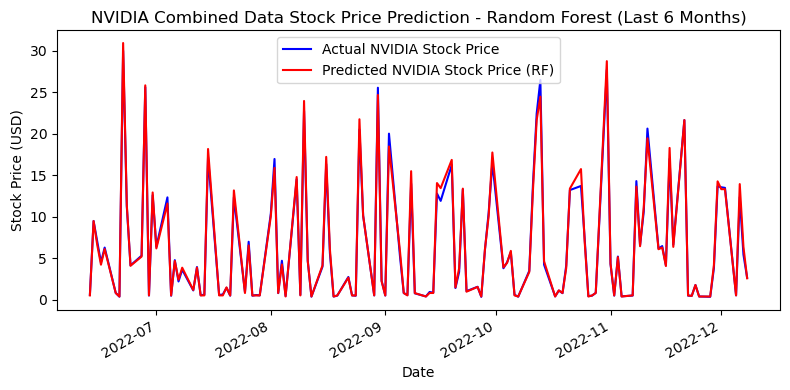

Date range shown: from 2022-06-13 to 2022-12-08
Mean Absolute Percentage Error (MAPE) for last 6 months: 5.11%
Prediction Accuracy for last 6 months: 94.89%


In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import joblib
from datetime import timedelta

# Load the model, test data, and scaler
best_rf_model = joblib.load('nvidia_best_rf_model.joblib')
X_test = np.load('nvidia_rf_X_test.npy')
y_test = np.load('nvidia_rf_y_test.npy')
scaler = joblib.load('nvidia_rf_scaler.joblib')

# Make predictions
rf_test_predictions = best_rf_model.predict(X_test)

# Inverse transform the predictions and actual values
rf_test_predictions = scaler.inverse_transform(np.hstack((rf_test_predictions.reshape(-1, 1), rf_test_predictions.reshape(-1, 1))))[:, 0]
real_stock_price_test = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), y_test.reshape(-1, 1))))[:, 0]

# Fetch the original data to get the date range
nvidia_data = yf.download('NVDA', start='2013-01-01', end='2023-01-01')

# Calculate the start date for the test set
test_start_date = nvidia_data.index[-len(rf_test_predictions)]

# Create a date range for the test set
test_dates = pd.date_range(start=test_start_date, periods=len(rf_test_predictions), freq='B')

# Select the last 6 months of data
last_6_months = pd.Timestamp(test_dates[-1]) - timedelta(days=180)
mask_6_months = test_dates >= last_6_months
test_dates_6_months = test_dates[mask_6_months]
real_stock_price_6_months = real_stock_price_test[mask_6_months]
rf_test_predictions_6_months = rf_test_predictions[mask_6_months]

# Visualize the predictions vs actual prices for the last 6 months
plt.figure(figsize=(8, 4))
plt.plot(test_dates_6_months, real_stock_price_6_months, color='blue', label='Actual NVIDIA Stock Price')
plt.plot(test_dates_6_months, rf_test_predictions_6_months, color='red', label='Predicted NVIDIA Stock Price (RF)')
plt.title('NVIDIA Combined Data Stock Price Prediction - Random Forest (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Use tight layout to prevent the x-axis label from being cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print date range of the last 6 months
print(f"Date range shown: from {test_dates_6_months[0].date()} to {test_dates_6_months[-1].date()}")

# Calculate and print the Mean Absolute Percentage Error (MAPE) for the last 6 months
mape = np.mean(np.abs((real_stock_price_6_months - rf_test_predictions_6_months) / real_stock_price_6_months)) * 100
print(f"Mean Absolute Percentage Error (MAPE) for last 6 months: {mape:.2f}%")
print(f"Prediction Accuracy for last 6 months: {100 - mape:.2f}%")

# Calculate additional metrics for the last 6 months
mse = np.mean((real_stock_price_6_months - rf_test_predictions_6_months)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(real_stock_price_6_months - rf_test_predictions_6_months))



In [94]:
# NVIDIA Stock Hybrid Model Building (LSTM + RF) with Combined Data Preparation

In [54]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import randint

print("NVIDIA Combined Data Hybrid Model - Starting data preparation...")

# Define the features to be used  and create datadrame with only the selected features from combined data
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize a MinMaxScaler and fit the scaler to the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the sequence lenght for the LSTM model
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])
    y.append(scaled_data[i, -1])

# Convert the lists to numpy arrays and reshape
X, y = np.array(X), np.array(y)
X_lstm = X
X_rf = X.reshape(X.shape[0], -1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_lstm, X_test_lstm = X_train, X_test
X_train_rf, X_test_rf = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

print("NVIDIA Combined Data Hybrid Model - Data preparation completed.")
print("NVIDIA Combined Data Hybrid Model - Building and training LSTM model...")

# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

print("NVIDIA Combined Data Hybrid Model - LSTM model training completed.")
print("NVIDIA Combined Data Hybrid Model - Building and training Random Forest model...")

# Random Forest Model
param_dist = {
    'n_estimators': (10, 20), # number of trees in the forest
    'max_depth': (3, 5),     # Maximum depth of trees
    'min_samples_split': (10, 15), # Minimum number of samples required to splot an internal node
    'min_samples_leaf': (10, 15),  # Minimum number of samples required to be at a leaf node
    'max_features': [1, 'sqrt',],# Number of features to considerwhen lookinh for the best split
    'bootstrap': [True]               ## Whether bootsrap_samples are used when building trees
}

# Initialize Random Forest regressor
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_rf, y_train)
best_rf_model = random_search.best_estimator_

print("NVIDIA Combined Data Hybrid Model - Random Forest model training completed.")
print("NVIDIA Combined Data Hybrid Model - Making predictions...")

# Predictions
lstm_train_pred = model_lstm.predict(X_train_lstm, verbose=0).flatten()
lstm_test_pred = model_lstm.predict(X_test_lstm, verbose=0).flatten()
rf_train_pred = best_rf_model.predict(X_train_rf)
rf_test_pred = best_rf_model.predict(X_test_rf)

# Hybrid Model (weighted average)
def hybrid_predict(lstm_pred, rf_pred, alpha=0.6):
    return alpha * lstm_pred + (1 - alpha) * rf_pred

hybrid_train_pred = hybrid_predict(lstm_train_pred, rf_train_pred)
hybrid_test_pred = hybrid_predict(lstm_test_pred, rf_test_pred)

# Save predictions and data for evaluation
np.save('nvidia_hybrid_train_pred.npy', hybrid_train_pred)
np.save('nvidia_hybrid_test_pred.npy', hybrid_test_pred)
np.save('nvidia_y_train.npy', y_train)
np.save('nvidia_y_test.npy', y_test)
np.save('nvidia_test_dates.npy', data.index[-len(y_test):])
joblib.dump(scaler, 'nvidia_scaler.joblib')

print("NVIDIA Combined Data Hybrid Model - Model building and prediction completed. Data saved for evaluation.")

NVIDIA Combined Data Hybrid Model - Starting data preparation...
NVIDIA Combined Data Hybrid Model - Data preparation completed.
NVIDIA Combined Data Hybrid Model - Building and training LSTM model...
Epoch 1/20
56/56 [==============================] - 6s 46ms/step - loss: 0.0023 - val_loss: 7.2749e-04
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 7.3200e-04 - val_loss: 0.0019
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 7.3856e-04 - val_loss: 5.8823e-04
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 5.2887e-04 - val_loss: 6.8217e-04
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 5.5802e-04 - val_loss: 6.6293e-04
Epoch 6/20
56/56 [==============================] - 2s 31ms/step - loss: 5.2958e-04 - val_loss: 5.8645e-04
Epoch 7/20
56/56 [==============================] - 2s 32ms/step - loss: 5.3164e-04 - val_loss: 4.4515e-04
Epoch 8/20
56/56 [==============================] - 2s 30m

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


NVIDIA Combined Data Hybrid Model - Random Forest model training completed.
NVIDIA Combined Data Hybrid Model - Making predictions...
NVIDIA Combined Data Hybrid Model - Model building and prediction completed. Data saved for evaluation.


In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load saved data
hybrid_train_pred = np.load('nvidia_hybrid_train_pred.npy')
hybrid_test_pred = np.load('nvidia_hybrid_test_pred.npy')
y_train = np.load('nvidia_y_train.npy')
y_test = np.load('nvidia_y_test.npy')
scaler = joblib.load('nvidia_scaler.joblib')

# Inverse transform
def inverse_transform(data):
    dummy = np.zeros((len(data), scaler.n_features_in_))
    dummy[:, -1] = data
    return scaler.inverse_transform(dummy)[:, -1]

y_train_inv = inverse_transform(y_train)
y_test_inv = inverse_transform(y_test)
hybrid_train_pred_inv = inverse_transform(hybrid_train_pred)
hybrid_test_pred_inv = inverse_transform(hybrid_test_pred)

# Evaluate Hybrid Model
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    

    print(f"NVIDIA Combined Data Hybrid Model - Mean Squared Error (MSE): {mse}")
    print(f"NVIDIA Combined Data Hybrid Model - Root Mean Squared Error (RMSE): {rmse}")
    print(f"NVIDIA Combined Data Hybrid Model - Mean Absolute Error (MAE): {mae}")
    print(f"NVIDIA Combined Data Hybrid Model - R-squared (R²): {r2}")
    print(f"NVIDIA Combined Data Hybrid Model - Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"NVIDIA Combined Data Hybrid Model - Prediction Accuracy: {accuracy:.2f}%\n")

evaluate_model(y_train_inv, hybrid_train_pred_inv, "Training")
evaluate_model(y_test_inv, hybrid_test_pred_inv, "Testing")

print("NVIDIA Combined Data Hybrid Model - Model evaluation completed.")

# Save the inverse transformed predictions for plotting
np.save('nvidia_hybrid_test_pred_inv.npy', hybrid_test_pred_inv)
np.save('nvidia_y_test_inv.npy', y_test_inv)

NVIDIA Combined Data Hybrid Model - Mean Squared Error (MSE): 0.31110633758931
NVIDIA Combined Data Hybrid Model - Root Mean Squared Error (RMSE): 0.5577690719189349
NVIDIA Combined Data Hybrid Model - Mean Absolute Error (MAE): 0.33836802393258353
NVIDIA Combined Data Hybrid Model - R-squared (R²): 0.9943329051674585
NVIDIA Combined Data Hybrid Model - Mean Absolute Percentage Error (MAPE): 15.26%
NVIDIA Combined Data Hybrid Model - Prediction Accuracy: 84.74%

NVIDIA Combined Data Hybrid Model - Mean Squared Error (MSE): 0.39131196028268334
NVIDIA Combined Data Hybrid Model - Root Mean Squared Error (RMSE): 0.6255493268181841
NVIDIA Combined Data Hybrid Model - Mean Absolute Error (MAE): 0.36357796126927616
NVIDIA Combined Data Hybrid Model - R-squared (R²): 0.9926334073405714
NVIDIA Combined Data Hybrid Model - Mean Absolute Percentage Error (MAPE): 15.90%
NVIDIA Combined Data Hybrid Model - Prediction Accuracy: 84.10%

NVIDIA Combined Data Hybrid Model - Model evaluation completed.

In [95]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import randint

print("NVIDIA Combined Data Hybrid Model - Starting data preparation...")

# Define the features to be used  and create datadrame with only the selected features from combined data
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
data = combined_data[features].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Initialize a MinMaxScaler and fit the scaler to the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the sequence lenght for the LSTM model
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])
    y.append(scaled_data[i, -1])

# Convert the lists to numpy arrays and reshape
X, y = np.array(X), np.array(y)
X_lstm = X
X_rf = X.reshape(X.shape[0], -1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_lstm, X_test_lstm = X_train, X_test
X_train_rf, X_test_rf = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

print("NVIDIA Combined Data Hybrid Model - Data preparation completed.")
print("NVIDIA Combined Data Hybrid Model - Building and training LSTM model...")

# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(units=100, return_sequences=False))
model_lstm.add(Dense(units=50))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

print("NVIDIA Combined Data Hybrid Model - LSTM model training completed.")
print("NVIDIA Combined Data Hybrid Model - Building and training Random Forest model...")

# Random Forest Model
param_dist = {
    'n_estimators': randint(100, 500), # number of trees in the forest
    'max_depth': randint(10, 100),     # Maximum depth of trees
    'min_samples_split': randint(2, 20), # Minimum number of samples required to splot an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],# Number of features to considerwhen lookinh for the best split
    'bootstrap': [True, False]               ## Whether bootsrap_samples are used when building trees
}

# Initialize Random Forest regressor
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_rf, y_train)
best_rf_model = random_search.best_estimator_

print("NVIDIA Combined Data Hybrid Model - Random Forest model training completed.")
print("NVIDIA Combined Data Hybrid Model - Making predictions...")

# Predictions
lstm_train_pred = model_lstm.predict(X_train_lstm, verbose=0).flatten()
lstm_test_pred = model_lstm.predict(X_test_lstm, verbose=0).flatten()
rf_train_pred = best_rf_model.predict(X_train_rf)
rf_test_pred = best_rf_model.predict(X_test_rf)

# Hybrid Model (weighted average)
def hybrid_predict(lstm_pred, rf_pred, alpha=0.6):
    return alpha * lstm_pred + (1 - alpha) * rf_pred

hybrid_train_pred = hybrid_predict(lstm_train_pred, rf_train_pred)
hybrid_test_pred = hybrid_predict(lstm_test_pred, rf_test_pred)

# Save predictions and data for evaluation
np.save('nvidia_hybrid_train_pred.npy', hybrid_train_pred)
np.save('nvidia_hybrid_test_pred.npy', hybrid_test_pred)
np.save('nvidia_y_train.npy', y_train)
np.save('nvidia_y_test.npy', y_test)
np.save('nvidia_test_dates.npy', data.index[-len(y_test):])
joblib.dump(scaler, 'nvidia_scaler.joblib')

print("NVIDIA Combined Data Hybrid Model - Model building and prediction completed. Data saved for evaluation.")

NVIDIA Combined Data Hybrid Model - Starting data preparation...
NVIDIA Combined Data Hybrid Model - Data preparation completed.
NVIDIA Combined Data Hybrid Model - Building and training LSTM model...
Epoch 1/50
56/56 [==============================] - 9s 61ms/step - loss: 0.0063 - val_loss: 6.7867e-04
Epoch 2/50
56/56 [==============================] - 2s 44ms/step - loss: 6.8338e-04 - val_loss: 6.5914e-04
Epoch 3/50
56/56 [==============================] - 2s 42ms/step - loss: 7.4178e-04 - val_loss: 6.3231e-04
Epoch 4/50
56/56 [==============================] - 2s 43ms/step - loss: 6.0233e-04 - val_loss: 6.3221e-04
Epoch 5/50
56/56 [==============================] - 2s 44ms/step - loss: 5.4987e-04 - val_loss: 5.4940e-04
Epoch 6/50
56/56 [==============================] - 3s 47ms/step - loss: 6.0093e-04 - val_loss: 9.8476e-04
Epoch 7/50
56/56 [==============================] - 3s 48ms/step - loss: 4.9826e-04 - val_loss: 4.7703e-04
Epoch 8/50
56/56 [==============================] - 3s

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
93 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

NVIDIA Combined Data Hybrid Model - Random Forest model training completed.
NVIDIA Combined Data Hybrid Model - Making predictions...
NVIDIA Combined Data Hybrid Model - Model building and prediction completed. Data saved for evaluation.


In [96]:
# NVIDIA Hybrid Model - Evaluation

In [102]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


# Load saved data
hybrid_train_pred = np.load('nvidia_hybrid_train_pred.npy')
hybrid_test_pred = np.load('nvidia_hybrid_test_pred.npy')
y_train = np.load('nvidia_y_train.npy')
y_test = np.load('nvidia_y_test.npy')
scaler = joblib.load('nvidia_scaler.joblib')

# Inverse transform
def inverse_transform(data):
    dummy = np.zeros((len(data), scaler.n_features_in_))
    dummy[:, -1] = data
    return scaler.inverse_transform(dummy)[:, -1]

y_train_inv = inverse_transform(y_train)
y_test_inv = inverse_transform(y_test)
hybrid_train_pred_inv = inverse_transform(hybrid_train_pred)
hybrid_test_pred_inv = inverse_transform(hybrid_test_pred)

# Evaluate Hybrid Model
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    

    print(f"NVIDIA Combined Data Hybrid Model - Mean Squared Error (MSE): {mse}")
    print(f"NVIDIA Combined Data Hybrid Model - Root Mean Squared Error (RMSE): {rmse}")
    print(f"NVIDIA Combined Data Hybrid Model - Mean Absolute Error (MAE): {mae}")
    print(f"NVIDIA Combined Data Hybrid Model - R-squared (R²): {r2}")
    print(f"NVIDIA Combined Data Hybrid Model - Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"NVIDIA Combined Data Hybrid Model - Prediction Accuracy: {accuracy:.2f}%\n")

evaluate_model(y_train_inv, hybrid_train_pred_inv, "Training")
evaluate_model(y_test_inv, hybrid_test_pred_inv, "Testing")

print("NVIDIA Combined Data Hybrid Model - Model evaluation completed.")

# Save the inverse transformed predictions for plotting
np.save('nvidia_hybrid_test_pred_inv.npy', hybrid_test_pred_inv)
np.save('nvidia_y_test_inv.npy', y_test_inv)

NVIDIA Combined Data Hybrid Model - Mean Squared Error (MSE): 0.08993011300384356
NVIDIA Combined Data Hybrid Model - Root Mean Squared Error (RMSE): 0.2998834990522879
NVIDIA Combined Data Hybrid Model - Mean Absolute Error (MAE): 0.18354618064278166
NVIDIA Combined Data Hybrid Model - R-squared (R²): 0.9983618383262679
NVIDIA Combined Data Hybrid Model - Mean Absolute Percentage Error (MAPE): 7.19%
NVIDIA Combined Data Hybrid Model - Prediction Accuracy: 92.81%

NVIDIA Combined Data Hybrid Model - Mean Squared Error (MSE): 0.20042667864925218
NVIDIA Combined Data Hybrid Model - Root Mean Squared Error (RMSE): 0.4476903825739974
NVIDIA Combined Data Hybrid Model - Mean Absolute Error (MAE): 0.24710950716374416
NVIDIA Combined Data Hybrid Model - R-squared (R²): 0.9962268935030132
NVIDIA Combined Data Hybrid Model - Mean Absolute Percentage Error (MAPE): 7.55%
NVIDIA Combined Data Hybrid Model - Prediction Accuracy: 92.45%

NVIDIA Combined Data Hybrid Model - Model evaluation completed

In [97]:
#NVIDIA Stock Hybrid Model Actual Vs Predicted price valyes

NVIDIA Combined Data Hybrid Model - Creating plot...


C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_15664\3530478982.py:23: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_6_months = results_df.last('6M')
C:\Users\25640411.EDGEHILL\AppData\Local\Temp\ipykernel_15664\3530478982.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_6_months = results_df.last('6M')


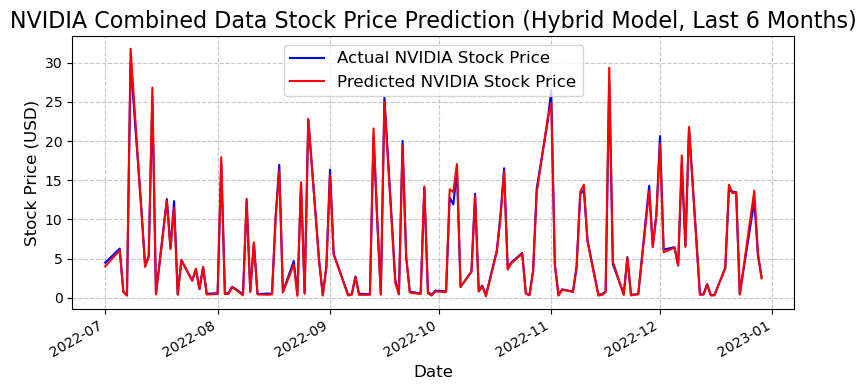

NVIDIA Combined Data Hybrid Model - Date range: 2022-07-01 to 2022-12-29
NVIDIA Combined Data Hybrid Model - Number of predictions: 126
NVIDIA Combined Data Hybrid Model - MAPE for last 6 months: 8.67%
NVIDIA Combined Data Hybrid Model - Accuracy for last 6 months: 91.33%
NVIDIA Combined Data Hybrid Model - Plot created and displayed.


In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("NVIDIA Combined Data Hybrid Model - Creating plot...")

# Load the saved data
test_predictions = np.load('nvidia_hybrid_test_pred_inv.npy')
real_stock_price_test = np.load('nvidia_y_test_inv.npy')
test_dates = np.load('nvidia_test_dates.npy', allow_pickle=True)

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': real_stock_price_test,
    'Predicted': test_predictions
})

# Set the 'Date' column as the index
results_df.set_index('Date', inplace=True)

# Select the last 6 months of data
last_6_months = results_df.last('6M')

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(last_6_months.index, last_6_months['Actual'], label='Actual NVIDIA Stock Price', color='blue')
plt.plot(last_6_months.index, last_6_months['Predicted'], label='Predicted NVIDIA Stock Price', color='red')

plt.title('NVIDIA Combined Data Stock Price Prediction (Hybrid Model, Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.tight_layout()
plt.show()

# Print some statistics
print(f"NVIDIA Combined Data Hybrid Model - Date range: {last_6_months.index[0].date()} to {last_6_months.index[-1].date()}")
print(f"NVIDIA Combined Data Hybrid Model - Number of predictions: {len(last_6_months)}")
mape = np.mean(np.abs((last_6_months['Actual'] - last_6_months['Predicted']) / last_6_months['Actual'])) * 100
print(f"NVIDIA Combined Data Hybrid Model - MAPE for last 6 months: {mape:.2f}%")
print(f"NVIDIA Combined Data Hybrid Model - Accuracy for last 6 months: {100-mape:.2f}%")

print("NVIDIA Combined Data Hybrid Model - Plot created and displayed.")

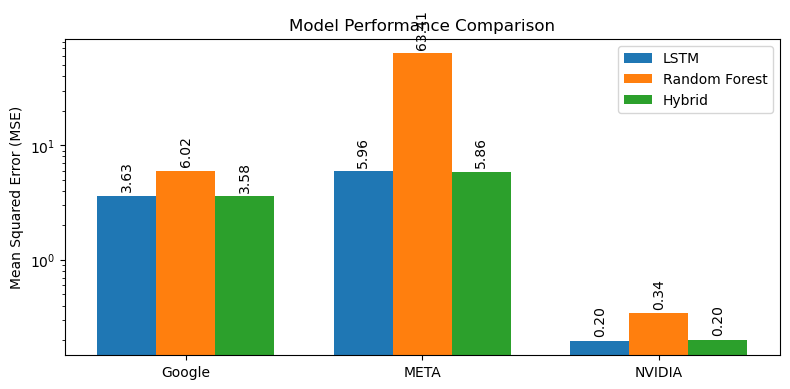

In [65]:
import matplotlib.pyplot as plt
import numpy as np

companies = ['Google', 'META', 'NVIDIA']
lstm_mse = [3.6317, 5.9595, 0.1966]
rf_mse = [6.0233, 63.4119, 0.3410]
hybrid_mse = [3.5792, 5.8595, 0.2004]

x = np.arange(len(companies))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.bar(x - width, lstm_mse, width, label='LSTM')
rects2 = ax.bar(x, rf_mse, width, label='Random Forest')
rects3 = ax.bar(x + width, hybrid_mse, width, label='Hybrid')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(companies)
ax.legend()

# Adjust the y-axis to use logarithmic scale due to large differences in values
ax.set_yscale('log')

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

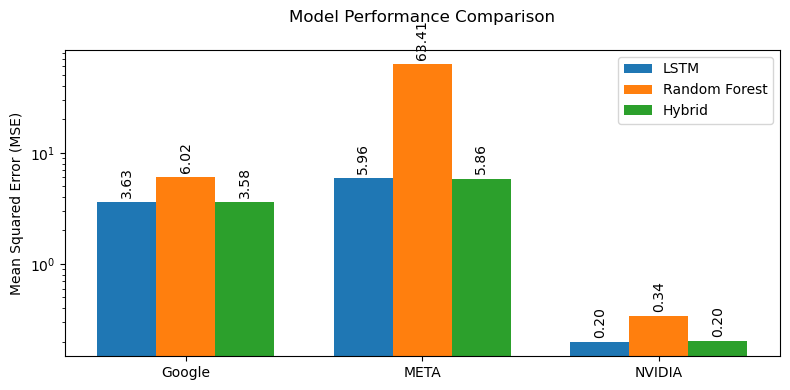

In [66]:
import matplotlib.pyplot as plt
import numpy as np

companies = ['Google', 'META', 'NVIDIA']
lstm_mse = [3.6317, 5.9595, 0.1966]
rf_mse = [6.0233, 63.4119, 0.3410]
hybrid_mse = [3.5792, 5.8595, 0.2004]

x = np.arange(len(companies))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.bar(x - width, lstm_mse, width, label='LSTM')
rects2 = ax.bar(x, rf_mse, width, label='Random Forest')
rects3 = ax.bar(x + width, hybrid_mse, width, label='Hybrid')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_xticks(x)
ax.set_xticklabels(companies)
ax.legend()

# Adjust the y-axis to use logarithmic scale due to large differences in values
ax.set_yscale('log')

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Add title above the plot
plt.title('Model Performance Comparison', pad=20)

fig.tight_layout()

plt.show()